In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

nepochs = 100

In [19]:
def generateData():
    rawData = pd.read_json("./statsheet_stringless.json",
                        lines=True,
                        orient='columns')


    labels = []
    features = []
    for season in range(5):
        for game in range(len(rawData[season][0])):
            if(rawData[season][0][game][0] == '1'):
                labels.append(1)
            else:
                labels.append(0)
            rawData[season][0][game].pop(0)
            features.append(rawData[season][0][game])
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
    return x_train, x_test, y_train, y_test

In [4]:
lossHis = []
accHis = []
for epoch in tqdm(range(nepochs), desc=f"test Epoch", unit="test epoch",  disable=False):
    x_train, x_test, y_train, y_test = generateData()
    logisticModel = LogisticRegression(max_iter = 1000, random_state=32)
    logisticModel.fit(x_train, y_train)
    
    loss = log_loss(y_test, logisticModel.predict_proba(x_test), eps=1e-15)
    accuracy = accuracy_score(logisticModel.predict(x_test), y_test)
    lossHis.append(loss)
    accHis.append(accuracy)
    
    if(epoch % 10 == 0):
        print("Loss:", loss)
        print("Accuracy:", accuracy)

test Epoch:   0%|          | 2/500 [00:00<01:22,  6.07test epoch/s]

Loss: 0.6206009962159152
Accuracy: 0.6578525641025641


test Epoch:   2%|▏         | 12/500 [00:02<01:20,  6.10test epoch/s]

Loss: 0.6280631851455849
Accuracy: 0.655448717948718


test Epoch:   4%|▍         | 22/500 [00:03<01:26,  5.53test epoch/s]

Loss: 0.6331901049124599
Accuracy: 0.6314102564102564


test Epoch:   6%|▋         | 32/500 [00:05<01:22,  5.71test epoch/s]

Loss: 0.6526011894565287
Accuracy: 0.6137820512820513


test Epoch:   8%|▊         | 42/500 [00:07<01:11,  6.44test epoch/s]

Loss: 0.6353358641876048
Accuracy: 0.625


test Epoch:  10%|█         | 51/500 [00:08<01:23,  5.35test epoch/s]

Loss: 0.6384029807600253
Accuracy: 0.6330128205128205


test Epoch:  12%|█▏        | 62/500 [00:11<01:19,  5.53test epoch/s]

Loss: 0.6233395739711872
Accuracy: 0.6426282051282052


test Epoch:  14%|█▍        | 72/500 [00:13<01:27,  4.90test epoch/s]

Loss: 0.6160770160677644
Accuracy: 0.6514423076923077


test Epoch:  16%|█▌        | 81/500 [00:15<01:39,  4.19test epoch/s]

Loss: 0.6345020950450737
Accuracy: 0.6474358974358975


test Epoch:  18%|█▊        | 92/500 [00:17<01:22,  4.93test epoch/s]

Loss: 0.6270565048817732
Accuracy: 0.6450320512820513


test Epoch:  20%|██        | 102/500 [00:19<01:01,  6.47test epoch/s]

Loss: 0.6278259074585157
Accuracy: 0.6490384615384616


test Epoch:  22%|██▏       | 112/500 [00:21<01:09,  5.58test epoch/s]

Loss: 0.6198262930230636
Accuracy: 0.6514423076923077


test Epoch:  24%|██▍       | 122/500 [00:23<01:12,  5.22test epoch/s]

Loss: 0.6255660932145389
Accuracy: 0.6418269230769231


test Epoch:  26%|██▌       | 131/500 [00:24<01:10,  5.20test epoch/s]

Loss: 0.628807135106865
Accuracy: 0.6426282051282052


test Epoch:  28%|██▊       | 142/500 [00:26<01:04,  5.53test epoch/s]

Loss: 0.6276294486143791
Accuracy: 0.6402243589743589


test Epoch:  30%|███       | 152/500 [00:28<00:56,  6.20test epoch/s]

Loss: 0.6275896894548504
Accuracy: 0.624198717948718


test Epoch:  32%|███▏      | 162/500 [00:30<00:55,  6.05test epoch/s]

Loss: 0.625938223057835
Accuracy: 0.6546474358974359


test Epoch:  34%|███▍      | 171/500 [00:32<01:08,  4.78test epoch/s]

Loss: 0.6386100343211719
Accuracy: 0.625801282051282


test Epoch:  36%|███▋      | 182/500 [00:34<00:55,  5.75test epoch/s]

Loss: 0.6289279486166183
Accuracy: 0.6370192307692307


test Epoch:  38%|███▊      | 191/500 [00:36<01:17,  4.01test epoch/s]

Loss: 0.6387025104651849
Accuracy: 0.6185897435897436


test Epoch:  40%|████      | 201/500 [00:38<01:10,  4.27test epoch/s]

Loss: 0.6283134155526907
Accuracy: 0.6354166666666666


test Epoch:  42%|████▏     | 212/500 [00:40<01:01,  4.70test epoch/s]

Loss: 0.6155750437480118
Accuracy: 0.6538461538461539


test Epoch:  44%|████▍     | 221/500 [00:42<00:51,  5.38test epoch/s]

Loss: 0.6284709002218504
Accuracy: 0.6410256410256411


test Epoch:  46%|████▌     | 231/500 [00:44<00:50,  5.34test epoch/s]

Loss: 0.6377043904273715
Accuracy: 0.6290064102564102


test Epoch:  48%|████▊     | 242/500 [00:46<00:39,  6.48test epoch/s]

Loss: 0.6155245582666268
Accuracy: 0.6538461538461539


test Epoch:  50%|█████     | 252/500 [00:48<00:39,  6.30test epoch/s]

Loss: 0.6245336968847683
Accuracy: 0.6506410256410257


test Epoch:  52%|█████▏    | 262/500 [00:49<00:38,  6.25test epoch/s]

Loss: 0.6352037868743705
Accuracy: 0.6314102564102564


test Epoch:  54%|█████▍    | 272/500 [00:51<00:38,  5.88test epoch/s]

Loss: 0.6193558911388146
Accuracy: 0.6602564102564102


test Epoch:  56%|█████▋    | 282/500 [00:52<00:39,  5.48test epoch/s]

Loss: 0.6268956691370853
Accuracy: 0.6514423076923077


test Epoch:  58%|█████▊    | 292/500 [00:54<00:30,  6.77test epoch/s]

Loss: 0.6176249222136733
Accuracy: 0.6626602564102564


test Epoch:  60%|██████    | 302/500 [00:55<00:28,  6.99test epoch/s]

Loss: 0.616855615862514
Accuracy: 0.6690705128205128


test Epoch:  62%|██████▏   | 312/500 [00:57<00:29,  6.32test epoch/s]

Loss: 0.6300965984787195
Accuracy: 0.6298076923076923


test Epoch:  64%|██████▍   | 321/500 [00:58<00:30,  5.88test epoch/s]

Loss: 0.6422867161615776
Accuracy: 0.6217948717948718


test Epoch:  66%|██████▋   | 332/500 [01:00<00:27,  6.15test epoch/s]

Loss: 0.6182533843998366
Accuracy: 0.6618589743589743


test Epoch:  68%|██████▊   | 342/500 [01:02<00:28,  5.49test epoch/s]

Loss: 0.6312107122069407
Accuracy: 0.6298076923076923


test Epoch:  70%|███████   | 352/500 [01:04<00:23,  6.23test epoch/s]

Loss: 0.6218442122827017
Accuracy: 0.6634615384615384


test Epoch:  72%|███████▏  | 361/500 [01:05<00:23,  5.94test epoch/s]

Loss: 0.6292452972007515
Accuracy: 0.6410256410256411


test Epoch:  74%|███████▍  | 372/500 [01:07<00:21,  5.87test epoch/s]

Loss: 0.6198194257892907
Accuracy: 0.6514423076923077


test Epoch:  76%|███████▋  | 382/500 [01:09<00:21,  5.46test epoch/s]

Loss: 0.6285154026404228
Accuracy: 0.6450320512820513


test Epoch:  78%|███████▊  | 391/500 [01:11<00:20,  5.22test epoch/s]

Loss: 0.6174496501206892
Accuracy: 0.6506410256410257


test Epoch:  80%|████████  | 402/500 [01:13<00:16,  5.90test epoch/s]

Loss: 0.6352016965839211
Accuracy: 0.6362179487179487


test Epoch:  82%|████████▏ | 412/500 [01:15<00:16,  5.35test epoch/s]

Loss: 0.6369445883777933
Accuracy: 0.6362179487179487


test Epoch:  84%|████████▍ | 422/500 [01:17<00:14,  5.45test epoch/s]

Loss: 0.624592316273764
Accuracy: 0.6290064102564102


test Epoch:  86%|████████▋ | 432/500 [01:19<00:12,  5.40test epoch/s]

Loss: 0.6275145418385838
Accuracy: 0.6370192307692307


test Epoch:  88%|████████▊ | 441/500 [01:20<00:10,  5.54test epoch/s]

Loss: 0.6316699751619778
Accuracy: 0.6450320512820513


test Epoch:  90%|█████████ | 452/500 [01:22<00:08,  5.72test epoch/s]

Loss: 0.6224708002288147
Accuracy: 0.657051282051282


test Epoch:  92%|█████████▏| 462/500 [01:24<00:06,  6.05test epoch/s]

Loss: 0.6182198151814728
Accuracy: 0.6546474358974359


test Epoch:  94%|█████████▍| 472/500 [01:26<00:04,  6.28test epoch/s]

Loss: 0.6353834577885269
Accuracy: 0.6201923076923077


test Epoch:  96%|█████████▋| 482/500 [01:27<00:02,  6.46test epoch/s]

Loss: 0.6227639186990785
Accuracy: 0.6642628205128205


test Epoch:  98%|█████████▊| 492/500 [01:29<00:01,  5.96test epoch/s]

Loss: 0.6277724209576083
Accuracy: 0.6434294871794872


test Epoch: 100%|██████████| 500/500 [01:30<00:00,  5.50test epoch/s]


In [5]:
totalLoss = 0
totalAcc = 0
for i in range(len(lossHis)):
    totalLoss += lossHis[i]
    totalAcc += accHis[i]
    avgLoss = totalLoss / len(lossHis)
    avgAcc = totalAcc / len(accHis)
print("Average Loss:", avgLoss)
print("Average Accuracy:", avgAcc)

Average Loss: 0.6262307075424906
Average Accuracy: 0.6433157051282049


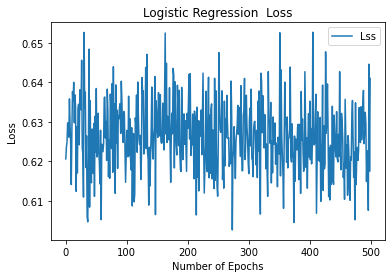

In [6]:
plt.plot(lossHis, label='Lss')
plt.title("Logistic Regression  Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

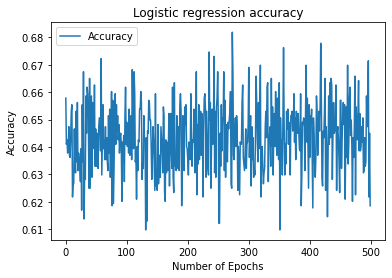

In [7]:
plt.plot(accHis, label='Accuracy')
plt.title("Logistic regression accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
nepochs = 125
# Penalty type 
penalty = ['l1', 'l2', 'elasticnet', 'none']
# Solver type 
solver = ['saga']
# Maximum number of iterations 
max_iter = [int(x) for x in np.linspace(start = 0, stop = 1000, num = 11)]
# Multi class 
multi_class = ['auto', 'ovr', 'multinomial']
# Verbosity 
verbose = [0, 1, 2]
# l1 ratio 
l1_ratio = [0, 0.25, 0.5, 0.75, 1]
# C
C = [0.5, 1.0, 1.5]


# Create the random grid
random_grid = {
    'penalty': penalty, 'solver': solver, 'max_iter':max_iter, 
    'multi_class':multi_class, 'verbose':verbose, 'l1_ratio':l1_ratio, 
    'C':C
}

lossHis = []
accHis = []
for epoch in tqdm(range(nepochs), desc=f"test Epoch", unit="test epoch",  disable=False):
    x_train, x_test, y_train, y_test = generateData()
    randomLogisticModel = RandomizedSearchCV(estimator = LogisticRegression(max_iter = 1000, random_state=32), 
                                         param_distributions = random_grid, n_iter = 100, n_jobs = -1, return_train_score = True)
    randomLogisticModel.fit(x_train, y_train)
    
    loss = log_loss(y_test, randomLogisticModel.predict_proba(x_test), eps=1e-15)
    accuracy = accuracy_score(randomLogisticModel.predict(x_test), y_test)
    lossHis.append(loss)
    accHis.append(accuracy)
    if(epoch % 10 == 0):
        print("Loss:", loss)
        print("Accuracy:", accuracy)

test Epoch:   0%|          | 0/250 [00:00<?, ?test epoch/s]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:   0%|          | 1/250 [00:31<2:09:52, 31.30s/test epoch]

max_iter reached after 1 seconds
Loss: 0.6249413715425026
Accuracy: 0.657051282051282


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:   1%|          | 2/250 [01:05<2:17:17, 33.21s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:   1%|          | 3/250 [01:39<2:17:07, 33.31s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:   2%|▏         | 4/250 [02:12<2:16:44, 33.35s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:   2%|▏         | 5/250 [02:45<2:14:45, 33.00s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
test Epoch:   3%|▎         | 7/250 [03:51<2:13:51, 33.05s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:   3%|▎         | 8/250 [04:23<2:12:11, 32.77s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
test Epoch:   4%|▎         | 9/250 [04:51<2:05:31, 31.25s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:   4%|▍         | 10/250 [05:22<2:03:50, 30.96s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:   4%|▍         | 11/250 [05:48<1:58:01, 29.63s/test epoch]

max_iter reached after 1 seconds
Loss: 0.6291828458969834
Accuracy: 0.6394230769230769


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:   5%|▍         | 12/250 [06:22<2:02:36, 30.91s/test epoch]

max_iter reached after 2 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
test Epoch:   5%|▌         | 13/250 [06:52<2:00:51, 30.60s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
test Epoch:   6%|▌         | 14/250 [07:22<1:59:38, 30.42s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
test Epoch:   6%|▌         | 15/250 [07:46<1:51:44, 28.53s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:   6%|▋         | 16/250 [08:13<1:49:39, 28.12s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBac

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:   7%|▋         | 18/250 [09:16<1:54:26, 29.60s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:   8%|▊         | 19/250 [09:48<1:56:41, 30.31s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:   8%|▊         | 20/250 [10:17<1:55:09, 30.04s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:   8%|▊         | 21/250 [10:49<1:56:39, 30.57s/test epoch]

Loss: 0.6278891959923073
Accuracy: 0.6458333333333334


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:   9%|▉         | 22/250 [11:18<1:54:50, 30.22s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:   9%|▉         | 23/250 [11:51<1:56:57, 30.91s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  10%|▉         | 24/250 [12:21<1:55:17, 30.61s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  10%|█         | 25/250 [12:49<1:52:14, 29.93s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  10%|█         | 26/250 [13:23<1:55:42, 30.99s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  11%|█         | 27/250 [13:53<1:54:29, 30.80s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklear

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  12%|█▏        | 31/250 [15:49<1:46:33, 29.20s/test epoch]

Loss: 0.6183003884432073
Accuracy: 0.6386217948717948


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  13%|█▎        | 32/250 [16:20<1:47:58, 29.72s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch: 

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  14%|█▍        | 35/250 [17:43<1:42:25, 28.58s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  14%|█▍        | 36/250 [18:09<1:39:52, 28.00s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  15%|█▍        | 37/250 [18:35<1:37:16, 27.40s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  15%|█▌        | 38/250 [19:03<1:37:01, 27.46s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  16%|█▌        | 39/250 [19:32<1:38:55, 28.13s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  16%|█▌        | 40/250 [20:03<1:40:27, 28.70s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  16%|█▋        | 41/250 [20:30<1:38:59, 28.42s/test epoch]

Loss: 0.6311425059133092
Accuracy: 0.6386217948717948


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  17%|█▋        | 42/250 [21:01<1:40:27, 28.98s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  17%|█▋        | 43/250 [21:31<1:41:22, 29.39s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  18%|█▊        | 44/250 [22:03<1:43:32, 30.16s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  18%|█▊        | 45/250 [22:31<1:41:10, 29.61s/test epoch]C:\U

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  19%|█▉        | 47/250 [23:33<1:41:55, 30.13s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  19%|█▉        | 48/250 [24:04<1:42:11, 30.35s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
test Epoch:  20%|█▉        | 49/250 [24:33<1:40:54, 30.12s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  20%|██        | 50/250 [25:04<1:41:16, 30.38s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  20%|██        | 51/250 [25:35<1:40:48, 30.40s/test epoch]

Loss: 0.6227004278132949
Accuracy: 0.6538461538461539


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
test Epoch:  21%|██        | 52/250 [26:03<1:38:47, 29.94s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  21%|██        | 53/250 [26:35<1:39:33, 30.32s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  22%|██▏       | 54/250 [27:03<1:37:13, 29.76s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  22%|██▏       | 55/250 [27:30<1:33:45, 28.85s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch: 

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  23%|██▎       | 58/250 [29:01<1:34:47, 29.62s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  24%|██▎       | 59/250 [29:27<1:30:08, 28.32s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
test Epoch:  24%|██▍       | 60/250 [29:58<1:32:45, 29.29s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  24%|██▍       | 61/250 [30:34<1:38:13, 31.18s/test epoch]

max_iter reached after 0 seconds
Loss: 0.6174644974540804
Accuracy: 0.6610576923076923


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  25%|██▍       | 62/250 [31:03<1:36:20, 30.75s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  25%|██▌       | 63/250 [31:33<1:34:24, 30.29s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The ma

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  26%|██▌       | 65/250 [32:27<1:28:42, 28.77s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  26%|██▋       | 66/250 [32:54<1:27:02, 28.38s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  27%|██▋       | 67/250 [33:23<1:26:55, 28.50s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  27%|██▋       | 68/250 [33:49<1:24:20, 27.81s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  28%|██▊       | 69/250 [34:16<1:23:02, 27.53s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  28%|██▊       | 70/250 [34:45<1:23:49, 27.94s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did 

max_iter reached after 0 seconds
Loss: 0.6237900919491703
Accuracy: 0.6466346153846154


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  29%|██▉       | 72/250 [35:42<1:24:11, 28.38s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  30%|███       | 75/250 [37:09<1:24:11, 28.86s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch:  30%|███       | 76/250 [37:39<1:24:55, 29.29s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  31%|███       | 77/250 [38:08<1:24:17, 29.24s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  31%|███       | 78/250 [38:41<1:26:52, 30.31s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  32%|███▏      | 79/250 [39:08<1:23:38, 29.35s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  32%|███▏      | 80/250 [39:37<1:22:57, 29.28s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ di

max_iter reached after 0 seconds
Loss: 0.6244261644841494
Accuracy: 0.6490384615384616


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  33%|███▎      | 82/250 [40:43<1:27:34, 31.27s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  33%|███▎      | 83/250 [41:16<1:28:23, 31.76s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  34%|███▎      | 84/250 [41:45<1:25:10, 30.79s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBac

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
test Epoch:  34%|███▍      | 86/250 [42:34<1:15:19, 27.56s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  35%|███▍      | 87/250 [43:01<1:13:47, 27.16s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  35%|███▌      | 88/250 [43:25<1:11:14, 26.39s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
test Epoch:  36%|███▌      | 89/250 [43:55<1:13:15, 27.30s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  36%|███▌      | 90/250 [44:24<1:14:33, 27.96s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  36%|███▋      | 91/250 [44:50<1:12:49, 27.48s/test epoch]

max_iter reached after 0 seconds
Loss: 0.6232156182704561
Accuracy: 0.6578525641025641


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  37%|███▋      | 92/250 [45:22<1:15:32, 28.68s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ di

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  38%|███▊      | 94/250 [46:18<1:14:01, 28.47s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  38%|███▊      | 95/250 [46:49<1:15:25, 29.20s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  38%|███▊      | 96/250 [47:16<1:12:40, 28.32s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  39%|███▉      | 97/250 [47:43<1:11:20, 27.98s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  39%|███▉      | 98/250 [48:14<1:13:00, 28.82s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialB

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  40%|████      | 100/250 [49:04<1:07:30, 27.00s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
test Epoch:  40%|████      | 101/250 [49:32<1:08:14, 27.48s/test epoch]

max_iter reached after 1 seconds
Loss: 0.6133200672683967
Accuracy: 0.65625


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  41%|████      | 102/250 [49:59<1:07:13, 27.25s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  42%|████▏     | 105/250 [51:22<1:06:17, 27.43s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  43%|████▎     | 107/250 [52:25<1:10:19, 29.51s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  43%|████▎     | 108/250 [52:54<1:09:09, 29.22s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  44%|████▎     | 109/250 [53:23<1:08:44, 29.25s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
test Epoch:  44%|████▍     | 110/250 [53:59<1:12:58, 31.28s/test epoch]

max_iter reached after 2 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  44%|████▍     | 111/250 [54:27<1:10:04, 30.25s/test epoch]

max_iter reached after 0 seconds
Loss: 0.6251912126694145
Accuracy: 0.6506410256410257


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  45%|████▍     | 112/250 [54:56<1:08:47, 29.91s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  45%|████▌     | 113/250 [55:26<1:08:17, 29.91s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  46%|████▌     | 114/250 [55:54<1:06:26, 29.31s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  46%|████▌     | 115/250 [56:19<1:03:13, 28.10s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklea

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  47%|████▋     | 118/250 [57:50<1:05:19, 29.69s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch:  48%|████▊     | 119/250 [58:22<1:06:03, 30.26s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  48%|████▊     | 120/250 [58:53<1:06:12, 30.56s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did

max_iter reached after 1 seconds
Loss: 0.643067902559075
Accuracy: 0.6217948717948718


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  49%|████▉     | 122/250 [59:56<1:06:19, 31.09s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  49%|████▉     | 123/250 [1:00:27<1:05:52, 31.12s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ d

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch:  50%|█████     | 125/250 [1:01:33<1:06:41, 32.01s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  50%|█████     | 126/250 [1:02:00<1:03:17, 30.63s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  51%|█████     | 128/250 [1:03:01<1:02:16, 30.63s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  52%|█████▏    | 129/250 [1:03:33<1:02:14, 30.87s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
 

max_iter reached after 2 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  52%|█████▏    | 131/250 [1:04:33<1:00:22, 30.44s/test epoch]

max_iter reached after 0 seconds
Loss: 0.6417234549123318
Accuracy: 0.6193910256410257


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  53%|█████▎    | 132/250 [1:04:59<57:04, 29.03s/test epoch]  

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  53%|█████▎    | 133/250 [1:05:26<55:25, 28.42s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  54%|█████▎    | 134/250 [1:05:55<55:42, 28.81s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  54%|█████▍    | 135/250 [1:06:20<53:03, 27.68s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  54%|█████▍    | 136/250 [1:06:46<51:20, 27.02s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
test Epoch:  55%|█████▍    | 137/250 [1:07:12<50:28, 26.80s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  55%|█████▌    | 138/250 [1:07:41<51:04, 27.36s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  56%|█████▌    | 139/250 [1:08:04<48:12, 26.06s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  56%|█████▌    | 140/250 [1:08:35<50:25, 27.50s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  56%|█████▋    | 141/250 [1:09:02<49:35, 27.30s/test epoch]

max_iter reached after 1 seconds
Loss: 0.615914488045515
Accuracy: 0.657051282051282


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  57%|█████▋    | 142/250 [1:09:29<49:16, 27.37s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch:  57%|█████▋    | 143/250 [1:09:55<47:58, 26.91s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
test Epoch:  58%|█████▊    | 144/250 [1:10:25<49:12, 27.85s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
test Epoch:  58%|█████▊    | 145/250 [1:10:56<50:19, 28.76s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
test Epoch:  58%|█████▊    | 146/250 [1:11:25<49:57, 28.82s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  59%|█████▉    | 147/250 [1:11:55<50:01, 29.14s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  59%|█████▉    | 148/250 [1:12:23<49:21, 29.04s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  60%|█████▉    | 149/250 [1:12:54<49:26, 29.37s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  60%|██████    | 150/250 [1:13:22<48:36, 29.16s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
test Epoch:  60%|█████

max_iter reached after 1 seconds
Loss: 0.6261384802392096
Accuracy: 0.6418269230769231


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  61%|██████    | 152/250 [1:14:20<47:04, 28.82s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  61%|██████    | 153/250 [1:14:48<46:21, 28.67s/test epoch][P

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  62%|██████▏   | 155/250 [1:15:45<45:22, 28.66s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  62%|██████▏   | 156/250 [1:16:15<45:18, 28.92s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  63%|██████▎   | 157/250 [1:16:46<45:33, 29.39s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch:  63%|██████▎   | 158/250 [1:17:13<43:58, 28.67s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  64%|██████▎   | 159/250 [1:17:41<43:16, 28.53s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend Sequential

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  64%|██████▍   | 161/250 [1:18:31<39:56, 26.93s/test epoch]

max_iter reached after 1 seconds
Loss: 0.6220806549921741
Accuracy: 0.6442307692307693


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  65%|██████▍   | 162/250 [1:18:58<39:21, 26.84s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch:  65%|██████▌   | 163/250 [1:19:26<39:16, 27.09s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  66%|██████▌   | 164/250 [1:19:55<40:00, 27.92s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  66%|██████▌   | 165/250 [1:20:25<40:13, 28.39s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ d

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  67%|██████▋   | 167/250 [1:21:27<40:57, 29.61s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
test Epoch:  67%|██████▋   | 168/250 [1:21:57<40:47, 29.84s/test epoch]

max_iter reached after 2 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  68%|██████▊   | 169/250 [1:22:38<44:47, 33.17s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which 

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  68%|██████▊   | 171/250 [1:24:01<49:43, 37.76s/test epoch]

Loss: 0.614785988474266
Accuracy: 0.6618589743589743


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
test Epoch:  69%|██████▉   | 172/250 [1:24:43<50:35, 38.92s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
test Epoch:  69%|██████▉   | 173/250 [1:25:25<51:10, 39.88s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
test Epoch:  70%|██████▉   | 174/250 [1:26:05<50:30, 39.87s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  70%|███████   | 175/250 [1:26:41<48:37, 38.89s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBa

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
test Epoch:  71%|███████   | 177/250 [1:27:56<46:40, 38.37s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  71%|███████   | 178/250 [1:28:30<44:30, 37.09s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  72%|███████▏  | 179/250 [1:29:10<44:40, 37.75s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  72%|███████▏  | 180/250 [1:29:47<44:03, 37.76s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  72%|███████▏  | 181/250 [1:30:25<43:33, 37.88s/test epoch]

max_iter reached after 1 seconds
Loss: 0.6280638220997794
Accuracy: 0.6418269230769231


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  73%|███████▎  | 182/250 [1:31:01<41:59, 37.06s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  73%|███████▎  | 183/250 [1:31:32<39:23, 35.28s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  74%|███████▎  | 184/250 [1:32:03<37:27, 34.06s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  74%|███████▍  | 185/250 [1:32:31<34:47, 32.11s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  74%|███████▍  | 186/250 [1:33:01<33:45, 31.64s/test epoch]

max_iter reached after 2 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  75%|███████▍  | 187/250 [1:33:31<32:36, 31.06s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoc

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  76%|███████▌  | 190/250 [1:34:57<30:02, 30.04s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  76%|███████▋  | 191/250 [1:35:22<27:51, 28.33s/test epoch]

max_iter reached after 0 seconds
Loss: 0.632893580147919
Accuracy: 0.6314102564102564


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  77%|███████▋  | 192/250 [1:35:57<29:16, 30.29s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  78%|███████▊  | 196/250 [1:38:00<27:36, 30.67s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  79%|███████▉  | 197/250 [1:38:27<26:10, 29.63s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  79%|███████▉  | 198/250 [1:38:54<25:00, 28.85s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  80%|███████▉  | 199/250 [1:39:25<25:05, 29.52s/test epoch]

max_iter reached after 2 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch:  80%|████████  | 200/250 [1:39:51<23:50, 28.60s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  80%|████████  | 201/250 [1:40:23<24:01, 29.43s/test epoch]

Loss: 0.6320487899676152
Accuracy: 0.6161858974358975


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  81%|████████  | 202/250 [1:40:43<21:24, 26.76s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  81%|████████  | 203/250 [1:41:10<20:53, 26.67s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend Sequential

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  82%|████████▏ | 205/250 [1:42:07<20:34, 27.43s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
test Epoch:  82%|█████

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  83%|████████▎ | 207/250 [1:43:08<20:50, 29.09s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  83%|████████▎ | 208/250 [1:43:41<21:09, 30.23s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  84%|████████▎ | 209/250 [1:44:13<21:02, 30.80s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  84%|████████▍ | 210/250 [1:44:48<21:11, 31.80s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warni

max_iter reached after 0 seconds
Loss: 0.6187386830074322
Accuracy: 0.6466346153846154


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  85%|████████▍ | 212/250 [1:45:49<19:50, 31.33s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which 

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
test Epoch:  86%|████████▌ | 214/250 [1:46:56<19:50, 33.06s/test epoch]

max_iter reached after 4 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  86%|████████▌ | 215/250 [1:47:39<20:55, 35.87s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  86%|████████▋ | 216/250 [1:48:18<20:51, 36.81s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  war

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished
test Epoch:  87%|████████▋ | 218/250 [1:49:47<21:48, 40.88s/test epoch]

max_iter reached after 3 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  88%|████████▊ | 219/250 [1:50:32<21:45, 42.10s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished
test Epoch:  88%|████████▊ | 220/250 [1:51:16<21:26, 42.88s/test epoch]

max_iter reached after 3 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  88%|████████▊ | 221/250 [1:51:53<19:49, 41.03s/test epoch]

Loss: 0.6278205622569546
Accuracy: 0.6482371794871795


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  89%|████████▉ | 222/250 [1:52:38<19:42, 42.23s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ d

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  90%|████████▉ | 224/250 [1:53:41<15:35, 35.99s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
test Epoch:  90%|█████████ | 225/250 [1:54:12<14:22, 34.49s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  90%|█████████ | 226/250 [1:54:43<13:23, 33.48s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch:  91%|█████████ | 227/250 [1:55:11<12:17, 32.06s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  91%|█████████ | 228/250 [1:55:43<11:41, 31.88s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  92%|█████████▏| 229/250 [1:56:07<10:22, 29.64s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  92%|█████████▏| 230/250 [1:56:37<09:55, 29.77s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which 

max_iter reached after 1 seconds
Loss: 0.6238746018387301
Accuracy: 0.6466346153846154


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  93%|█████████▎| 232/250 [1:57:34<08:46, 29.24s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  93%|█████████▎| 233/250 [1:57:58<07:54, 27.88s/test epoch][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
test Epoch:  94%|█████████▎| 234/250 [1:58:25<07:19, 27.48s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
test Epoch:  94%|█████████▍| 235/250 [1:58:54<07:01, 28.13s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  94%|█████████▍| 236/250 [1:59:25<06:42, 28.73s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  95%|█████████▍| 237/250 [1:59:53<06:12, 28.64s/test epoch]C:

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
test Epoch:  96%|█████████▌| 239/250 [2:00:52<05:22, 29.36s/test epoch]

max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  96%|█████████▌| 240/250 [2:01:21<04:51, 29.12s/test epoch]

max_iter reached after 2 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  96%|█████████▋| 241/250 [2:01:50<04:20, 28.98s/test epoch]

Loss: 0.6295532520104985
Accuracy: 0.6362179487179487


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
test Epoch:  97%|█████████▋| 242/250 [2:02:19<03:53, 29.16s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
test Epoch:  97%|█████████▋| 243/250 [2:02:52<03:32, 30.36s/test epoch]C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklea

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  98%|█████████▊| 246/250 [2:04:11<01:50, 27.72s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
test Epoch:  99%|█████████▉| 247/250 [2:04:38<01:22, 27.60s/test epoch]

max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
test Epoch:  99%|█████████▉| 248/250 [2:05:05<00:54, 27.34s/test epoch]

max_iter reached after 0 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
test Epoch: 100%|█████████▉| 249/250 [2:05:28<00:26, 26.18s/test epoch]

max_iter reached after 1 seconds


C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Joeca\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
test Epoch: 100%|██████████| 250/250 [2:05:57<00:00, 30.23s/test epoch]

max_iter reached after 0 seconds


In [9]:
totalLoss = 0
totalAcc = 0
for i in range(len(lossHis)):
    totalLoss += lossHis[i]
    totalAcc += accHis[i]
    avgLoss = totalLoss / len(lossHis)
    avgAcc = totalAcc / len(accHis)
print("Average Loss:", avgLoss)
print("Average Accuracy:", avgAcc)

Average Loss: 0.6253678770888653
Average Accuracy: 0.6438301282051282


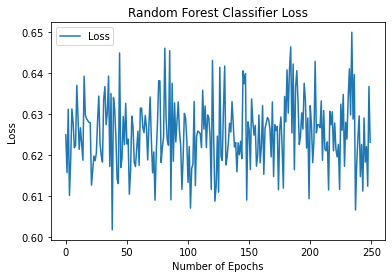

In [10]:
plt.plot(lossHis, label='Loss')
plt.title("Random Forest Classifier Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

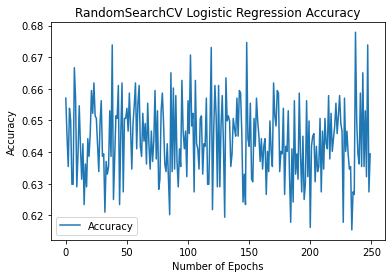

In [11]:
plt.plot(accHis, label='Accuracy')
plt.title("RandomSearchCV Logistic Regression Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
nepochs = 2500
forestModel = RandomForestClassifier(random_state=0)
forestModel.fit(x_train, y_train)
print("accuracy:", accuracy_score(forestModel.predict(x_test), y_test))




lossHis = []
accHis = []
for epoch in tqdm(range(nepochs), desc=f"test Epoch", unit="test epoch",  disable=False):
    x_train, x_test, y_train, y_test = generateData()
    forestModel = RandomForestClassifier(random_state=0)
    forestModel.fit(x_train, y_train)
    
    loss = log_loss(y_test, forestModel.predict_proba(x_test), eps=1e-15)
    accuracy = accuracy_score(forestModel.predict(x_test), y_test)
    lossHis.append(loss)
    accHis.append(accuracy)
    if(epoch % 10 == 0):
        print("Loss:", loss)
        print("Accuracy:", accuracy)


accuracy: 0.6386217948717948


test Epoch:   0%|          | 1/10000 [00:00<2:19:02,  1.20test epoch/s]

Loss: 0.6529773404063315
Accuracy: 0.6394230769230769


test Epoch:   0%|          | 11/10000 [00:08<2:07:48,  1.30test epoch/s]

Loss: 0.6550018926113275
Accuracy: 0.624198717948718


test Epoch:   0%|          | 21/10000 [00:16<2:07:29,  1.30test epoch/s]

Loss: 0.6712660695734676
Accuracy: 0.6266025641025641


test Epoch:   0%|          | 31/10000 [00:23<2:04:56,  1.33test epoch/s]

Loss: 0.6384746196355326
Accuracy: 0.6466346153846154


test Epoch:   0%|          | 41/10000 [00:31<2:02:45,  1.35test epoch/s]

Loss: 0.6599690751117746
Accuracy: 0.6330128205128205


test Epoch:   1%|          | 51/10000 [00:38<2:02:47,  1.35test epoch/s]

Loss: 0.6585826322076332
Accuracy: 0.624198717948718


test Epoch:   1%|          | 61/10000 [00:46<2:06:16,  1.31test epoch/s]

Loss: 0.7065466882183947
Accuracy: 0.6065705128205128


test Epoch:   1%|          | 71/10000 [00:54<2:06:23,  1.31test epoch/s]

Loss: 0.7013617710764952
Accuracy: 0.6153846153846154


test Epoch:   1%|          | 81/10000 [01:02<2:19:49,  1.18test epoch/s]

Loss: 0.6582503816584991
Accuracy: 0.6266025641025641


test Epoch:   1%|          | 91/10000 [01:10<2:11:16,  1.26test epoch/s]

Loss: 0.6747105372660666
Accuracy: 0.625801282051282


test Epoch:   1%|          | 101/10000 [01:17<2:09:24,  1.27test epoch/s]

Loss: 0.6491191084248537
Accuracy: 0.6466346153846154


test Epoch:   1%|          | 111/10000 [01:25<2:14:26,  1.23test epoch/s]

Loss: 0.6869660185201275
Accuracy: 0.6025641025641025


test Epoch:   1%|          | 121/10000 [01:34<2:13:27,  1.23test epoch/s]

Loss: 0.6503982847895171
Accuracy: 0.6314102564102564


test Epoch:   1%|▏         | 131/10000 [01:42<2:24:04,  1.14test epoch/s]

Loss: 0.6578526683723425
Accuracy: 0.6306089743589743


test Epoch:   1%|▏         | 141/10000 [01:51<2:16:30,  1.20test epoch/s]

Loss: 0.6672006364677014
Accuracy: 0.6201923076923077


test Epoch:   2%|▏         | 151/10000 [01:59<2:14:24,  1.22test epoch/s]

Loss: 0.6824012433251831
Accuracy: 0.6017628205128205


test Epoch:   2%|▏         | 161/10000 [02:07<2:14:47,  1.22test epoch/s]

Loss: 0.6583589467816917
Accuracy: 0.6362179487179487


test Epoch:   2%|▏         | 171/10000 [02:15<2:09:34,  1.26test epoch/s]

Loss: 0.6657241957887025
Accuracy: 0.6185897435897436


test Epoch:   2%|▏         | 181/10000 [02:23<2:11:16,  1.25test epoch/s]

Loss: 0.6600971010959722
Accuracy: 0.6193910256410257


test Epoch:   2%|▏         | 191/10000 [02:31<2:11:18,  1.25test epoch/s]

Loss: 0.6703186427638361
Accuracy: 0.6225961538461539


test Epoch:   2%|▏         | 201/10000 [02:39<2:08:02,  1.28test epoch/s]

Loss: 0.697016428362757
Accuracy: 0.6193910256410257


test Epoch:   2%|▏         | 211/10000 [02:47<2:07:39,  1.28test epoch/s]

Loss: 0.660466929251342
Accuracy: 0.6338141025641025


test Epoch:   2%|▏         | 221/10000 [02:54<2:03:48,  1.32test epoch/s]

Loss: 0.6943806845517531
Accuracy: 0.6025641025641025


test Epoch:   2%|▏         | 231/10000 [03:02<2:04:19,  1.31test epoch/s]

Loss: 0.6600466189374294
Accuracy: 0.6306089743589743


test Epoch:   2%|▏         | 241/10000 [03:10<2:10:38,  1.25test epoch/s]

Loss: 0.7033008303311051
Accuracy: 0.6201923076923077


test Epoch:   3%|▎         | 251/10000 [03:18<2:04:10,  1.31test epoch/s]

Loss: 0.6725877982088525
Accuracy: 0.6290064102564102


test Epoch:   3%|▎         | 261/10000 [03:25<2:01:36,  1.33test epoch/s]

Loss: 0.6846446484527643
Accuracy: 0.6081730769230769


test Epoch:   3%|▎         | 271/10000 [03:33<2:08:59,  1.26test epoch/s]

Loss: 0.6628728587553627
Accuracy: 0.6330128205128205


test Epoch:   3%|▎         | 281/10000 [03:41<2:03:12,  1.31test epoch/s]

Loss: 0.6684302951209968
Accuracy: 0.6153846153846154


test Epoch:   3%|▎         | 291/10000 [03:48<2:06:01,  1.28test epoch/s]

Loss: 0.6667242453903988
Accuracy: 0.624198717948718


test Epoch:   3%|▎         | 301/10000 [03:56<2:03:37,  1.31test epoch/s]

Loss: 0.6881452501590243
Accuracy: 0.6370192307692307


test Epoch:   3%|▎         | 311/10000 [04:04<2:02:30,  1.32test epoch/s]

Loss: 0.6626356288024419
Accuracy: 0.6442307692307693


test Epoch:   3%|▎         | 321/10000 [04:12<2:10:45,  1.23test epoch/s]

Loss: 0.6601027819362414
Accuracy: 0.6298076923076923


test Epoch:   3%|▎         | 331/10000 [04:20<2:03:04,  1.31test epoch/s]

Loss: 0.664512387418306
Accuracy: 0.6266025641025641


test Epoch:   3%|▎         | 341/10000 [04:27<2:02:30,  1.31test epoch/s]

Loss: 0.6552880207065706
Accuracy: 0.6378205128205128


test Epoch:   4%|▎         | 351/10000 [04:35<2:01:35,  1.32test epoch/s]

Loss: 0.6658017452397244
Accuracy: 0.6209935897435898


test Epoch:   4%|▎         | 361/10000 [04:43<2:02:52,  1.31test epoch/s]

Loss: 0.6765716959532508
Accuracy: 0.6193910256410257


test Epoch:   4%|▎         | 371/10000 [04:51<2:12:35,  1.21test epoch/s]

Loss: 0.6762184102664375
Accuracy: 0.6041666666666666


test Epoch:   4%|▍         | 381/10000 [04:59<2:08:44,  1.25test epoch/s]

Loss: 0.6626537151515859
Accuracy: 0.624198717948718


test Epoch:   4%|▍         | 391/10000 [05:07<2:10:20,  1.23test epoch/s]

Loss: 0.676905614500472
Accuracy: 0.6193910256410257


test Epoch:   4%|▍         | 401/10000 [05:16<2:10:29,  1.23test epoch/s]

Loss: 0.6676424075301955
Accuracy: 0.6209935897435898


test Epoch:   4%|▍         | 411/10000 [05:23<2:00:23,  1.33test epoch/s]

Loss: 0.6521995153472957
Accuracy: 0.6354166666666666


test Epoch:   4%|▍         | 421/10000 [05:31<2:02:58,  1.30test epoch/s]

Loss: 0.6768697333920118
Accuracy: 0.6442307692307693


test Epoch:   4%|▍         | 431/10000 [05:39<1:58:41,  1.34test epoch/s]

Loss: 0.6553122799207454
Accuracy: 0.6370192307692307


test Epoch:   4%|▍         | 441/10000 [05:46<1:59:45,  1.33test epoch/s]

Loss: 0.6342685399127658
Accuracy: 0.6530448717948718


test Epoch:   5%|▍         | 451/10000 [05:54<1:58:48,  1.34test epoch/s]

Loss: 0.6576186122440197
Accuracy: 0.6458333333333334


test Epoch:   5%|▍         | 461/10000 [06:01<1:58:54,  1.34test epoch/s]

Loss: 0.6458070645799443
Accuracy: 0.6498397435897436


test Epoch:   5%|▍         | 471/10000 [06:09<2:07:04,  1.25test epoch/s]

Loss: 0.643055632779645
Accuracy: 0.6538461538461539


test Epoch:   5%|▍         | 481/10000 [06:17<2:03:39,  1.28test epoch/s]

Loss: 0.6592068355854678
Accuracy: 0.6266025641025641


test Epoch:   5%|▍         | 491/10000 [06:24<2:00:10,  1.32test epoch/s]

Loss: 0.6761149416324996
Accuracy: 0.6145833333333334


test Epoch:   5%|▌         | 501/10000 [06:32<1:58:40,  1.33test epoch/s]

Loss: 0.655015584606204
Accuracy: 0.6322115384615384


test Epoch:   5%|▌         | 511/10000 [06:39<1:59:37,  1.32test epoch/s]

Loss: 0.6733007064114522
Accuracy: 0.6185897435897436


test Epoch:   5%|▌         | 521/10000 [06:47<2:04:29,  1.27test epoch/s]

Loss: 0.6567896421808941
Accuracy: 0.6274038461538461


test Epoch:   5%|▌         | 531/10000 [06:55<1:58:08,  1.34test epoch/s]

Loss: 0.6647491255807869
Accuracy: 0.6386217948717948


test Epoch:   5%|▌         | 541/10000 [07:02<1:59:38,  1.32test epoch/s]

Loss: 0.6719632249405941
Accuracy: 0.6314102564102564


test Epoch:   6%|▌         | 551/10000 [07:10<2:03:03,  1.28test epoch/s]

Loss: 0.6530710565896803
Accuracy: 0.6282051282051282


test Epoch:   6%|▌         | 561/10000 [07:18<2:11:40,  1.19test epoch/s]

Loss: 0.6711449202459383
Accuracy: 0.6266025641025641


test Epoch:   6%|▌         | 571/10000 [07:26<2:00:46,  1.30test epoch/s]

Loss: 0.6590053376785168
Accuracy: 0.625801282051282


test Epoch:   6%|▌         | 581/10000 [07:33<1:59:49,  1.31test epoch/s]

Loss: 0.6627820646170696
Accuracy: 0.6354166666666666


test Epoch:   6%|▌         | 591/10000 [07:41<1:58:33,  1.32test epoch/s]

Loss: 0.6949145330615872
Accuracy: 0.6137820512820513


test Epoch:   6%|▌         | 601/10000 [07:49<1:58:21,  1.32test epoch/s]

Loss: 0.6734397526830599
Accuracy: 0.6009615384615384


test Epoch:   6%|▌         | 611/10000 [07:56<1:58:04,  1.33test epoch/s]

Loss: 0.6901587226417113
Accuracy: 0.6201923076923077


test Epoch:   6%|▌         | 621/10000 [08:04<1:57:23,  1.33test epoch/s]

Loss: 0.6680638967846354
Accuracy: 0.6233974358974359


test Epoch:   6%|▋         | 631/10000 [08:11<2:02:16,  1.28test epoch/s]

Loss: 0.6641410829198795
Accuracy: 0.6185897435897436


test Epoch:   6%|▋         | 641/10000 [08:19<2:03:04,  1.27test epoch/s]

Loss: 0.6581293569346371
Accuracy: 0.6201923076923077


test Epoch:   7%|▋         | 651/10000 [08:27<1:58:08,  1.32test epoch/s]

Loss: 0.6568821830137404
Accuracy: 0.6129807692307693


test Epoch:   7%|▋         | 661/10000 [08:34<1:57:05,  1.33test epoch/s]

Loss: 0.6721921506590386
Accuracy: 0.6201923076923077


test Epoch:   7%|▋         | 671/10000 [08:42<2:01:25,  1.28test epoch/s]

Loss: 0.6757568574669413
Accuracy: 0.6169871794871795


test Epoch:   7%|▋         | 681/10000 [08:50<1:59:02,  1.30test epoch/s]

Loss: 0.7025385836647972
Accuracy: 0.6201923076923077


test Epoch:   7%|▋         | 691/10000 [08:57<1:55:19,  1.35test epoch/s]

Loss: 0.728563041507653
Accuracy: 0.59375


test Epoch:   7%|▋         | 701/10000 [09:05<1:55:28,  1.34test epoch/s]

Loss: 0.6767358073579413
Accuracy: 0.624198717948718


test Epoch:   7%|▋         | 711/10000 [09:13<2:07:23,  1.22test epoch/s]

Loss: 0.6638998141442662
Accuracy: 0.6137820512820513


test Epoch:   7%|▋         | 721/10000 [09:21<2:03:04,  1.26test epoch/s]

Loss: 0.6548852593176385
Accuracy: 0.6354166666666666


test Epoch:   7%|▋         | 731/10000 [09:28<1:59:38,  1.29test epoch/s]

Loss: 0.6638140216400974
Accuracy: 0.6306089743589743


test Epoch:   7%|▋         | 741/10000 [09:36<1:56:03,  1.33test epoch/s]

Loss: 0.6758454033482677
Accuracy: 0.6418269230769231


test Epoch:   8%|▊         | 751/10000 [09:45<2:17:38,  1.12test epoch/s]

Loss: 0.6593562866281674
Accuracy: 0.625801282051282


test Epoch:   8%|▊         | 761/10000 [09:53<2:09:18,  1.19test epoch/s]

Loss: 0.6649010750868252
Accuracy: 0.6129807692307693


test Epoch:   8%|▊         | 771/10000 [10:01<2:10:25,  1.18test epoch/s]

Loss: 0.651768856896662
Accuracy: 0.6314102564102564


test Epoch:   8%|▊         | 781/10000 [10:10<2:05:13,  1.23test epoch/s]

Loss: 0.6855085506980902
Accuracy: 0.6081730769230769


test Epoch:   8%|▊         | 791/10000 [10:18<2:09:37,  1.18test epoch/s]

Loss: 0.6603338231159267
Accuracy: 0.6193910256410257


test Epoch:   8%|▊         | 801/10000 [10:27<2:05:48,  1.22test epoch/s]

Loss: 0.6550062337409978
Accuracy: 0.6266025641025641


test Epoch:   8%|▊         | 811/10000 [10:35<2:02:54,  1.25test epoch/s]

Loss: 0.6757562542511578
Accuracy: 0.6137820512820513


test Epoch:   8%|▊         | 821/10000 [10:43<2:04:51,  1.23test epoch/s]

Loss: 0.6542443233116396
Accuracy: 0.6274038461538461


test Epoch:   8%|▊         | 831/10000 [10:51<2:03:46,  1.23test epoch/s]

Loss: 0.6531589337595675
Accuracy: 0.6442307692307693


test Epoch:   8%|▊         | 841/10000 [10:59<2:02:53,  1.24test epoch/s]

Loss: 0.6557744222921075
Accuracy: 0.6442307692307693


test Epoch:   9%|▊         | 851/10000 [11:07<2:08:08,  1.19test epoch/s]

Loss: 0.6594460812909554
Accuracy: 0.6282051282051282


test Epoch:   9%|▊         | 861/10000 [11:16<2:16:03,  1.12test epoch/s]

Loss: 0.6679336491528135
Accuracy: 0.6225961538461539


test Epoch:   9%|▊         | 871/10000 [11:24<2:08:01,  1.19test epoch/s]

Loss: 0.6703089966617489
Accuracy: 0.6089743589743589


test Epoch:   9%|▉         | 881/10000 [11:33<2:02:44,  1.24test epoch/s]

Loss: 0.6618721000989003
Accuracy: 0.6225961538461539


test Epoch:   9%|▉         | 891/10000 [11:41<2:01:02,  1.25test epoch/s]

Loss: 0.6605358947716738
Accuracy: 0.6185897435897436


test Epoch:   9%|▉         | 901/10000 [11:49<2:00:04,  1.26test epoch/s]

Loss: 0.6709256637476994
Accuracy: 0.6121794871794872


test Epoch:   9%|▉         | 911/10000 [11:57<2:02:04,  1.24test epoch/s]

Loss: 0.6546547730764821
Accuracy: 0.6346153846153846


test Epoch:   9%|▉         | 921/10000 [12:05<2:02:16,  1.24test epoch/s]

Loss: 0.6388361895779965
Accuracy: 0.6530448717948718


test Epoch:   9%|▉         | 931/10000 [12:13<2:01:49,  1.24test epoch/s]

Loss: 0.6759915701461222
Accuracy: 0.6225961538461539


test Epoch:   9%|▉         | 941/10000 [12:21<1:59:40,  1.26test epoch/s]

Loss: 0.6521623935346227
Accuracy: 0.6410256410256411


test Epoch:  10%|▉         | 951/10000 [12:29<2:04:11,  1.21test epoch/s]

Loss: 0.662825695876044
Accuracy: 0.6201923076923077


test Epoch:  10%|▉         | 961/10000 [12:37<1:58:25,  1.27test epoch/s]

Loss: 0.6557958464708025
Accuracy: 0.6233974358974359


test Epoch:  10%|▉         | 971/10000 [12:45<1:58:55,  1.27test epoch/s]

Loss: 0.6613593276849196
Accuracy: 0.6274038461538461


test Epoch:  10%|▉         | 981/10000 [12:53<1:58:55,  1.26test epoch/s]

Loss: 0.6720590775361345
Accuracy: 0.6185897435897436


test Epoch:  10%|▉         | 991/10000 [13:01<1:56:34,  1.29test epoch/s]

Loss: 0.6670989628869839
Accuracy: 0.6306089743589743


test Epoch:  10%|█         | 1001/10000 [13:08<1:57:49,  1.27test epoch/s]

Loss: 0.6580258681974035
Accuracy: 0.625801282051282


test Epoch:  10%|█         | 1011/10000 [13:16<1:56:58,  1.28test epoch/s]

Loss: 0.6708055351667246
Accuracy: 0.625801282051282


test Epoch:  10%|█         | 1021/10000 [13:25<2:07:48,  1.17test epoch/s]

Loss: 0.6547961176860045
Accuracy: 0.6290064102564102


test Epoch:  10%|█         | 1031/10000 [13:33<2:06:30,  1.18test epoch/s]

Loss: 0.6710000525872973
Accuracy: 0.6298076923076923


test Epoch:  10%|█         | 1041/10000 [13:41<2:01:04,  1.23test epoch/s]

Loss: 0.634365557731715
Accuracy: 0.6458333333333334


test Epoch:  11%|█         | 1051/10000 [13:49<1:57:48,  1.27test epoch/s]

Loss: 0.6522075647513927
Accuracy: 0.6498397435897436


test Epoch:  11%|█         | 1061/10000 [13:57<1:58:33,  1.26test epoch/s]

Loss: 0.6566541125752159
Accuracy: 0.6290064102564102


test Epoch:  11%|█         | 1071/10000 [14:05<1:57:02,  1.27test epoch/s]

Loss: 0.6777970748936175
Accuracy: 0.6193910256410257


test Epoch:  11%|█         | 1081/10000 [14:13<1:56:31,  1.28test epoch/s]

Loss: 0.6666149252535913
Accuracy: 0.6057692307692307


test Epoch:  11%|█         | 1091/10000 [14:21<2:00:43,  1.23test epoch/s]

Loss: 0.6408947960853073
Accuracy: 0.6402243589743589


test Epoch:  11%|█         | 1101/10000 [14:29<1:56:03,  1.28test epoch/s]

Loss: 0.6597004932218048
Accuracy: 0.6306089743589743


test Epoch:  11%|█         | 1111/10000 [14:37<1:58:46,  1.25test epoch/s]

Loss: 0.67790880432947
Accuracy: 0.6081730769230769


test Epoch:  11%|█         | 1121/10000 [14:45<1:54:36,  1.29test epoch/s]

Loss: 0.6527122218721081
Accuracy: 0.6442307692307693


test Epoch:  11%|█▏        | 1131/10000 [14:53<1:54:56,  1.29test epoch/s]

Loss: 0.6519977060346733
Accuracy: 0.6290064102564102


test Epoch:  11%|█▏        | 1141/10000 [15:00<1:54:47,  1.29test epoch/s]

Loss: 0.6526540576402332
Accuracy: 0.6354166666666666


test Epoch:  12%|█▏        | 1151/10000 [15:08<1:53:45,  1.30test epoch/s]

Loss: 0.649724764963862
Accuracy: 0.6458333333333334


test Epoch:  12%|█▏        | 1161/10000 [15:16<1:52:46,  1.31test epoch/s]

Loss: 0.6700707237304031
Accuracy: 0.6225961538461539


test Epoch:  12%|█▏        | 1171/10000 [15:24<1:57:34,  1.25test epoch/s]

Loss: 0.6578334441269872
Accuracy: 0.6233974358974359


test Epoch:  12%|█▏        | 1181/10000 [15:32<1:55:30,  1.27test epoch/s]

Loss: 0.6607122025800567
Accuracy: 0.6370192307692307


test Epoch:  12%|█▏        | 1191/10000 [15:40<1:55:50,  1.27test epoch/s]

Loss: 0.6701640277254739
Accuracy: 0.6274038461538461


test Epoch:  12%|█▏        | 1201/10000 [15:48<1:55:18,  1.27test epoch/s]

Loss: 0.6432109476482828
Accuracy: 0.6474358974358975


test Epoch:  12%|█▏        | 1211/10000 [15:55<1:53:44,  1.29test epoch/s]

Loss: 0.6717950393877216
Accuracy: 0.6266025641025641


test Epoch:  12%|█▏        | 1221/10000 [16:03<1:53:29,  1.29test epoch/s]

Loss: 0.67095645901305
Accuracy: 0.6225961538461539


test Epoch:  12%|█▏        | 1231/10000 [16:11<1:55:26,  1.27test epoch/s]

Loss: 0.6556064297180969
Accuracy: 0.6282051282051282


test Epoch:  12%|█▏        | 1241/10000 [16:19<1:52:39,  1.30test epoch/s]

Loss: 0.6808526077144128
Accuracy: 0.6370192307692307


test Epoch:  13%|█▎        | 1251/10000 [16:27<1:55:46,  1.26test epoch/s]

Loss: 0.6589605423198154
Accuracy: 0.6233974358974359


test Epoch:  13%|█▎        | 1261/10000 [16:35<2:00:45,  1.21test epoch/s]

Loss: 0.6666245992296279
Accuracy: 0.6394230769230769


test Epoch:  13%|█▎        | 1271/10000 [16:43<2:05:24,  1.16test epoch/s]

Loss: 0.6749810283950461
Accuracy: 0.6402243589743589


test Epoch:  13%|█▎        | 1281/10000 [16:51<1:56:02,  1.25test epoch/s]

Loss: 0.6609666669750875
Accuracy: 0.6225961538461539


test Epoch:  13%|█▎        | 1291/10000 [16:59<1:59:09,  1.22test epoch/s]

Loss: 0.6670508566331116
Accuracy: 0.6193910256410257


test Epoch:  13%|█▎        | 1301/10000 [17:07<1:53:34,  1.28test epoch/s]

Loss: 0.6592331425226821
Accuracy: 0.625


test Epoch:  13%|█▎        | 1311/10000 [17:15<2:00:47,  1.20test epoch/s]

Loss: 0.6723404350743605
Accuracy: 0.6145833333333334


test Epoch:  13%|█▎        | 1321/10000 [17:23<1:57:50,  1.23test epoch/s]

Loss: 0.6970902119436099
Accuracy: 0.6290064102564102


test Epoch:  13%|█▎        | 1331/10000 [17:31<1:52:56,  1.28test epoch/s]

Loss: 0.683201385210008
Accuracy: 0.6049679487179487


test Epoch:  13%|█▎        | 1341/10000 [17:40<2:00:18,  1.20test epoch/s]

Loss: 0.651745953124833
Accuracy: 0.6314102564102564


test Epoch:  14%|█▎        | 1351/10000 [17:48<1:54:47,  1.26test epoch/s]

Loss: 0.6498798381535421
Accuracy: 0.6362179487179487


test Epoch:  14%|█▎        | 1361/10000 [17:56<1:54:10,  1.26test epoch/s]

Loss: 0.6620566533523303
Accuracy: 0.6209935897435898


test Epoch:  14%|█▎        | 1371/10000 [18:03<1:51:44,  1.29test epoch/s]

Loss: 0.6756514200248573
Accuracy: 0.6073717948717948


test Epoch:  14%|█▍        | 1381/10000 [18:11<1:53:16,  1.27test epoch/s]

Loss: 0.6562837211005902
Accuracy: 0.6233974358974359


test Epoch:  14%|█▍        | 1391/10000 [18:19<1:50:28,  1.30test epoch/s]

Loss: 0.6734394058388307
Accuracy: 0.6113782051282052


test Epoch:  14%|█▍        | 1401/10000 [18:27<1:55:52,  1.24test epoch/s]

Loss: 0.6436333766647913
Accuracy: 0.6442307692307693


test Epoch:  14%|█▍        | 1411/10000 [18:35<1:54:12,  1.25test epoch/s]

Loss: 0.6512327775174768
Accuracy: 0.6306089743589743


test Epoch:  14%|█▍        | 1421/10000 [18:43<1:56:26,  1.23test epoch/s]

Loss: 0.6786785188783412
Accuracy: 0.6129807692307693


test Epoch:  14%|█▍        | 1431/10000 [18:51<1:51:34,  1.28test epoch/s]

Loss: 0.6776284329074748
Accuracy: 0.6057692307692307


test Epoch:  14%|█▍        | 1441/10000 [18:59<1:53:32,  1.26test epoch/s]

Loss: 0.675424407497549
Accuracy: 0.5985576923076923


test Epoch:  15%|█▍        | 1451/10000 [19:07<1:49:57,  1.30test epoch/s]

Loss: 0.6620488020182425
Accuracy: 0.6209935897435898


test Epoch:  15%|█▍        | 1461/10000 [19:15<1:50:53,  1.28test epoch/s]

Loss: 0.6532222740515086
Accuracy: 0.6394230769230769


test Epoch:  15%|█▍        | 1471/10000 [19:23<1:51:32,  1.27test epoch/s]

Loss: 0.6676977194676363
Accuracy: 0.6153846153846154


test Epoch:  15%|█▍        | 1481/10000 [19:31<1:57:08,  1.21test epoch/s]

Loss: 0.6886063187464831
Accuracy: 0.6033653846153846


test Epoch:  15%|█▍        | 1491/10000 [19:39<1:49:53,  1.29test epoch/s]

Loss: 0.6437897545749347
Accuracy: 0.6418269230769231


test Epoch:  15%|█▌        | 1501/10000 [19:47<1:51:45,  1.27test epoch/s]

Loss: 0.6568520011145739
Accuracy: 0.6161858974358975


test Epoch:  15%|█▌        | 1511/10000 [19:55<2:01:29,  1.16test epoch/s]

Loss: 0.6699776055018495
Accuracy: 0.6105769230769231


test Epoch:  15%|█▌        | 1521/10000 [20:03<1:50:59,  1.27test epoch/s]

Loss: 0.6775534052162806
Accuracy: 0.6129807692307693


test Epoch:  15%|█▌        | 1531/10000 [20:11<1:53:59,  1.24test epoch/s]

Loss: 0.6796094502473254
Accuracy: 0.6049679487179487


test Epoch:  15%|█▌        | 1541/10000 [20:19<1:54:23,  1.23test epoch/s]

Loss: 0.637975042076555
Accuracy: 0.6338141025641025


test Epoch:  16%|█▌        | 1551/10000 [20:27<1:55:37,  1.22test epoch/s]

Loss: 0.7006489860386305
Accuracy: 0.6402243589743589


test Epoch:  16%|█▌        | 1561/10000 [20:35<1:53:11,  1.24test epoch/s]

Loss: 0.6683123847658962
Accuracy: 0.6161858974358975


test Epoch:  16%|█▌        | 1571/10000 [20:43<1:54:43,  1.22test epoch/s]

Loss: 0.6603252707469262
Accuracy: 0.6282051282051282


test Epoch:  16%|█▌        | 1581/10000 [20:51<1:52:30,  1.25test epoch/s]

Loss: 0.6495845305971525
Accuracy: 0.6338141025641025


test Epoch:  16%|█▌        | 1591/10000 [20:59<1:51:08,  1.26test epoch/s]

Loss: 0.6751902687541929
Accuracy: 0.624198717948718


test Epoch:  16%|█▌        | 1601/10000 [21:07<1:50:30,  1.27test epoch/s]

Loss: 0.6535865755629999
Accuracy: 0.6378205128205128


test Epoch:  16%|█▌        | 1611/10000 [21:15<1:49:00,  1.28test epoch/s]

Loss: 0.6639697792867397
Accuracy: 0.6362179487179487


test Epoch:  16%|█▌        | 1621/10000 [21:23<1:48:46,  1.28test epoch/s]

Loss: 0.6811246006071118
Accuracy: 0.6113782051282052


test Epoch:  16%|█▋        | 1631/10000 [21:31<1:57:57,  1.18test epoch/s]

Loss: 0.6717448042862841
Accuracy: 0.6306089743589743


test Epoch:  16%|█▋        | 1641/10000 [21:39<1:50:09,  1.26test epoch/s]

Loss: 0.7079822565716055
Accuracy: 0.6201923076923077


test Epoch:  17%|█▋        | 1651/10000 [21:47<1:54:13,  1.22test epoch/s]

Loss: 0.6834937658545089
Accuracy: 0.5969551282051282


test Epoch:  17%|█▋        | 1661/10000 [21:55<1:53:35,  1.22test epoch/s]

Loss: 0.6873304724844513
Accuracy: 0.625


test Epoch:  17%|█▋        | 1671/10000 [22:03<1:48:51,  1.28test epoch/s]

Loss: 0.6470916788533477
Accuracy: 0.6474358974358975


test Epoch:  17%|█▋        | 1681/10000 [22:11<1:47:04,  1.29test epoch/s]

Loss: 0.668551165038848
Accuracy: 0.6362179487179487


test Epoch:  17%|█▋        | 1691/10000 [22:19<1:47:36,  1.29test epoch/s]

Loss: 0.6645220851081546
Accuracy: 0.6266025641025641


test Epoch:  17%|█▋        | 1701/10000 [22:26<1:47:14,  1.29test epoch/s]

Loss: 0.6510723038562564
Accuracy: 0.6185897435897436


test Epoch:  17%|█▋        | 1711/10000 [22:35<1:51:17,  1.24test epoch/s]

Loss: 0.6784698836229024
Accuracy: 0.6137820512820513


test Epoch:  17%|█▋        | 1721/10000 [22:42<1:49:03,  1.27test epoch/s]

Loss: 0.6731775943716036
Accuracy: 0.6081730769230769


test Epoch:  17%|█▋        | 1731/10000 [22:51<2:00:47,  1.14test epoch/s]

Loss: 0.6634265471818244
Accuracy: 0.6386217948717948


test Epoch:  17%|█▋        | 1741/10000 [22:59<1:46:22,  1.29test epoch/s]

Loss: 0.6888272821635147
Accuracy: 0.6089743589743589


test Epoch:  18%|█▊        | 1751/10000 [23:06<1:42:48,  1.34test epoch/s]

Loss: 0.6545389773561759
Accuracy: 0.6274038461538461


test Epoch:  18%|█▊        | 1761/10000 [23:14<1:43:51,  1.32test epoch/s]

Loss: 0.6682307600818985
Accuracy: 0.6169871794871795


test Epoch:  18%|█▊        | 1771/10000 [23:21<1:42:56,  1.33test epoch/s]

Loss: 0.667101472635305
Accuracy: 0.6233974358974359


test Epoch:  18%|█▊        | 1781/10000 [23:29<1:43:19,  1.33test epoch/s]

Loss: 0.6513647946439391
Accuracy: 0.6434294871794872


test Epoch:  18%|█▊        | 1791/10000 [23:36<1:41:45,  1.34test epoch/s]

Loss: 0.6830881811168528
Accuracy: 0.6201923076923077


test Epoch:  18%|█▊        | 1801/10000 [23:44<1:40:41,  1.36test epoch/s]

Loss: 0.6528655585648891
Accuracy: 0.6354166666666666


test Epoch:  18%|█▊        | 1811/10000 [23:51<1:44:25,  1.31test epoch/s]

Loss: 0.6682995449279104
Accuracy: 0.6185897435897436


test Epoch:  18%|█▊        | 1821/10000 [23:59<1:43:51,  1.31test epoch/s]

Loss: 0.6684308970650452
Accuracy: 0.6201923076923077


test Epoch:  18%|█▊        | 1831/10000 [24:07<1:41:34,  1.34test epoch/s]

Loss: 0.6659081055278643
Accuracy: 0.6233974358974359


test Epoch:  18%|█▊        | 1841/10000 [24:14<1:41:35,  1.34test epoch/s]

Loss: 0.6767660841072952
Accuracy: 0.6153846153846154


test Epoch:  19%|█▊        | 1851/10000 [24:22<1:44:27,  1.30test epoch/s]

Loss: 0.6685584305370897
Accuracy: 0.6322115384615384


test Epoch:  19%|█▊        | 1861/10000 [24:29<1:42:14,  1.33test epoch/s]

Loss: 0.6649156988316487
Accuracy: 0.6073717948717948


test Epoch:  19%|█▊        | 1871/10000 [24:37<1:43:22,  1.31test epoch/s]

Loss: 0.6696615576586503
Accuracy: 0.6209935897435898


test Epoch:  19%|█▉        | 1881/10000 [24:44<1:42:17,  1.32test epoch/s]

Loss: 0.6731943584222114
Accuracy: 0.6041666666666666


test Epoch:  19%|█▉        | 1891/10000 [24:52<1:42:24,  1.32test epoch/s]

Loss: 0.6480010260106778
Accuracy: 0.6217948717948718


test Epoch:  19%|█▉        | 1901/10000 [25:00<1:44:12,  1.30test epoch/s]

Loss: 0.6510917263943995
Accuracy: 0.6129807692307693


test Epoch:  19%|█▉        | 1911/10000 [25:07<1:44:25,  1.29test epoch/s]

Loss: 0.6635013167462809
Accuracy: 0.6201923076923077


test Epoch:  19%|█▉        | 1921/10000 [25:16<1:49:26,  1.23test epoch/s]

Loss: 0.6837790305991913
Accuracy: 0.592948717948718


test Epoch:  19%|█▉        | 1931/10000 [25:24<1:47:05,  1.26test epoch/s]

Loss: 0.6632460725305029
Accuracy: 0.6233974358974359


test Epoch:  19%|█▉        | 1941/10000 [25:32<1:47:16,  1.25test epoch/s]

Loss: 0.6476203510383044
Accuracy: 0.6386217948717948


test Epoch:  20%|█▉        | 1951/10000 [25:40<1:47:54,  1.24test epoch/s]

Loss: 0.6950792300683781
Accuracy: 0.6193910256410257


test Epoch:  20%|█▉        | 1961/10000 [25:48<1:47:35,  1.25test epoch/s]

Loss: 0.667577510989413
Accuracy: 0.6201923076923077


test Epoch:  20%|█▉        | 1971/10000 [25:56<1:51:48,  1.20test epoch/s]

Loss: 0.6759224398616315
Accuracy: 0.6306089743589743


test Epoch:  20%|█▉        | 1981/10000 [26:04<1:48:47,  1.23test epoch/s]

Loss: 0.653104465095179
Accuracy: 0.6322115384615384


test Epoch:  20%|█▉        | 1991/10000 [26:12<1:45:36,  1.26test epoch/s]

Loss: 0.6610464983277792
Accuracy: 0.6233974358974359


test Epoch:  20%|██        | 2001/10000 [26:20<1:47:38,  1.24test epoch/s]

Loss: 0.6613062534769779
Accuracy: 0.6290064102564102


test Epoch:  20%|██        | 2011/10000 [26:28<1:43:32,  1.29test epoch/s]

Loss: 0.6617372344254108
Accuracy: 0.6185897435897436


test Epoch:  20%|██        | 2021/10000 [26:36<1:47:47,  1.23test epoch/s]

Loss: 0.656651224615021
Accuracy: 0.6346153846153846


test Epoch:  20%|██        | 2031/10000 [26:44<1:45:06,  1.26test epoch/s]

Loss: 0.6613106094614282
Accuracy: 0.625801282051282


test Epoch:  20%|██        | 2041/10000 [26:52<1:43:02,  1.29test epoch/s]

Loss: 0.6666179589341598
Accuracy: 0.6362179487179487


test Epoch:  21%|██        | 2051/10000 [27:00<1:50:06,  1.20test epoch/s]

Loss: 0.6609088615729596
Accuracy: 0.625801282051282


test Epoch:  21%|██        | 2061/10000 [27:09<1:54:39,  1.15test epoch/s]

Loss: 0.6923019354632484
Accuracy: 0.6290064102564102


test Epoch:  21%|██        | 2071/10000 [27:17<1:43:27,  1.28test epoch/s]

Loss: 0.6723231032363542
Accuracy: 0.6129807692307693


test Epoch:  21%|██        | 2081/10000 [27:25<1:43:44,  1.27test epoch/s]

Loss: 0.6709826961639325
Accuracy: 0.6217948717948718


test Epoch:  21%|██        | 2091/10000 [27:33<1:45:42,  1.25test epoch/s]

Loss: 0.6852536842369994
Accuracy: 0.6346153846153846


test Epoch:  21%|██        | 2101/10000 [27:41<1:45:00,  1.25test epoch/s]

Loss: 0.6657779804634668
Accuracy: 0.6201923076923077


test Epoch:  21%|██        | 2111/10000 [27:49<1:42:41,  1.28test epoch/s]

Loss: 0.7070006097686755
Accuracy: 0.6089743589743589


test Epoch:  21%|██        | 2121/10000 [27:56<1:43:37,  1.27test epoch/s]

Loss: 0.6703581133700454
Accuracy: 0.6225961538461539


test Epoch:  21%|██▏       | 2131/10000 [28:05<1:46:29,  1.23test epoch/s]

Loss: 0.6711545825919879
Accuracy: 0.6097756410256411


test Epoch:  21%|██▏       | 2141/10000 [28:13<1:43:31,  1.27test epoch/s]

Loss: 0.6497070294852879
Accuracy: 0.6410256410256411


test Epoch:  22%|██▏       | 2151/10000 [28:21<1:43:38,  1.26test epoch/s]

Loss: 0.6345511498006228
Accuracy: 0.6514423076923077


test Epoch:  22%|██▏       | 2161/10000 [28:28<1:43:29,  1.26test epoch/s]

Loss: 0.6576843797829719
Accuracy: 0.6233974358974359


test Epoch:  22%|██▏       | 2171/10000 [28:36<1:41:33,  1.28test epoch/s]

Loss: 0.6735100803941892
Accuracy: 0.6049679487179487


test Epoch:  22%|██▏       | 2181/10000 [28:44<1:42:45,  1.27test epoch/s]

Loss: 0.6537560139834867
Accuracy: 0.6314102564102564


test Epoch:  22%|██▏       | 2191/10000 [28:52<1:43:06,  1.26test epoch/s]

Loss: 0.6566594761921732
Accuracy: 0.6322115384615384


test Epoch:  22%|██▏       | 2201/10000 [29:00<1:47:28,  1.21test epoch/s]

Loss: 0.6547484329946324
Accuracy: 0.625801282051282


test Epoch:  22%|██▏       | 2211/10000 [29:08<1:47:01,  1.21test epoch/s]

Loss: 0.660568244234199
Accuracy: 0.6274038461538461


test Epoch:  22%|██▏       | 2221/10000 [29:16<1:41:20,  1.28test epoch/s]

Loss: 0.6616219530142353
Accuracy: 0.6338141025641025


test Epoch:  22%|██▏       | 2231/10000 [29:24<1:40:56,  1.28test epoch/s]

Loss: 0.6649621535538233
Accuracy: 0.6201923076923077


test Epoch:  22%|██▏       | 2241/10000 [29:32<1:40:34,  1.29test epoch/s]

Loss: 0.6556616105900583
Accuracy: 0.625801282051282


test Epoch:  23%|██▎       | 2251/10000 [29:40<1:42:06,  1.26test epoch/s]

Loss: 0.6881261602772862
Accuracy: 0.624198717948718


test Epoch:  23%|██▎       | 2261/10000 [29:48<1:41:39,  1.27test epoch/s]

Loss: 0.6666229078094548
Accuracy: 0.6370192307692307


test Epoch:  23%|██▎       | 2271/10000 [29:55<1:40:11,  1.29test epoch/s]

Loss: 0.6641592821107714
Accuracy: 0.6233974358974359


test Epoch:  23%|██▎       | 2281/10000 [30:03<1:42:49,  1.25test epoch/s]

Loss: 0.7021702248024826
Accuracy: 0.6025641025641025


test Epoch:  23%|██▎       | 2291/10000 [30:11<1:41:54,  1.26test epoch/s]

Loss: 0.6374018467786542
Accuracy: 0.6314102564102564


test Epoch:  23%|██▎       | 2301/10000 [30:19<1:41:41,  1.26test epoch/s]

Loss: 0.6770691445602129
Accuracy: 0.624198717948718


test Epoch:  23%|██▎       | 2311/10000 [30:27<1:39:06,  1.29test epoch/s]

Loss: 0.6693906591544342
Accuracy: 0.6129807692307693


test Epoch:  23%|██▎       | 2321/10000 [30:35<1:38:33,  1.30test epoch/s]

Loss: 0.661438596610967
Accuracy: 0.624198717948718


test Epoch:  23%|██▎       | 2331/10000 [30:42<1:40:33,  1.27test epoch/s]

Loss: 0.6588498700637067
Accuracy: 0.6322115384615384


test Epoch:  23%|██▎       | 2341/10000 [30:50<1:39:05,  1.29test epoch/s]

Loss: 0.6793900819690034
Accuracy: 0.6097756410256411


test Epoch:  24%|██▎       | 2351/10000 [30:58<1:39:11,  1.29test epoch/s]

Loss: 0.6547023608215587
Accuracy: 0.6145833333333334


test Epoch:  24%|██▎       | 2361/10000 [31:06<1:41:13,  1.26test epoch/s]

Loss: 0.6713507256537489
Accuracy: 0.6161858974358975


test Epoch:  24%|██▎       | 2371/10000 [31:14<1:41:53,  1.25test epoch/s]

Loss: 0.670812784923805
Accuracy: 0.6290064102564102


test Epoch:  24%|██▍       | 2381/10000 [31:22<1:37:43,  1.30test epoch/s]

Loss: 0.656657891251112
Accuracy: 0.6185897435897436


test Epoch:  24%|██▍       | 2391/10000 [31:30<1:38:57,  1.28test epoch/s]

Loss: 0.672708626425734
Accuracy: 0.6266025641025641


test Epoch:  24%|██▍       | 2401/10000 [31:38<1:39:57,  1.27test epoch/s]

Loss: 0.6696854444819743
Accuracy: 0.6185897435897436


test Epoch:  24%|██▍       | 2411/10000 [31:46<1:44:51,  1.21test epoch/s]

Loss: 0.6667865181538486
Accuracy: 0.6097756410256411


test Epoch:  24%|██▍       | 2421/10000 [31:54<1:38:57,  1.28test epoch/s]

Loss: 0.6719712140839157
Accuracy: 0.6225961538461539


test Epoch:  24%|██▍       | 2431/10000 [32:02<1:39:39,  1.27test epoch/s]

Loss: 0.6572106773492081
Accuracy: 0.6145833333333334


test Epoch:  24%|██▍       | 2441/10000 [32:10<1:46:26,  1.18test epoch/s]

Loss: 0.6603031683061952
Accuracy: 0.625


test Epoch:  25%|██▍       | 2451/10000 [32:18<1:42:44,  1.22test epoch/s]

Loss: 0.6479515821924432
Accuracy: 0.6338141025641025


test Epoch:  25%|██▍       | 2461/10000 [32:26<1:39:22,  1.26test epoch/s]

Loss: 0.6465204901704593
Accuracy: 0.6490384615384616


test Epoch:  25%|██▍       | 2471/10000 [32:34<1:38:40,  1.27test epoch/s]

Loss: 0.6408780830270121
Accuracy: 0.6474358974358975


test Epoch:  25%|██▍       | 2481/10000 [32:42<1:38:56,  1.27test epoch/s]

Loss: 0.6950717330837736
Accuracy: 0.6314102564102564


test Epoch:  25%|██▍       | 2491/10000 [32:50<1:40:48,  1.24test epoch/s]

Loss: 0.6666096677142778
Accuracy: 0.6282051282051282


test Epoch:  25%|██▌       | 2501/10000 [32:58<1:39:33,  1.26test epoch/s]

Loss: 0.6550400250048302
Accuracy: 0.6177884615384616


test Epoch:  25%|██▌       | 2511/10000 [33:06<1:38:48,  1.26test epoch/s]

Loss: 0.6702737342039372
Accuracy: 0.6306089743589743


test Epoch:  25%|██▌       | 2521/10000 [33:14<1:45:04,  1.19test epoch/s]

Loss: 0.6743020312839814
Accuracy: 0.6233974358974359


test Epoch:  25%|██▌       | 2531/10000 [33:22<1:39:34,  1.25test epoch/s]

Loss: 0.6477786429521243
Accuracy: 0.6290064102564102


test Epoch:  25%|██▌       | 2541/10000 [33:30<1:38:13,  1.27test epoch/s]

Loss: 0.6493746951709616
Accuracy: 0.6394230769230769


test Epoch:  26%|██▌       | 2551/10000 [33:38<1:39:03,  1.25test epoch/s]

Loss: 0.6468965630248334
Accuracy: 0.6458333333333334


test Epoch:  26%|██▌       | 2561/10000 [33:46<1:41:57,  1.22test epoch/s]

Loss: 0.6496602740719546
Accuracy: 0.6386217948717948


test Epoch:  26%|██▌       | 2571/10000 [33:54<1:36:33,  1.28test epoch/s]

Loss: 0.6508510287875361
Accuracy: 0.6161858974358975


test Epoch:  26%|██▌       | 2581/10000 [34:02<1:36:30,  1.28test epoch/s]

Loss: 0.6467933845898772
Accuracy: 0.6274038461538461


test Epoch:  26%|██▌       | 2591/10000 [34:10<1:37:38,  1.26test epoch/s]

Loss: 0.6694083766525137
Accuracy: 0.6233974358974359


test Epoch:  26%|██▌       | 2601/10000 [34:18<1:39:34,  1.24test epoch/s]

Loss: 0.6912363373015302
Accuracy: 0.6193910256410257


test Epoch:  26%|██▌       | 2611/10000 [34:26<1:35:28,  1.29test epoch/s]

Loss: 0.6653602545049279
Accuracy: 0.624198717948718


test Epoch:  26%|██▌       | 2621/10000 [34:34<1:42:43,  1.20test epoch/s]

Loss: 0.6608956617618778
Accuracy: 0.6274038461538461


test Epoch:  26%|██▋       | 2631/10000 [34:42<1:43:55,  1.18test epoch/s]

Loss: 0.6480370896521217
Accuracy: 0.6466346153846154


test Epoch:  26%|██▋       | 2641/10000 [34:50<1:40:50,  1.22test epoch/s]

Loss: 0.6953489685396309
Accuracy: 0.6322115384615384


test Epoch:  27%|██▋       | 2651/10000 [34:58<1:44:28,  1.17test epoch/s]

Loss: 0.6730924615892871
Accuracy: 0.6217948717948718


test Epoch:  27%|██▋       | 2661/10000 [35:07<1:42:43,  1.19test epoch/s]

Loss: 0.6617014022555034
Accuracy: 0.6354166666666666


test Epoch:  27%|██▋       | 2671/10000 [35:15<1:46:03,  1.15test epoch/s]

Loss: 0.6926426634006003
Accuracy: 0.6386217948717948


test Epoch:  27%|██▋       | 2681/10000 [35:24<1:40:35,  1.21test epoch/s]

Loss: 0.6525477166347494
Accuracy: 0.6458333333333334


test Epoch:  27%|██▋       | 2691/10000 [35:32<1:36:16,  1.27test epoch/s]

Loss: 0.6439031507390643
Accuracy: 0.6434294871794872


test Epoch:  27%|██▋       | 2701/10000 [35:40<1:35:48,  1.27test epoch/s]

Loss: 0.653765892841542
Accuracy: 0.6482371794871795


test Epoch:  27%|██▋       | 2711/10000 [35:48<1:36:21,  1.26test epoch/s]

Loss: 0.6498420045320896
Accuracy: 0.625801282051282


test Epoch:  27%|██▋       | 2721/10000 [35:56<1:36:32,  1.26test epoch/s]

Loss: 0.6472812565328968
Accuracy: 0.6354166666666666


test Epoch:  27%|██▋       | 2731/10000 [36:04<1:38:09,  1.23test epoch/s]

Loss: 0.6835805476515303
Accuracy: 0.6033653846153846


test Epoch:  27%|██▋       | 2741/10000 [36:12<1:38:53,  1.22test epoch/s]

Loss: 0.646608062955219
Accuracy: 0.6354166666666666


test Epoch:  28%|██▊       | 2751/10000 [36:21<1:45:14,  1.15test epoch/s]

Loss: 0.6695305951489465
Accuracy: 0.6233974358974359


test Epoch:  28%|██▊       | 2761/10000 [36:29<1:36:51,  1.25test epoch/s]

Loss: 0.6532096170591429
Accuracy: 0.6402243589743589


test Epoch:  28%|██▊       | 2771/10000 [36:37<1:36:12,  1.25test epoch/s]

Loss: 0.6597027680301032
Accuracy: 0.6274038461538461


test Epoch:  28%|██▊       | 2781/10000 [36:45<1:37:54,  1.23test epoch/s]

Loss: 0.649451606911211
Accuracy: 0.6386217948717948


test Epoch:  28%|██▊       | 2791/10000 [36:53<1:40:36,  1.19test epoch/s]

Loss: 0.6943701025172224
Accuracy: 0.624198717948718


test Epoch:  28%|██▊       | 2801/10000 [37:01<1:39:27,  1.21test epoch/s]

Loss: 0.6427517325073503
Accuracy: 0.6386217948717948


test Epoch:  28%|██▊       | 2811/10000 [37:10<1:41:22,  1.18test epoch/s]

Loss: 0.6652993904807462
Accuracy: 0.6153846153846154


test Epoch:  28%|██▊       | 2821/10000 [37:18<1:41:08,  1.18test epoch/s]

Loss: 0.6693918912947432
Accuracy: 0.6121794871794872


test Epoch:  28%|██▊       | 2831/10000 [37:27<1:38:33,  1.21test epoch/s]

Loss: 0.6710551719053416
Accuracy: 0.6193910256410257


test Epoch:  28%|██▊       | 2841/10000 [37:35<1:34:33,  1.26test epoch/s]

Loss: 0.6674441509391438
Accuracy: 0.6217948717948718


test Epoch:  29%|██▊       | 2851/10000 [37:43<1:39:26,  1.20test epoch/s]

Loss: 0.6822199273432189
Accuracy: 0.6081730769230769


test Epoch:  29%|██▊       | 2861/10000 [37:51<1:35:24,  1.25test epoch/s]

Loss: 0.718127510268848
Accuracy: 0.6017628205128205


test Epoch:  29%|██▊       | 2871/10000 [37:59<1:33:54,  1.27test epoch/s]

Loss: 0.6486514435468249
Accuracy: 0.6209935897435898


test Epoch:  29%|██▉       | 2881/10000 [38:07<1:31:19,  1.30test epoch/s]

Loss: 0.6494309668015743
Accuracy: 0.6378205128205128


test Epoch:  29%|██▉       | 2891/10000 [38:14<1:30:51,  1.30test epoch/s]

Loss: 0.6614898775916098
Accuracy: 0.6129807692307693


test Epoch:  29%|██▉       | 2901/10000 [38:22<1:37:36,  1.21test epoch/s]

Loss: 0.6553709287734771
Accuracy: 0.6322115384615384


test Epoch:  29%|██▉       | 2911/10000 [38:30<1:34:29,  1.25test epoch/s]

Loss: 0.6463437274598325
Accuracy: 0.6466346153846154


test Epoch:  29%|██▉       | 2921/10000 [38:38<1:31:22,  1.29test epoch/s]

Loss: 0.6612685022257014
Accuracy: 0.6314102564102564


test Epoch:  29%|██▉       | 2931/10000 [38:46<1:34:58,  1.24test epoch/s]

Loss: 0.6607828948866198
Accuracy: 0.625


test Epoch:  29%|██▉       | 2941/10000 [38:54<1:35:36,  1.23test epoch/s]

Loss: 0.6736192469055785
Accuracy: 0.6322115384615384


test Epoch:  30%|██▉       | 2951/10000 [39:02<1:34:56,  1.24test epoch/s]

Loss: 0.6745081812048433
Accuracy: 0.6129807692307693


test Epoch:  30%|██▉       | 2961/10000 [39:10<1:31:19,  1.28test epoch/s]

Loss: 0.6634966121384354
Accuracy: 0.6233974358974359


test Epoch:  30%|██▉       | 2971/10000 [39:18<1:32:26,  1.27test epoch/s]

Loss: 0.6718921217091693
Accuracy: 0.6217948717948718


test Epoch:  30%|██▉       | 2981/10000 [39:26<1:37:03,  1.21test epoch/s]

Loss: 0.6653444327676328
Accuracy: 0.6282051282051282


test Epoch:  30%|██▉       | 2991/10000 [39:34<1:31:47,  1.27test epoch/s]

Loss: 0.678320820349501
Accuracy: 0.6217948717948718


test Epoch:  30%|███       | 3001/10000 [39:42<1:30:29,  1.29test epoch/s]

Loss: 0.6619754808117315
Accuracy: 0.6177884615384616


test Epoch:  30%|███       | 3011/10000 [39:50<1:30:15,  1.29test epoch/s]

Loss: 0.6879144348935654
Accuracy: 0.6201923076923077


test Epoch:  30%|███       | 3021/10000 [39:58<1:33:20,  1.25test epoch/s]

Loss: 0.6712661280425266
Accuracy: 0.6402243589743589


test Epoch:  30%|███       | 3031/10000 [40:05<1:29:47,  1.29test epoch/s]

Loss: 0.6768242110514513
Accuracy: 0.6410256410256411


test Epoch:  30%|███       | 3041/10000 [40:13<1:29:58,  1.29test epoch/s]

Loss: 0.6704735747866138
Accuracy: 0.6097756410256411


test Epoch:  31%|███       | 3051/10000 [40:21<1:35:10,  1.22test epoch/s]

Loss: 0.678573858899431
Accuracy: 0.6169871794871795


test Epoch:  31%|███       | 3061/10000 [40:29<1:34:43,  1.22test epoch/s]

Loss: 0.667913314198822
Accuracy: 0.6177884615384616


test Epoch:  31%|███       | 3071/10000 [40:37<1:31:06,  1.27test epoch/s]

Loss: 0.6713337086195015
Accuracy: 0.6169871794871795


test Epoch:  31%|███       | 3081/10000 [40:45<1:31:26,  1.26test epoch/s]

Loss: 0.659241466481269
Accuracy: 0.6225961538461539


test Epoch:  31%|███       | 3091/10000 [40:53<1:31:03,  1.26test epoch/s]

Loss: 0.666184212561113
Accuracy: 0.6009615384615384


test Epoch:  31%|███       | 3101/10000 [41:01<1:32:19,  1.25test epoch/s]

Loss: 0.6578588523109673
Accuracy: 0.6338141025641025


test Epoch:  31%|███       | 3111/10000 [41:09<1:29:26,  1.28test epoch/s]

Loss: 0.6700093872438652
Accuracy: 0.6233974358974359


test Epoch:  31%|███       | 3121/10000 [41:17<1:29:13,  1.28test epoch/s]

Loss: 0.6696566527537049
Accuracy: 0.6490384615384616


test Epoch:  31%|███▏      | 3131/10000 [41:25<1:31:21,  1.25test epoch/s]

Loss: 0.6434746805548578
Accuracy: 0.6522435897435898


test Epoch:  31%|███▏      | 3141/10000 [41:33<1:33:17,  1.23test epoch/s]

Loss: 0.6688595422016608
Accuracy: 0.624198717948718


test Epoch:  32%|███▏      | 3151/10000 [41:41<1:29:31,  1.28test epoch/s]

Loss: 0.6815388205546971
Accuracy: 0.6113782051282052


test Epoch:  32%|███▏      | 3161/10000 [41:49<1:28:43,  1.28test epoch/s]

Loss: 0.6667483545334998
Accuracy: 0.625


test Epoch:  32%|███▏      | 3171/10000 [41:57<1:32:48,  1.23test epoch/s]

Loss: 0.6570041483061891
Accuracy: 0.625801282051282


test Epoch:  32%|███▏      | 3181/10000 [42:05<1:31:13,  1.25test epoch/s]

Loss: 0.6577615602533923
Accuracy: 0.624198717948718


test Epoch:  32%|███▏      | 3191/10000 [42:13<1:27:46,  1.29test epoch/s]

Loss: 0.6846246525782769
Accuracy: 0.5921474358974359


test Epoch:  32%|███▏      | 3201/10000 [42:20<1:27:52,  1.29test epoch/s]

Loss: 0.6764343726006566
Accuracy: 0.6201923076923077


test Epoch:  32%|███▏      | 3211/10000 [42:28<1:29:24,  1.27test epoch/s]

Loss: 0.6800415011468385
Accuracy: 0.6049679487179487


test Epoch:  32%|███▏      | 3221/10000 [42:36<1:31:40,  1.23test epoch/s]

Loss: 0.6628790186794689
Accuracy: 0.624198717948718


test Epoch:  32%|███▏      | 3231/10000 [42:44<1:29:45,  1.26test epoch/s]

Loss: 0.662338738571172
Accuracy: 0.6466346153846154


test Epoch:  32%|███▏      | 3241/10000 [42:52<1:27:50,  1.28test epoch/s]

Loss: 0.6687671475103245
Accuracy: 0.6169871794871795


test Epoch:  33%|███▎      | 3251/10000 [43:00<1:33:07,  1.21test epoch/s]

Loss: 0.6455107398859207
Accuracy: 0.6225961538461539


test Epoch:  33%|███▎      | 3261/10000 [43:08<1:33:15,  1.20test epoch/s]

Loss: 0.6827283272556115
Accuracy: 0.6049679487179487


test Epoch:  33%|███▎      | 3271/10000 [43:16<1:29:11,  1.26test epoch/s]

Loss: 0.6633101141215436
Accuracy: 0.6153846153846154


test Epoch:  33%|███▎      | 3281/10000 [43:24<1:28:16,  1.27test epoch/s]

Loss: 0.679747530803135
Accuracy: 0.6209935897435898


test Epoch:  33%|███▎      | 3291/10000 [43:32<1:30:15,  1.24test epoch/s]

Loss: 0.6520979585261159
Accuracy: 0.6338141025641025


test Epoch:  33%|███▎      | 3301/10000 [43:40<1:30:11,  1.24test epoch/s]

Loss: 0.659681284856855
Accuracy: 0.6314102564102564


test Epoch:  33%|███▎      | 3311/10000 [43:48<1:29:41,  1.24test epoch/s]

Loss: 0.6439182176619956
Accuracy: 0.6450320512820513


test Epoch:  33%|███▎      | 3321/10000 [43:56<1:26:38,  1.28test epoch/s]

Loss: 0.6752934987494807
Accuracy: 0.6137820512820513


test Epoch:  33%|███▎      | 3331/10000 [44:04<1:28:10,  1.26test epoch/s]

Loss: 0.6726712841981486
Accuracy: 0.6274038461538461


test Epoch:  33%|███▎      | 3341/10000 [44:12<1:27:25,  1.27test epoch/s]

Loss: 0.6965854570080475
Accuracy: 0.6049679487179487


test Epoch:  34%|███▎      | 3351/10000 [44:20<1:26:33,  1.28test epoch/s]

Loss: 0.6790545080367626
Accuracy: 0.6169871794871795


test Epoch:  34%|███▎      | 3361/10000 [44:28<1:25:35,  1.29test epoch/s]

Loss: 0.659167706468181
Accuracy: 0.6362179487179487


test Epoch:  34%|███▎      | 3371/10000 [44:36<1:29:01,  1.24test epoch/s]

Loss: 0.6681940483862375
Accuracy: 0.6073717948717948


test Epoch:  34%|███▍      | 3381/10000 [44:44<1:34:22,  1.17test epoch/s]

Loss: 0.6787676324018287
Accuracy: 0.6089743589743589


test Epoch:  34%|███▍      | 3391/10000 [44:52<1:24:41,  1.30test epoch/s]

Loss: 0.6477477874390266
Accuracy: 0.6201923076923077


test Epoch:  34%|███▍      | 3401/10000 [45:00<1:23:56,  1.31test epoch/s]

Loss: 0.6561510080789114
Accuracy: 0.624198717948718


test Epoch:  34%|███▍      | 3411/10000 [45:08<1:24:17,  1.30test epoch/s]

Loss: 0.6577805322129854
Accuracy: 0.6209935897435898


test Epoch:  34%|███▍      | 3421/10000 [45:16<1:26:05,  1.27test epoch/s]

Loss: 0.6605123238883396
Accuracy: 0.6217948717948718


test Epoch:  34%|███▍      | 3431/10000 [45:23<1:23:00,  1.32test epoch/s]

Loss: 0.6852706976336514
Accuracy: 0.6089743589743589


test Epoch:  34%|███▍      | 3441/10000 [45:31<1:23:42,  1.31test epoch/s]

Loss: 0.663780093939304
Accuracy: 0.6209935897435898


test Epoch:  35%|███▍      | 3451/10000 [45:39<1:25:36,  1.28test epoch/s]

Loss: 0.6962117277412571
Accuracy: 0.6193910256410257


test Epoch:  35%|███▍      | 3461/10000 [45:46<1:23:46,  1.30test epoch/s]

Loss: 0.6733008676681461
Accuracy: 0.6161858974358975


test Epoch:  35%|███▍      | 3471/10000 [45:54<1:23:01,  1.31test epoch/s]

Loss: 0.685678152303551
Accuracy: 0.6073717948717948


test Epoch:  35%|███▍      | 3481/10000 [46:02<1:22:51,  1.31test epoch/s]

Loss: 0.705984377484383
Accuracy: 0.6209935897435898


test Epoch:  35%|███▍      | 3491/10000 [46:09<1:24:16,  1.29test epoch/s]

Loss: 0.6637532598995955
Accuracy: 0.6322115384615384


test Epoch:  35%|███▌      | 3501/10000 [46:17<1:24:14,  1.29test epoch/s]

Loss: 0.6586522571066149
Accuracy: 0.6314102564102564


test Epoch:  35%|███▌      | 3511/10000 [46:25<1:25:06,  1.27test epoch/s]

Loss: 0.6374472780922139
Accuracy: 0.6458333333333334


test Epoch:  35%|███▌      | 3521/10000 [46:33<1:26:25,  1.25test epoch/s]

Loss: 0.6756679487814881
Accuracy: 0.6145833333333334


test Epoch:  35%|███▌      | 3531/10000 [46:41<1:27:21,  1.23test epoch/s]

Loss: 0.6478834315405467
Accuracy: 0.6306089743589743


test Epoch:  35%|███▌      | 3541/10000 [46:49<1:28:49,  1.21test epoch/s]

Loss: 0.6751083557132836
Accuracy: 0.6233974358974359


test Epoch:  36%|███▌      | 3551/10000 [46:57<1:26:14,  1.25test epoch/s]

Loss: 0.6627321101115061
Accuracy: 0.6233974358974359


test Epoch:  36%|███▌      | 3561/10000 [47:05<1:26:46,  1.24test epoch/s]

Loss: 0.6502819825043579
Accuracy: 0.6346153846153846


test Epoch:  36%|███▌      | 3571/10000 [47:13<1:23:39,  1.28test epoch/s]

Loss: 0.6772350791287903
Accuracy: 0.6177884615384616


test Epoch:  36%|███▌      | 3581/10000 [47:21<1:26:42,  1.23test epoch/s]

Loss: 0.6577533516217011
Accuracy: 0.6314102564102564


test Epoch:  36%|███▌      | 3591/10000 [47:29<1:26:28,  1.24test epoch/s]

Loss: 0.7055871516077553
Accuracy: 0.6113782051282052


test Epoch:  36%|███▌      | 3601/10000 [47:37<1:22:48,  1.29test epoch/s]

Loss: 0.6462894052692914
Accuracy: 0.6402243589743589


test Epoch:  36%|███▌      | 3611/10000 [47:45<1:27:10,  1.22test epoch/s]

Loss: 0.6689095884173876
Accuracy: 0.6290064102564102


test Epoch:  36%|███▌      | 3621/10000 [47:53<1:23:43,  1.27test epoch/s]

Loss: 0.6878040704257204
Accuracy: 0.6065705128205128


test Epoch:  36%|███▋      | 3631/10000 [48:01<1:24:21,  1.26test epoch/s]

Loss: 0.6733637222876272
Accuracy: 0.6201923076923077


test Epoch:  36%|███▋      | 3641/10000 [48:09<1:26:03,  1.23test epoch/s]

Loss: 0.6544450186567278
Accuracy: 0.625801282051282


test Epoch:  37%|███▋      | 3651/10000 [48:16<1:21:58,  1.29test epoch/s]

Loss: 0.6685320206822511
Accuracy: 0.6217948717948718


test Epoch:  37%|███▋      | 3661/10000 [48:24<1:21:21,  1.30test epoch/s]

Loss: 0.6691846187871346
Accuracy: 0.6105769230769231


test Epoch:  37%|███▋      | 3671/10000 [48:32<1:22:22,  1.28test epoch/s]

Loss: 0.6680840180282447
Accuracy: 0.6266025641025641


test Epoch:  37%|███▋      | 3681/10000 [48:40<1:21:39,  1.29test epoch/s]

Loss: 0.6869479615987565
Accuracy: 0.6233974358974359


test Epoch:  37%|███▋      | 3691/10000 [48:48<1:23:18,  1.26test epoch/s]

Loss: 0.6547116535751264
Accuracy: 0.6322115384615384


test Epoch:  37%|███▋      | 3701/10000 [48:55<1:20:42,  1.30test epoch/s]

Loss: 0.6629824987669272
Accuracy: 0.6177884615384616


test Epoch:  37%|███▋      | 3711/10000 [49:03<1:19:59,  1.31test epoch/s]

Loss: 0.6765704591053289
Accuracy: 0.6161858974358975


test Epoch:  37%|███▋      | 3721/10000 [49:11<1:23:01,  1.26test epoch/s]

Loss: 0.6789490135112644
Accuracy: 0.6177884615384616


test Epoch:  37%|███▋      | 3731/10000 [49:19<1:23:18,  1.25test epoch/s]

Loss: 0.6560914387791984
Accuracy: 0.6306089743589743


test Epoch:  37%|███▋      | 3741/10000 [49:27<1:28:17,  1.18test epoch/s]

Loss: 0.6667689783075179
Accuracy: 0.6282051282051282


test Epoch:  38%|███▊      | 3751/10000 [49:36<1:27:29,  1.19test epoch/s]

Loss: 0.7031096609715126
Accuracy: 0.6073717948717948


test Epoch:  38%|███▊      | 3761/10000 [49:44<1:22:22,  1.26test epoch/s]

Loss: 0.6558439976142241
Accuracy: 0.624198717948718


test Epoch:  38%|███▊      | 3771/10000 [49:52<1:24:12,  1.23test epoch/s]

Loss: 0.68389188867206
Accuracy: 0.6089743589743589


test Epoch:  38%|███▊      | 3781/10000 [50:00<1:20:39,  1.29test epoch/s]

Loss: 0.6646351502245732
Accuracy: 0.624198717948718


test Epoch:  38%|███▊      | 3791/10000 [50:07<1:20:22,  1.29test epoch/s]

Loss: 0.6607326649135847
Accuracy: 0.6097756410256411


test Epoch:  38%|███▊      | 3801/10000 [50:15<1:20:26,  1.28test epoch/s]

Loss: 0.6611523819232185
Accuracy: 0.6370192307692307


test Epoch:  38%|███▊      | 3811/10000 [50:23<1:21:40,  1.26test epoch/s]

Loss: 0.6627021332694204
Accuracy: 0.6217948717948718


test Epoch:  38%|███▊      | 3821/10000 [50:31<1:19:58,  1.29test epoch/s]

Loss: 0.6724175605519616
Accuracy: 0.6185897435897436


test Epoch:  38%|███▊      | 3831/10000 [50:39<1:20:32,  1.28test epoch/s]

Loss: 0.6706811270420672
Accuracy: 0.6225961538461539


test Epoch:  38%|███▊      | 3841/10000 [50:47<1:20:45,  1.27test epoch/s]

Loss: 0.7043845126126732
Accuracy: 0.625


test Epoch:  39%|███▊      | 3851/10000 [50:55<1:21:23,  1.26test epoch/s]

Loss: 0.6779069354043097
Accuracy: 0.6153846153846154


test Epoch:  39%|███▊      | 3861/10000 [51:03<1:21:09,  1.26test epoch/s]

Loss: 0.6457542111576189
Accuracy: 0.6434294871794872


test Epoch:  39%|███▊      | 3871/10000 [51:11<1:21:06,  1.26test epoch/s]

Loss: 0.6733845555211948
Accuracy: 0.6209935897435898


test Epoch:  39%|███▉      | 3881/10000 [51:19<1:20:45,  1.26test epoch/s]

Loss: 0.6539637067773315
Accuracy: 0.6121794871794872


test Epoch:  39%|███▉      | 3891/10000 [51:27<1:20:25,  1.27test epoch/s]

Loss: 0.6856465985394623
Accuracy: 0.6282051282051282


test Epoch:  39%|███▉      | 3901/10000 [51:35<1:18:38,  1.29test epoch/s]

Loss: 0.6631705422923293
Accuracy: 0.6201923076923077


test Epoch:  39%|███▉      | 3911/10000 [51:42<1:18:49,  1.29test epoch/s]

Loss: 0.650467131123664
Accuracy: 0.6354166666666666


test Epoch:  39%|███▉      | 3921/10000 [51:50<1:22:18,  1.23test epoch/s]

Loss: 0.6663713843634167
Accuracy: 0.6225961538461539


test Epoch:  39%|███▉      | 3931/10000 [51:58<1:20:22,  1.26test epoch/s]

Loss: 0.6820708297848156
Accuracy: 0.6410256410256411


test Epoch:  39%|███▉      | 3941/10000 [52:06<1:18:43,  1.28test epoch/s]

Loss: 0.6649710212359545
Accuracy: 0.624198717948718


test Epoch:  40%|███▉      | 3951/10000 [52:14<1:21:47,  1.23test epoch/s]

Loss: 0.6586953326295235
Accuracy: 0.6354166666666666


test Epoch:  40%|███▉      | 3961/10000 [52:22<1:19:15,  1.27test epoch/s]

Loss: 0.6445166618783408
Accuracy: 0.6378205128205128


test Epoch:  40%|███▉      | 3971/10000 [52:30<1:19:08,  1.27test epoch/s]

Loss: 0.6528265686099977
Accuracy: 0.6314102564102564


test Epoch:  40%|███▉      | 3981/10000 [52:38<1:26:20,  1.16test epoch/s]

Loss: 0.6615337724865713
Accuracy: 0.6145833333333334


test Epoch:  40%|███▉      | 3991/10000 [52:46<1:19:55,  1.25test epoch/s]

Loss: 0.6631873372277878
Accuracy: 0.6233974358974359


test Epoch:  40%|████      | 4001/10000 [52:55<1:22:49,  1.21test epoch/s]

Loss: 0.6527542854214409
Accuracy: 0.6193910256410257


test Epoch:  40%|████      | 4011/10000 [53:03<1:21:26,  1.23test epoch/s]

Loss: 0.6655941087678036
Accuracy: 0.6322115384615384


test Epoch:  40%|████      | 4021/10000 [53:11<1:21:43,  1.22test epoch/s]

Loss: 0.6742298978238436
Accuracy: 0.6201923076923077


test Epoch:  40%|████      | 4031/10000 [53:20<1:23:08,  1.20test epoch/s]

Loss: 0.6444475273155008
Accuracy: 0.6410256410256411


test Epoch:  40%|████      | 4041/10000 [53:28<1:21:38,  1.22test epoch/s]

Loss: 0.6480480173435722
Accuracy: 0.6274038461538461


test Epoch:  41%|████      | 4051/10000 [53:36<1:20:00,  1.24test epoch/s]

Loss: 0.6860742388071367
Accuracy: 0.6113782051282052


test Epoch:  41%|████      | 4061/10000 [53:44<1:19:23,  1.25test epoch/s]

Loss: 0.6723956152885652
Accuracy: 0.6177884615384616


test Epoch:  41%|████      | 4071/10000 [53:52<1:17:33,  1.27test epoch/s]

Loss: 0.6663307338147407
Accuracy: 0.6193910256410257


test Epoch:  41%|████      | 4081/10000 [54:00<1:19:54,  1.23test epoch/s]

Loss: 0.6619544918016808
Accuracy: 0.624198717948718


test Epoch:  41%|████      | 4091/10000 [54:08<1:16:48,  1.28test epoch/s]

Loss: 0.6869693397326294
Accuracy: 0.6193910256410257


test Epoch:  41%|████      | 4101/10000 [54:16<1:22:26,  1.19test epoch/s]

Loss: 0.6732773880715638
Accuracy: 0.6274038461538461


test Epoch:  41%|████      | 4111/10000 [54:24<1:20:01,  1.23test epoch/s]

Loss: 0.6733723126129757
Accuracy: 0.6394230769230769


test Epoch:  41%|████      | 4121/10000 [54:32<1:19:05,  1.24test epoch/s]

Loss: 0.6692524024377704
Accuracy: 0.6145833333333334


test Epoch:  41%|████▏     | 4131/10000 [54:40<1:16:45,  1.27test epoch/s]

Loss: 0.6606493476386326
Accuracy: 0.6233974358974359


test Epoch:  41%|████▏     | 4141/10000 [54:48<1:17:19,  1.26test epoch/s]

Loss: 0.6544451458399456
Accuracy: 0.6274038461538461


test Epoch:  42%|████▏     | 4151/10000 [54:56<1:14:57,  1.30test epoch/s]

Loss: 0.6662713811616623
Accuracy: 0.6097756410256411


test Epoch:  42%|████▏     | 4161/10000 [55:04<1:16:49,  1.27test epoch/s]

Loss: 0.6926989384598717
Accuracy: 0.6121794871794872


test Epoch:  42%|████▏     | 4171/10000 [55:12<1:16:12,  1.27test epoch/s]

Loss: 0.6768367748522771
Accuracy: 0.6394230769230769


test Epoch:  42%|████▏     | 4181/10000 [55:20<1:19:04,  1.23test epoch/s]

Loss: 0.6759587948629346
Accuracy: 0.6217948717948718


test Epoch:  42%|████▏     | 4191/10000 [55:27<1:15:04,  1.29test epoch/s]

Loss: 0.6754036048759006
Accuracy: 0.6113782051282052


test Epoch:  42%|████▏     | 4201/10000 [55:35<1:20:29,  1.20test epoch/s]

Loss: 0.646927466354181
Accuracy: 0.6362179487179487


test Epoch:  42%|████▏     | 4211/10000 [55:43<1:14:03,  1.30test epoch/s]

Loss: 0.6784285211263545
Accuracy: 0.6145833333333334


test Epoch:  42%|████▏     | 4221/10000 [55:51<1:14:02,  1.30test epoch/s]

Loss: 0.6515163226100656
Accuracy: 0.624198717948718


test Epoch:  42%|████▏     | 4231/10000 [55:59<1:18:33,  1.22test epoch/s]

Loss: 0.7128692297314706
Accuracy: 0.6009615384615384


test Epoch:  42%|████▏     | 4241/10000 [56:07<1:19:29,  1.21test epoch/s]

Loss: 0.6560358727804232
Accuracy: 0.6225961538461539


test Epoch:  43%|████▎     | 4251/10000 [56:15<1:14:58,  1.28test epoch/s]

Loss: 0.6619474771979887
Accuracy: 0.6290064102564102


test Epoch:  43%|████▎     | 4261/10000 [56:23<1:17:18,  1.24test epoch/s]

Loss: 0.6639279278133099
Accuracy: 0.6306089743589743


test Epoch:  43%|████▎     | 4271/10000 [56:31<1:14:08,  1.29test epoch/s]

Loss: 0.6885189684814526
Accuracy: 0.625


test Epoch:  43%|████▎     | 4281/10000 [56:39<1:14:21,  1.28test epoch/s]

Loss: 0.6590097774116804
Accuracy: 0.6177884615384616


test Epoch:  43%|████▎     | 4291/10000 [56:47<1:13:42,  1.29test epoch/s]

Loss: 0.6789283794653179
Accuracy: 0.6081730769230769


test Epoch:  43%|████▎     | 4301/10000 [56:54<1:13:34,  1.29test epoch/s]

Loss: 0.6666687212651983
Accuracy: 0.6105769230769231


test Epoch:  43%|████▎     | 4311/10000 [57:02<1:16:56,  1.23test epoch/s]

Loss: 0.6593897066949983
Accuracy: 0.6225961538461539


test Epoch:  43%|████▎     | 4321/10000 [57:10<1:17:08,  1.23test epoch/s]

Loss: 0.6772961590613347
Accuracy: 0.6065705128205128


test Epoch:  43%|████▎     | 4331/10000 [57:18<1:17:21,  1.22test epoch/s]

Loss: 0.6439944588712985
Accuracy: 0.6346153846153846


test Epoch:  43%|████▎     | 4341/10000 [57:27<1:16:59,  1.23test epoch/s]

Loss: 0.6664988544647904
Accuracy: 0.6330128205128205


test Epoch:  44%|████▎     | 4351/10000 [57:35<1:14:38,  1.26test epoch/s]

Loss: 0.6450033754850947
Accuracy: 0.6354166666666666


test Epoch:  44%|████▎     | 4361/10000 [57:42<1:12:41,  1.29test epoch/s]

Loss: 0.661910846139999
Accuracy: 0.6145833333333334


test Epoch:  44%|████▎     | 4371/10000 [57:50<1:13:46,  1.27test epoch/s]

Loss: 0.6571366494305604
Accuracy: 0.6330128205128205


test Epoch:  44%|████▍     | 4381/10000 [57:58<1:14:16,  1.26test epoch/s]

Loss: 0.6644140697542283
Accuracy: 0.6129807692307693


test Epoch:  44%|████▍     | 4391/10000 [58:06<1:17:07,  1.21test epoch/s]

Loss: 0.670745429816152
Accuracy: 0.624198717948718


test Epoch:  44%|████▍     | 4401/10000 [58:15<1:17:35,  1.20test epoch/s]

Loss: 0.6600259875869822
Accuracy: 0.6298076923076923


test Epoch:  44%|████▍     | 4411/10000 [58:23<1:18:41,  1.18test epoch/s]

Loss: 0.6799668431383802
Accuracy: 0.625


test Epoch:  44%|████▍     | 4421/10000 [58:31<1:14:06,  1.25test epoch/s]

Loss: 0.6543861131764029
Accuracy: 0.6322115384615384


test Epoch:  44%|████▍     | 4431/10000 [58:39<1:15:02,  1.24test epoch/s]

Loss: 0.643924513202196
Accuracy: 0.6402243589743589


test Epoch:  44%|████▍     | 4441/10000 [58:47<1:14:46,  1.24test epoch/s]

Loss: 0.6676165549287798
Accuracy: 0.6073717948717948


test Epoch:  45%|████▍     | 4451/10000 [58:55<1:16:42,  1.21test epoch/s]

Loss: 0.6560874564785393
Accuracy: 0.6274038461538461


test Epoch:  45%|████▍     | 4461/10000 [59:03<1:12:25,  1.27test epoch/s]

Loss: 0.6513350228700185
Accuracy: 0.6306089743589743


test Epoch:  45%|████▍     | 4471/10000 [59:12<1:15:17,  1.22test epoch/s]

Loss: 0.6629447798036215
Accuracy: 0.6338141025641025


test Epoch:  45%|████▍     | 4481/10000 [59:20<1:14:18,  1.24test epoch/s]

Loss: 0.6912525176891504
Accuracy: 0.6145833333333334


test Epoch:  45%|████▍     | 4491/10000 [59:28<1:12:43,  1.26test epoch/s]

Loss: 0.6822118890642207
Accuracy: 0.624198717948718


test Epoch:  45%|████▌     | 4501/10000 [59:36<1:13:01,  1.26test epoch/s]

Loss: 0.6535507423990147
Accuracy: 0.6209935897435898


test Epoch:  45%|████▌     | 4511/10000 [59:43<1:13:52,  1.24test epoch/s]

Loss: 0.6607571721152465
Accuracy: 0.6298076923076923


test Epoch:  45%|████▌     | 4521/10000 [59:51<1:12:18,  1.26test epoch/s]

Loss: 0.6548220813662768
Accuracy: 0.6266025641025641


test Epoch:  45%|████▌     | 4531/10000 [59:59<1:10:38,  1.29test epoch/s]

Loss: 0.6610597752023313
Accuracy: 0.6466346153846154


test Epoch:  45%|████▌     | 4541/10000 [1:00:07<1:12:10,  1.26test epoch/s]

Loss: 0.6455429762126783
Accuracy: 0.6434294871794872


test Epoch:  46%|████▌     | 4551/10000 [1:00:15<1:13:31,  1.24test epoch/s]

Loss: 0.6745361527791838
Accuracy: 0.6209935897435898


test Epoch:  46%|████▌     | 4561/10000 [1:00:23<1:12:44,  1.25test epoch/s]

Loss: 0.6686030600583516
Accuracy: 0.6121794871794872


test Epoch:  46%|████▌     | 4571/10000 [1:00:31<1:12:01,  1.26test epoch/s]

Loss: 0.7079704860611152
Accuracy: 0.6057692307692307


test Epoch:  46%|████▌     | 4581/10000 [1:00:39<1:10:50,  1.27test epoch/s]

Loss: 0.6727258310459115
Accuracy: 0.6209935897435898


test Epoch:  46%|████▌     | 4591/10000 [1:00:47<1:10:19,  1.28test epoch/s]

Loss: 0.6628196488808727
Accuracy: 0.625801282051282


test Epoch:  46%|████▌     | 4601/10000 [1:00:55<1:11:14,  1.26test epoch/s]

Loss: 0.6675479330592287
Accuracy: 0.6290064102564102


test Epoch:  46%|████▌     | 4611/10000 [1:01:03<1:08:52,  1.30test epoch/s]

Loss: 0.6535150399987667
Accuracy: 0.6402243589743589


test Epoch:  46%|████▌     | 4621/10000 [1:01:11<1:11:35,  1.25test epoch/s]

Loss: 0.6684056888053541
Accuracy: 0.6201923076923077


test Epoch:  46%|████▋     | 4631/10000 [1:01:19<1:11:14,  1.26test epoch/s]

Loss: 0.6518158916439353
Accuracy: 0.6330128205128205


test Epoch:  46%|████▋     | 4641/10000 [1:01:26<1:10:52,  1.26test epoch/s]

Loss: 0.6660802051950915
Accuracy: 0.6282051282051282


test Epoch:  47%|████▋     | 4651/10000 [1:01:34<1:09:36,  1.28test epoch/s]

Loss: 0.6578609909841864
Accuracy: 0.6338141025641025


test Epoch:  47%|████▋     | 4661/10000 [1:01:42<1:10:33,  1.26test epoch/s]

Loss: 0.645113502198033
Accuracy: 0.6434294871794872


test Epoch:  47%|████▋     | 4671/10000 [1:01:50<1:09:29,  1.28test epoch/s]

Loss: 0.7133805669071432
Accuracy: 0.6193910256410257


test Epoch:  47%|████▋     | 4681/10000 [1:01:58<1:11:41,  1.24test epoch/s]

Loss: 0.6623935212053371
Accuracy: 0.6434294871794872


test Epoch:  47%|████▋     | 4691/10000 [1:02:06<1:10:16,  1.26test epoch/s]

Loss: 0.6398699514348997
Accuracy: 0.655448717948718


test Epoch:  47%|████▋     | 4701/10000 [1:02:14<1:12:53,  1.21test epoch/s]

Loss: 0.6624061531598745
Accuracy: 0.6306089743589743


test Epoch:  47%|████▋     | 4711/10000 [1:02:23<1:11:53,  1.23test epoch/s]

Loss: 0.6714597259160686
Accuracy: 0.6185897435897436


test Epoch:  47%|████▋     | 4721/10000 [1:02:31<1:11:47,  1.23test epoch/s]

Loss: 0.6732921642099808
Accuracy: 0.6314102564102564


test Epoch:  47%|████▋     | 4731/10000 [1:02:39<1:08:56,  1.27test epoch/s]

Loss: 0.6662203421526447
Accuracy: 0.6354166666666666


test Epoch:  47%|████▋     | 4741/10000 [1:02:47<1:09:16,  1.27test epoch/s]

Loss: 0.6936984366589923
Accuracy: 0.6225961538461539


test Epoch:  48%|████▊     | 4751/10000 [1:02:55<1:08:40,  1.27test epoch/s]

Loss: 0.6601627402662288
Accuracy: 0.6097756410256411


test Epoch:  48%|████▊     | 4761/10000 [1:03:02<1:08:24,  1.28test epoch/s]

Loss: 0.6413856692668525
Accuracy: 0.6306089743589743


test Epoch:  48%|████▊     | 4771/10000 [1:03:10<1:09:49,  1.25test epoch/s]

Loss: 0.6516424257284436
Accuracy: 0.6378205128205128


test Epoch:  48%|████▊     | 4781/10000 [1:03:18<1:09:55,  1.24test epoch/s]

Loss: 0.6690787425365816
Accuracy: 0.6354166666666666


test Epoch:  48%|████▊     | 4791/10000 [1:03:26<1:05:17,  1.33test epoch/s]

Loss: 0.6834831351499822
Accuracy: 0.6282051282051282


test Epoch:  48%|████▊     | 4801/10000 [1:03:34<1:04:38,  1.34test epoch/s]

Loss: 0.6765597068513023
Accuracy: 0.6306089743589743


test Epoch:  48%|████▊     | 4811/10000 [1:03:41<1:04:29,  1.34test epoch/s]

Loss: 0.6362651940620497
Accuracy: 0.65625


test Epoch:  48%|████▊     | 4821/10000 [1:03:49<1:05:50,  1.31test epoch/s]

Loss: 0.6494154787676758
Accuracy: 0.6442307692307693


test Epoch:  48%|████▊     | 4831/10000 [1:03:56<1:03:36,  1.35test epoch/s]

Loss: 0.6661623180375086
Accuracy: 0.6217948717948718


test Epoch:  48%|████▊     | 4841/10000 [1:04:03<1:02:57,  1.37test epoch/s]

Loss: 0.6547806284299699
Accuracy: 0.6322115384615384


test Epoch:  49%|████▊     | 4851/10000 [1:04:11<1:04:18,  1.33test epoch/s]

Loss: 0.6910028017114022
Accuracy: 0.6145833333333334


test Epoch:  49%|████▊     | 4861/10000 [1:04:18<1:04:21,  1.33test epoch/s]

Loss: 0.7007892620635598
Accuracy: 0.6185897435897436


test Epoch:  49%|████▊     | 4871/10000 [1:04:26<1:06:12,  1.29test epoch/s]

Loss: 0.6579946432585327
Accuracy: 0.6137820512820513


test Epoch:  49%|████▉     | 4881/10000 [1:04:35<1:15:17,  1.13test epoch/s]

Loss: 0.6582415348402265
Accuracy: 0.6330128205128205


test Epoch:  49%|████▉     | 4891/10000 [1:04:43<1:12:15,  1.18test epoch/s]

Loss: 0.6592938637312421
Accuracy: 0.6306089743589743


test Epoch:  49%|████▉     | 4901/10000 [1:04:51<1:06:13,  1.28test epoch/s]

Loss: 0.6704871395227997
Accuracy: 0.6322115384615384


test Epoch:  49%|████▉     | 4911/10000 [1:04:59<1:07:01,  1.27test epoch/s]

Loss: 0.6762095675594443
Accuracy: 0.6145833333333334


test Epoch:  49%|████▉     | 4921/10000 [1:05:06<1:05:37,  1.29test epoch/s]

Loss: 0.6475181591160395
Accuracy: 0.6410256410256411


test Epoch:  49%|████▉     | 4931/10000 [1:05:14<1:05:00,  1.30test epoch/s]

Loss: 0.6676501048663311
Accuracy: 0.6466346153846154


test Epoch:  49%|████▉     | 4941/10000 [1:05:22<1:08:41,  1.23test epoch/s]

Loss: 0.644494320462274
Accuracy: 0.6514423076923077


test Epoch:  50%|████▉     | 4951/10000 [1:05:30<1:06:56,  1.26test epoch/s]

Loss: 0.6596586095635608
Accuracy: 0.6338141025641025


test Epoch:  50%|████▉     | 4961/10000 [1:05:38<1:05:21,  1.29test epoch/s]

Loss: 0.6493578237351886
Accuracy: 0.625801282051282


test Epoch:  50%|████▉     | 4971/10000 [1:05:46<1:05:08,  1.29test epoch/s]

Loss: 0.668865567542861
Accuracy: 0.6233974358974359


test Epoch:  50%|████▉     | 4981/10000 [1:05:54<1:04:49,  1.29test epoch/s]

Loss: 0.7196308408218111
Accuracy: 0.5905448717948718


test Epoch:  50%|████▉     | 4991/10000 [1:06:02<1:05:33,  1.27test epoch/s]

Loss: 0.6585707045276431
Accuracy: 0.624198717948718


test Epoch:  50%|█████     | 5001/10000 [1:06:09<1:05:43,  1.27test epoch/s]

Loss: 0.6652406478813168
Accuracy: 0.6169871794871795


test Epoch:  50%|█████     | 5011/10000 [1:06:17<1:04:28,  1.29test epoch/s]

Loss: 0.6628429378674857
Accuracy: 0.625


test Epoch:  50%|█████     | 5021/10000 [1:06:25<1:07:14,  1.23test epoch/s]

Loss: 0.6755254753001158
Accuracy: 0.6153846153846154


test Epoch:  50%|█████     | 5031/10000 [1:06:33<1:08:09,  1.21test epoch/s]

Loss: 0.656602637020713
Accuracy: 0.6338141025641025


test Epoch:  50%|█████     | 5041/10000 [1:06:41<1:04:39,  1.28test epoch/s]

Loss: 0.6608093212969853
Accuracy: 0.6201923076923077


test Epoch:  51%|█████     | 5051/10000 [1:06:49<1:05:32,  1.26test epoch/s]

Loss: 0.6801544913969295
Accuracy: 0.6145833333333334


test Epoch:  51%|█████     | 5061/10000 [1:06:57<1:06:05,  1.25test epoch/s]

Loss: 0.6818523734337504
Accuracy: 0.6057692307692307


test Epoch:  51%|█████     | 5071/10000 [1:07:05<1:06:37,  1.23test epoch/s]

Loss: 0.6762859561957386
Accuracy: 0.625801282051282


test Epoch:  51%|█████     | 5081/10000 [1:07:14<1:06:40,  1.23test epoch/s]

Loss: 0.6626764751892638
Accuracy: 0.6193910256410257


test Epoch:  51%|█████     | 5091/10000 [1:07:22<1:06:25,  1.23test epoch/s]

Loss: 0.6702034527686452
Accuracy: 0.625


test Epoch:  51%|█████     | 5101/10000 [1:07:30<1:06:41,  1.22test epoch/s]

Loss: 0.6502343966486919
Accuracy: 0.6346153846153846


test Epoch:  51%|█████     | 5111/10000 [1:07:38<1:07:41,  1.20test epoch/s]

Loss: 0.6436339995948549
Accuracy: 0.6394230769230769


test Epoch:  51%|█████     | 5121/10000 [1:07:46<1:04:58,  1.25test epoch/s]

Loss: 0.6586922061735253
Accuracy: 0.6322115384615384


test Epoch:  51%|█████▏    | 5131/10000 [1:07:54<1:03:12,  1.28test epoch/s]

Loss: 0.6525707098827116
Accuracy: 0.6282051282051282


test Epoch:  51%|█████▏    | 5141/10000 [1:08:02<1:07:25,  1.20test epoch/s]

Loss: 0.6518337800288931
Accuracy: 0.6306089743589743


test Epoch:  52%|█████▏    | 5151/10000 [1:08:10<1:03:58,  1.26test epoch/s]

Loss: 0.6715154828287282
Accuracy: 0.6097756410256411


test Epoch:  52%|█████▏    | 5161/10000 [1:08:18<1:04:32,  1.25test epoch/s]

Loss: 0.6572843226597166
Accuracy: 0.6290064102564102


test Epoch:  52%|█████▏    | 5171/10000 [1:08:26<1:03:22,  1.27test epoch/s]

Loss: 0.6783609094514139
Accuracy: 0.6225961538461539


test Epoch:  52%|█████▏    | 5181/10000 [1:08:34<1:06:49,  1.20test epoch/s]

Loss: 0.6616463433698752
Accuracy: 0.6290064102564102


test Epoch:  52%|█████▏    | 5191/10000 [1:08:42<1:04:36,  1.24test epoch/s]

Loss: 0.6660365195970349
Accuracy: 0.6193910256410257


test Epoch:  52%|█████▏    | 5201/10000 [1:08:50<1:03:21,  1.26test epoch/s]

Loss: 0.6702656491509722
Accuracy: 0.6394230769230769


test Epoch:  52%|█████▏    | 5211/10000 [1:08:58<1:02:59,  1.27test epoch/s]

Loss: 0.6733325582839791
Accuracy: 0.6161858974358975


test Epoch:  52%|█████▏    | 5221/10000 [1:09:06<1:03:25,  1.26test epoch/s]

Loss: 0.6660703808781112
Accuracy: 0.6225961538461539


test Epoch:  52%|█████▏    | 5231/10000 [1:09:14<1:01:37,  1.29test epoch/s]

Loss: 0.671765525498511
Accuracy: 0.6274038461538461


test Epoch:  52%|█████▏    | 5241/10000 [1:09:22<1:01:23,  1.29test epoch/s]

Loss: 0.6763170099050398
Accuracy: 0.6201923076923077


test Epoch:  53%|█████▎    | 5251/10000 [1:09:29<1:04:09,  1.23test epoch/s]

Loss: 0.6600243931532612
Accuracy: 0.6338141025641025


test Epoch:  53%|█████▎    | 5261/10000 [1:09:38<1:07:14,  1.17test epoch/s]

Loss: 0.64328582266431
Accuracy: 0.6530448717948718


test Epoch:  53%|█████▎    | 5271/10000 [1:09:46<1:01:39,  1.28test epoch/s]

Loss: 0.653270263243386
Accuracy: 0.6290064102564102


test Epoch:  53%|█████▎    | 5281/10000 [1:09:54<1:01:32,  1.28test epoch/s]

Loss: 0.6818270798507962
Accuracy: 0.5969551282051282


test Epoch:  53%|█████▎    | 5291/10000 [1:10:01<1:01:14,  1.28test epoch/s]

Loss: 0.6964759980890015
Accuracy: 0.6233974358974359


test Epoch:  53%|█████▎    | 5301/10000 [1:10:09<1:00:32,  1.29test epoch/s]

Loss: 0.6428639943436835
Accuracy: 0.6378205128205128


test Epoch:  53%|█████▎    | 5311/10000 [1:10:17<1:00:25,  1.29test epoch/s]

Loss: 0.6649079462115219
Accuracy: 0.6201923076923077


test Epoch:  53%|█████▎    | 5321/10000 [1:10:25<1:00:35,  1.29test epoch/s]

Loss: 0.6399325057565395
Accuracy: 0.6282051282051282


test Epoch:  53%|█████▎    | 5331/10000 [1:10:33<1:07:39,  1.15test epoch/s]

Loss: 0.661643160975549
Accuracy: 0.6322115384615384


test Epoch:  53%|█████▎    | 5341/10000 [1:10:41<1:03:26,  1.22test epoch/s]

Loss: 0.6571441206488656
Accuracy: 0.6362179487179487


test Epoch:  54%|█████▎    | 5351/10000 [1:10:49<57:58,  1.34test epoch/s]  

Loss: 0.6568757581028281
Accuracy: 0.6290064102564102


test Epoch:  54%|█████▎    | 5361/10000 [1:10:56<58:16,  1.33test epoch/s]

Loss: 0.6657898486307943
Accuracy: 0.6274038461538461


test Epoch:  54%|█████▎    | 5371/10000 [1:11:04<58:37,  1.32test epoch/s]

Loss: 0.6447996530956945
Accuracy: 0.6362179487179487


test Epoch:  54%|█████▍    | 5381/10000 [1:11:11<57:15,  1.34test epoch/s]

Loss: 0.6630264830722012
Accuracy: 0.6193910256410257


test Epoch:  54%|█████▍    | 5391/10000 [1:11:19<57:24,  1.34test epoch/s]

Loss: 0.6720602189793894
Accuracy: 0.6033653846153846


test Epoch:  54%|█████▍    | 5401/10000 [1:11:26<57:13,  1.34test epoch/s]

Loss: 0.6488080378180714
Accuracy: 0.6354166666666666


test Epoch:  54%|█████▍    | 5411/10000 [1:11:34<58:29,  1.31test epoch/s]

Loss: 0.6550391394543962
Accuracy: 0.6370192307692307


test Epoch:  54%|█████▍    | 5421/10000 [1:11:42<1:00:56,  1.25test epoch/s]

Loss: 0.678860532174805
Accuracy: 0.6081730769230769


test Epoch:  54%|█████▍    | 5431/10000 [1:11:49<56:38,  1.34test epoch/s]  

Loss: 0.6594094464068883
Accuracy: 0.6362179487179487


test Epoch:  54%|█████▍    | 5441/10000 [1:11:57<57:58,  1.31test epoch/s]

Loss: 0.6638348930271312
Accuracy: 0.625801282051282


test Epoch:  55%|█████▍    | 5451/10000 [1:12:04<57:09,  1.33test epoch/s]

Loss: 0.6568492678695856
Accuracy: 0.625801282051282


test Epoch:  55%|█████▍    | 5461/10000 [1:12:12<58:03,  1.30test epoch/s]

Loss: 0.6586019252051486
Accuracy: 0.6442307692307693


test Epoch:  55%|█████▍    | 5471/10000 [1:12:20<58:11,  1.30test epoch/s]

Loss: 0.6854377766827028
Accuracy: 0.6185897435897436


test Epoch:  55%|█████▍    | 5481/10000 [1:12:27<56:52,  1.32test epoch/s]

Loss: 0.6525654704890678
Accuracy: 0.6354166666666666


test Epoch:  55%|█████▍    | 5491/10000 [1:12:35<57:55,  1.30test epoch/s]

Loss: 0.662515352337567
Accuracy: 0.6306089743589743


test Epoch:  55%|█████▌    | 5501/10000 [1:12:44<1:03:26,  1.18test epoch/s]

Loss: 0.656647597492598
Accuracy: 0.6442307692307693


test Epoch:  55%|█████▌    | 5511/10000 [1:12:51<55:26,  1.35test epoch/s]  

Loss: 0.6750450535798705
Accuracy: 0.6145833333333334


test Epoch:  55%|█████▌    | 5521/10000 [1:12:58<54:56,  1.36test epoch/s]

Loss: 0.6593952869034935
Accuracy: 0.6338141025641025


test Epoch:  55%|█████▌    | 5531/10000 [1:13:06<56:18,  1.32test epoch/s]

Loss: 0.6717248121001541
Accuracy: 0.6330128205128205


test Epoch:  55%|█████▌    | 5541/10000 [1:13:13<55:48,  1.33test epoch/s]

Loss: 0.6533659903983714
Accuracy: 0.6410256410256411


test Epoch:  56%|█████▌    | 5551/10000 [1:13:21<55:43,  1.33test epoch/s]

Loss: 0.6768680117948673
Accuracy: 0.6362179487179487


test Epoch:  56%|█████▌    | 5561/10000 [1:13:28<55:05,  1.34test epoch/s]

Loss: 0.6561293446967128
Accuracy: 0.6290064102564102


test Epoch:  56%|█████▌    | 5571/10000 [1:13:36<56:10,  1.31test epoch/s]

Loss: 0.6711443739897166
Accuracy: 0.6185897435897436


test Epoch:  56%|█████▌    | 5581/10000 [1:13:44<58:48,  1.25test epoch/s]

Loss: 0.6490166684851937
Accuracy: 0.6490384615384616


test Epoch:  56%|█████▌    | 5591/10000 [1:13:52<1:00:38,  1.21test epoch/s]

Loss: 0.654412934415324
Accuracy: 0.6306089743589743


test Epoch:  56%|█████▌    | 5601/10000 [1:14:00<54:30,  1.34test epoch/s]  

Loss: 0.6734350876162506
Accuracy: 0.6105769230769231


test Epoch:  56%|█████▌    | 5611/10000 [1:14:07<54:51,  1.33test epoch/s]

Loss: 0.6535853299276025
Accuracy: 0.6410256410256411


test Epoch:  56%|█████▌    | 5621/10000 [1:14:15<54:50,  1.33test epoch/s]

Loss: 0.6422051536593577
Accuracy: 0.6330128205128205


test Epoch:  56%|█████▋    | 5631/10000 [1:14:22<53:53,  1.35test epoch/s]

Loss: 0.6707901172806067
Accuracy: 0.6201923076923077


test Epoch:  56%|█████▋    | 5641/10000 [1:14:30<53:37,  1.35test epoch/s]

Loss: 0.6558981611046766
Accuracy: 0.625


test Epoch:  57%|█████▋    | 5651/10000 [1:14:37<53:55,  1.34test epoch/s]

Loss: 0.6800503727420801
Accuracy: 0.6177884615384616


test Epoch:  57%|█████▋    | 5661/10000 [1:14:45<55:15,  1.31test epoch/s]

Loss: 0.6498247859618468
Accuracy: 0.6338141025641025


test Epoch:  57%|█████▋    | 5671/10000 [1:14:53<59:57,  1.20test epoch/s]  

Loss: 0.656412896181746
Accuracy: 0.6362179487179487


test Epoch:  57%|█████▋    | 5681/10000 [1:15:01<56:52,  1.27test epoch/s]

Loss: 0.6710184845453221
Accuracy: 0.624198717948718


test Epoch:  57%|█████▋    | 5691/10000 [1:15:09<54:47,  1.31test epoch/s]

Loss: 0.683447913968344
Accuracy: 0.6185897435897436


test Epoch:  57%|█████▋    | 5701/10000 [1:15:16<54:23,  1.32test epoch/s]

Loss: 0.666330516255947
Accuracy: 0.6370192307692307


test Epoch:  57%|█████▋    | 5711/10000 [1:15:24<53:51,  1.33test epoch/s]

Loss: 0.6334896397389864
Accuracy: 0.6642628205128205


test Epoch:  57%|█████▋    | 5721/10000 [1:15:31<54:06,  1.32test epoch/s]

Loss: 0.6621938803805529
Accuracy: 0.6354166666666666


test Epoch:  57%|█████▋    | 5731/10000 [1:15:39<53:10,  1.34test epoch/s]

Loss: 0.6428905454190078
Accuracy: 0.6346153846153846


test Epoch:  57%|█████▋    | 5741/10000 [1:15:47<56:22,  1.26test epoch/s]

Loss: 0.6684644563350246
Accuracy: 0.6201923076923077


test Epoch:  58%|█████▊    | 5751/10000 [1:15:55<56:35,  1.25test epoch/s]

Loss: 0.6812726705878189
Accuracy: 0.6274038461538461


test Epoch:  58%|█████▊    | 5761/10000 [1:16:02<54:30,  1.30test epoch/s]

Loss: 0.6975702550360234
Accuracy: 0.6145833333333334


test Epoch:  58%|█████▊    | 5771/10000 [1:16:10<54:47,  1.29test epoch/s]

Loss: 0.6706268276393311
Accuracy: 0.6137820512820513


test Epoch:  58%|█████▊    | 5781/10000 [1:16:18<54:32,  1.29test epoch/s]

Loss: 0.6823168965646124
Accuracy: 0.6089743589743589


test Epoch:  58%|█████▊    | 5791/10000 [1:16:25<55:04,  1.27test epoch/s]

Loss: 0.6712023078038626
Accuracy: 0.625801282051282


test Epoch:  58%|█████▊    | 5801/10000 [1:16:33<54:18,  1.29test epoch/s]

Loss: 0.6901605109909801
Accuracy: 0.6033653846153846


test Epoch:  58%|█████▊    | 5811/10000 [1:16:41<54:41,  1.28test epoch/s]

Loss: 0.6535008689798001
Accuracy: 0.6370192307692307


test Epoch:  58%|█████▊    | 5821/10000 [1:16:49<54:37,  1.28test epoch/s]

Loss: 0.66375530227614
Accuracy: 0.6290064102564102


test Epoch:  58%|█████▊    | 5831/10000 [1:16:56<53:56,  1.29test epoch/s]

Loss: 0.6556610584368655
Accuracy: 0.6209935897435898


test Epoch:  58%|█████▊    | 5841/10000 [1:17:04<52:49,  1.31test epoch/s]

Loss: 0.651786512764966
Accuracy: 0.6394230769230769


test Epoch:  59%|█████▊    | 5851/10000 [1:17:12<53:34,  1.29test epoch/s]

Loss: 0.6731974952852738
Accuracy: 0.6217948717948718


test Epoch:  59%|█████▊    | 5861/10000 [1:17:19<51:21,  1.34test epoch/s]

Loss: 0.6412389566894635
Accuracy: 0.6370192307692307


test Epoch:  59%|█████▊    | 5871/10000 [1:17:27<52:32,  1.31test epoch/s]

Loss: 0.6471022889813269
Accuracy: 0.6298076923076923


test Epoch:  59%|█████▉    | 5881/10000 [1:17:34<51:09,  1.34test epoch/s]

Loss: 0.6508469323292849
Accuracy: 0.6442307692307693


test Epoch:  59%|█████▉    | 5891/10000 [1:17:42<51:01,  1.34test epoch/s]

Loss: 0.6970307450592987
Accuracy: 0.6169871794871795


test Epoch:  59%|█████▉    | 5901/10000 [1:17:49<53:12,  1.28test epoch/s]

Loss: 0.66665586109812
Accuracy: 0.6314102564102564


test Epoch:  59%|█████▉    | 5911/10000 [1:17:57<53:54,  1.26test epoch/s]

Loss: 0.6748860365820375
Accuracy: 0.624198717948718


test Epoch:  59%|█████▉    | 5921/10000 [1:18:05<51:39,  1.32test epoch/s]

Loss: 0.643252312008335
Accuracy: 0.6410256410256411


test Epoch:  59%|█████▉    | 5931/10000 [1:18:12<51:39,  1.31test epoch/s]

Loss: 0.6692219817997398
Accuracy: 0.6081730769230769


test Epoch:  59%|█████▉    | 5941/10000 [1:18:20<51:10,  1.32test epoch/s]

Loss: 0.6725492141291131
Accuracy: 0.6145833333333334


test Epoch:  60%|█████▉    | 5951/10000 [1:18:27<51:37,  1.31test epoch/s]

Loss: 0.6680718052727459
Accuracy: 0.6225961538461539


test Epoch:  60%|█████▉    | 5961/10000 [1:18:35<51:04,  1.32test epoch/s]

Loss: 0.6502441469566416
Accuracy: 0.625801282051282


test Epoch:  60%|█████▉    | 5971/10000 [1:18:43<53:09,  1.26test epoch/s]

Loss: 0.6483094161308625
Accuracy: 0.625801282051282


test Epoch:  60%|█████▉    | 5981/10000 [1:18:51<53:56,  1.24test epoch/s]

Loss: 0.669190002504231
Accuracy: 0.6290064102564102


test Epoch:  60%|█████▉    | 5991/10000 [1:18:59<54:54,  1.22test epoch/s]

Loss: 0.6827141154515257
Accuracy: 0.6137820512820513


test Epoch:  60%|██████    | 6001/10000 [1:19:07<51:51,  1.29test epoch/s]

Loss: 0.6980743678697
Accuracy: 0.6161858974358975


test Epoch:  60%|██████    | 6011/10000 [1:19:14<50:57,  1.30test epoch/s]

Loss: 0.6474311522226781
Accuracy: 0.6378205128205128


test Epoch:  60%|██████    | 6021/10000 [1:19:22<51:23,  1.29test epoch/s]

Loss: 0.6706376615160591
Accuracy: 0.6129807692307693


test Epoch:  60%|██████    | 6031/10000 [1:19:30<50:35,  1.31test epoch/s]

Loss: 0.6455797422783284
Accuracy: 0.6410256410256411


test Epoch:  60%|██████    | 6041/10000 [1:19:38<51:17,  1.29test epoch/s]

Loss: 0.6673493988325694
Accuracy: 0.6209935897435898


test Epoch:  61%|██████    | 6051/10000 [1:19:46<51:05,  1.29test epoch/s]

Loss: 0.6459569668826217
Accuracy: 0.6442307692307693


test Epoch:  61%|██████    | 6061/10000 [1:19:53<51:28,  1.28test epoch/s]

Loss: 0.6561826922908475
Accuracy: 0.6282051282051282


test Epoch:  61%|██████    | 6071/10000 [1:20:02<52:33,  1.25test epoch/s]

Loss: 0.6719674142076915
Accuracy: 0.6145833333333334


test Epoch:  61%|██████    | 6081/10000 [1:20:09<50:30,  1.29test epoch/s]

Loss: 0.652457286532404
Accuracy: 0.6338141025641025


test Epoch:  61%|██████    | 6091/10000 [1:20:17<50:46,  1.28test epoch/s]

Loss: 0.6482997211718348
Accuracy: 0.6314102564102564


test Epoch:  61%|██████    | 6101/10000 [1:20:25<51:30,  1.26test epoch/s]

Loss: 0.6995901507202438
Accuracy: 0.6225961538461539


test Epoch:  61%|██████    | 6111/10000 [1:20:33<49:12,  1.32test epoch/s]

Loss: 0.6357090675886052
Accuracy: 0.6394230769230769


test Epoch:  61%|██████    | 6121/10000 [1:20:40<47:40,  1.36test epoch/s]

Loss: 0.6493362172522773
Accuracy: 0.6346153846153846


test Epoch:  61%|██████▏   | 6131/10000 [1:20:48<47:34,  1.36test epoch/s]

Loss: 0.6582679848807202
Accuracy: 0.6386217948717948


test Epoch:  61%|██████▏   | 6141/10000 [1:20:55<49:06,  1.31test epoch/s]

Loss: 0.6557624136448359
Accuracy: 0.6290064102564102


test Epoch:  62%|██████▏   | 6151/10000 [1:21:03<50:28,  1.27test epoch/s]

Loss: 0.6755319137172523
Accuracy: 0.6113782051282052


test Epoch:  62%|██████▏   | 6161/10000 [1:21:11<48:33,  1.32test epoch/s]

Loss: 0.663796361078659
Accuracy: 0.6370192307692307


test Epoch:  62%|██████▏   | 6171/10000 [1:21:19<49:55,  1.28test epoch/s]

Loss: 0.6747377276656602
Accuracy: 0.6402243589743589


test Epoch:  62%|██████▏   | 6181/10000 [1:21:27<49:44,  1.28test epoch/s]

Loss: 0.6503812907147754
Accuracy: 0.6282051282051282


test Epoch:  62%|██████▏   | 6191/10000 [1:21:34<48:17,  1.31test epoch/s]

Loss: 0.6771652559675848
Accuracy: 0.6065705128205128


test Epoch:  62%|██████▏   | 6201/10000 [1:21:42<46:52,  1.35test epoch/s]

Loss: 0.652341706363523
Accuracy: 0.6314102564102564


test Epoch:  62%|██████▏   | 6211/10000 [1:21:49<47:46,  1.32test epoch/s]

Loss: 0.666502731548137
Accuracy: 0.6089743589743589


test Epoch:  62%|██████▏   | 6221/10000 [1:21:57<49:12,  1.28test epoch/s]

Loss: 0.6632949553833252
Accuracy: 0.6282051282051282


test Epoch:  62%|██████▏   | 6231/10000 [1:22:05<48:41,  1.29test epoch/s]

Loss: 0.6702364283075612
Accuracy: 0.6193910256410257


test Epoch:  62%|██████▏   | 6241/10000 [1:22:13<48:22,  1.30test epoch/s]

Loss: 0.6717412994898799
Accuracy: 0.6346153846153846


test Epoch:  63%|██████▎   | 6251/10000 [1:22:20<46:41,  1.34test epoch/s]

Loss: 0.6433881723533065
Accuracy: 0.6458333333333334


test Epoch:  63%|██████▎   | 6261/10000 [1:22:28<46:08,  1.35test epoch/s]

Loss: 0.6633926876867722
Accuracy: 0.6129807692307693


test Epoch:  63%|██████▎   | 6271/10000 [1:22:36<51:45,  1.20test epoch/s]

Loss: 0.6795582741031719
Accuracy: 0.6161858974358975


test Epoch:  63%|██████▎   | 6281/10000 [1:22:44<46:58,  1.32test epoch/s]

Loss: 0.6734053699505242
Accuracy: 0.6233974358974359


test Epoch:  63%|██████▎   | 6291/10000 [1:22:52<48:30,  1.27test epoch/s]

Loss: 0.6615184358250297
Accuracy: 0.6290064102564102


test Epoch:  63%|██████▎   | 6301/10000 [1:23:00<52:55,  1.16test epoch/s]

Loss: 0.6591566639287947
Accuracy: 0.6169871794871795


test Epoch:  63%|██████▎   | 6311/10000 [1:23:08<50:40,  1.21test epoch/s]

Loss: 0.687811804551348
Accuracy: 0.6314102564102564


test Epoch:  63%|██████▎   | 6321/10000 [1:23:16<47:07,  1.30test epoch/s]

Loss: 0.682720861122124
Accuracy: 0.6097756410256411


test Epoch:  63%|██████▎   | 6331/10000 [1:23:23<46:38,  1.31test epoch/s]

Loss: 0.6595107682156751
Accuracy: 0.6354166666666666


test Epoch:  63%|██████▎   | 6341/10000 [1:23:31<46:49,  1.30test epoch/s]

Loss: 0.701907464769068
Accuracy: 0.6137820512820513


test Epoch:  64%|██████▎   | 6351/10000 [1:23:39<46:22,  1.31test epoch/s]

Loss: 0.6635583312105741
Accuracy: 0.6169871794871795


test Epoch:  64%|██████▎   | 6361/10000 [1:23:46<46:06,  1.32test epoch/s]

Loss: 0.6540184771388308
Accuracy: 0.6274038461538461


test Epoch:  64%|██████▎   | 6371/10000 [1:23:54<46:33,  1.30test epoch/s]

Loss: 0.6545496961818392
Accuracy: 0.6418269230769231


test Epoch:  64%|██████▍   | 6381/10000 [1:24:02<47:03,  1.28test epoch/s]

Loss: 0.6672614294335648
Accuracy: 0.6193910256410257


test Epoch:  64%|██████▍   | 6391/10000 [1:24:10<51:09,  1.18test epoch/s]

Loss: 0.6514432332833875
Accuracy: 0.6354166666666666


test Epoch:  64%|██████▍   | 6401/10000 [1:24:18<46:39,  1.29test epoch/s]

Loss: 0.6710760765246498
Accuracy: 0.625801282051282


test Epoch:  64%|██████▍   | 6411/10000 [1:24:26<46:17,  1.29test epoch/s]

Loss: 0.6662704455917868
Accuracy: 0.6169871794871795


test Epoch:  64%|██████▍   | 6421/10000 [1:24:34<49:31,  1.20test epoch/s]

Loss: 0.6684289661828882
Accuracy: 0.6129807692307693


test Epoch:  64%|██████▍   | 6431/10000 [1:24:42<46:08,  1.29test epoch/s]

Loss: 0.6706831993915292
Accuracy: 0.6153846153846154


test Epoch:  64%|██████▍   | 6441/10000 [1:24:50<48:03,  1.23test epoch/s]

Loss: 0.6638855449489924
Accuracy: 0.6282051282051282


test Epoch:  65%|██████▍   | 6451/10000 [1:24:57<45:54,  1.29test epoch/s]

Loss: 0.6743878776658627
Accuracy: 0.6009615384615384


test Epoch:  65%|██████▍   | 6461/10000 [1:25:05<47:21,  1.25test epoch/s]

Loss: 0.6790821035635594
Accuracy: 0.6225961538461539


test Epoch:  65%|██████▍   | 6471/10000 [1:25:14<47:21,  1.24test epoch/s]

Loss: 0.6636943812526591
Accuracy: 0.625


test Epoch:  65%|██████▍   | 6481/10000 [1:25:21<44:20,  1.32test epoch/s]

Loss: 0.6590587167690719
Accuracy: 0.6233974358974359


test Epoch:  65%|██████▍   | 6491/10000 [1:25:29<44:15,  1.32test epoch/s]

Loss: 0.6815192528036415
Accuracy: 0.6073717948717948


test Epoch:  65%|██████▌   | 6501/10000 [1:25:36<45:07,  1.29test epoch/s]

Loss: 0.6441101095492894
Accuracy: 0.6322115384615384


test Epoch:  65%|██████▌   | 6511/10000 [1:25:44<44:03,  1.32test epoch/s]

Loss: 0.6610623217514959
Accuracy: 0.6169871794871795


test Epoch:  65%|██████▌   | 6521/10000 [1:25:52<45:44,  1.27test epoch/s]

Loss: 0.6613065456864121
Accuracy: 0.6322115384615384


test Epoch:  65%|██████▌   | 6531/10000 [1:26:00<43:08,  1.34test epoch/s]

Loss: 0.6584531461415499
Accuracy: 0.6466346153846154


test Epoch:  65%|██████▌   | 6541/10000 [1:26:07<42:41,  1.35test epoch/s]

Loss: 0.6731692412869513
Accuracy: 0.625


test Epoch:  66%|██████▌   | 6551/10000 [1:26:15<45:33,  1.26test epoch/s]

Loss: 0.6834079560285171
Accuracy: 0.6177884615384616


test Epoch:  66%|██████▌   | 6561/10000 [1:26:22<42:53,  1.34test epoch/s]

Loss: 0.6770559165083637
Accuracy: 0.6209935897435898


test Epoch:  66%|██████▌   | 6571/10000 [1:26:30<42:40,  1.34test epoch/s]

Loss: 0.6661093011060749
Accuracy: 0.6362179487179487


test Epoch:  66%|██████▌   | 6581/10000 [1:26:37<43:15,  1.32test epoch/s]

Loss: 0.6976449012461554
Accuracy: 0.6266025641025641


test Epoch:  66%|██████▌   | 6591/10000 [1:26:45<42:36,  1.33test epoch/s]

Loss: 0.6660776010480735
Accuracy: 0.6330128205128205


test Epoch:  66%|██████▌   | 6601/10000 [1:26:52<41:42,  1.36test epoch/s]

Loss: 0.6533963114263767
Accuracy: 0.6282051282051282


test Epoch:  66%|██████▌   | 6611/10000 [1:27:00<42:17,  1.34test epoch/s]

Loss: 0.6558912355595848
Accuracy: 0.6338141025641025


test Epoch:  66%|██████▌   | 6621/10000 [1:27:07<42:06,  1.34test epoch/s]

Loss: 0.7041867781764096
Accuracy: 0.5657051282051282


test Epoch:  66%|██████▋   | 6631/10000 [1:27:16<45:56,  1.22test epoch/s]

Loss: 0.6634267194770926
Accuracy: 0.624198717948718


test Epoch:  66%|██████▋   | 6641/10000 [1:27:24<44:21,  1.26test epoch/s]

Loss: 0.6536685806257216
Accuracy: 0.6346153846153846


test Epoch:  67%|██████▋   | 6651/10000 [1:27:32<42:24,  1.32test epoch/s]

Loss: 0.6462038588804946
Accuracy: 0.6378205128205128


test Epoch:  67%|██████▋   | 6661/10000 [1:27:39<42:17,  1.32test epoch/s]

Loss: 0.6750088382679064
Accuracy: 0.6081730769230769


test Epoch:  67%|██████▋   | 6671/10000 [1:27:47<42:32,  1.30test epoch/s]

Loss: 0.6554198796914048
Accuracy: 0.6370192307692307


test Epoch:  67%|██████▋   | 6681/10000 [1:27:55<42:22,  1.31test epoch/s]

Loss: 0.6632886104372434
Accuracy: 0.6354166666666666


test Epoch:  67%|██████▋   | 6691/10000 [1:28:02<41:27,  1.33test epoch/s]

Loss: 0.6618163622296953
Accuracy: 0.6386217948717948


test Epoch:  67%|██████▋   | 6701/10000 [1:28:10<42:00,  1.31test epoch/s]

Loss: 0.6624787178233211
Accuracy: 0.6314102564102564


test Epoch:  67%|██████▋   | 6711/10000 [1:28:18<43:49,  1.25test epoch/s]

Loss: 0.6484588013509148
Accuracy: 0.6282051282051282


test Epoch:  67%|██████▋   | 6721/10000 [1:28:26<42:38,  1.28test epoch/s]

Loss: 0.6574414914494631
Accuracy: 0.6233974358974359


test Epoch:  67%|██████▋   | 6731/10000 [1:28:33<41:15,  1.32test epoch/s]

Loss: 0.6763793532939422
Accuracy: 0.6177884615384616


test Epoch:  67%|██████▋   | 6741/10000 [1:28:41<41:06,  1.32test epoch/s]

Loss: 0.6637505069510453
Accuracy: 0.6105769230769231


test Epoch:  68%|██████▊   | 6751/10000 [1:28:49<42:17,  1.28test epoch/s]

Loss: 0.6554996081891689
Accuracy: 0.6145833333333334


test Epoch:  68%|██████▊   | 6761/10000 [1:28:56<41:05,  1.31test epoch/s]

Loss: 0.6656539317244945
Accuracy: 0.625801282051282


test Epoch:  68%|██████▊   | 6771/10000 [1:29:04<41:03,  1.31test epoch/s]

Loss: 0.6894284895250571
Accuracy: 0.6001602564102564


test Epoch:  68%|██████▊   | 6781/10000 [1:29:12<40:56,  1.31test epoch/s]

Loss: 0.7040615688492541
Accuracy: 0.6282051282051282


test Epoch:  68%|██████▊   | 6791/10000 [1:29:20<46:23,  1.15test epoch/s]

Loss: 0.6696705264147231
Accuracy: 0.6322115384615384


test Epoch:  68%|██████▊   | 6801/10000 [1:29:28<41:42,  1.28test epoch/s]

Loss: 0.667567489021424
Accuracy: 0.6089743589743589


test Epoch:  68%|██████▊   | 6811/10000 [1:29:35<40:25,  1.31test epoch/s]

Loss: 0.6669603040546784
Accuracy: 0.6322115384615384


test Epoch:  68%|██████▊   | 6821/10000 [1:29:43<39:53,  1.33test epoch/s]

Loss: 0.668141155320593
Accuracy: 0.6185897435897436


test Epoch:  68%|██████▊   | 6831/10000 [1:29:51<40:24,  1.31test epoch/s]

Loss: 0.652249177624859
Accuracy: 0.6370192307692307


test Epoch:  68%|██████▊   | 6841/10000 [1:29:58<40:57,  1.29test epoch/s]

Loss: 0.6948914962011844
Accuracy: 0.6193910256410257


test Epoch:  69%|██████▊   | 6851/10000 [1:30:06<41:00,  1.28test epoch/s]

Loss: 0.6911270463628352
Accuracy: 0.6145833333333334


test Epoch:  69%|██████▊   | 6861/10000 [1:30:14<41:02,  1.27test epoch/s]

Loss: 0.6630105853859465
Accuracy: 0.6185897435897436


test Epoch:  69%|██████▊   | 6871/10000 [1:30:22<43:50,  1.19test epoch/s]

Loss: 0.6768065765268333
Accuracy: 0.6209935897435898


test Epoch:  69%|██████▉   | 6881/10000 [1:30:30<39:01,  1.33test epoch/s]

Loss: 0.6439973819631469
Accuracy: 0.6442307692307693


test Epoch:  69%|██████▉   | 6891/10000 [1:30:37<41:22,  1.25test epoch/s]

Loss: 0.6603446685565854
Accuracy: 0.6314102564102564


test Epoch:  69%|██████▉   | 6901/10000 [1:30:45<39:56,  1.29test epoch/s]

Loss: 0.6674987479587831
Accuracy: 0.625801282051282


test Epoch:  69%|██████▉   | 6911/10000 [1:30:53<39:05,  1.32test epoch/s]

Loss: 0.6645641340696691
Accuracy: 0.6201923076923077


test Epoch:  69%|██████▉   | 6921/10000 [1:31:01<39:07,  1.31test epoch/s]

Loss: 0.6614680167782698
Accuracy: 0.6217948717948718


test Epoch:  69%|██████▉   | 6931/10000 [1:31:08<38:55,  1.31test epoch/s]

Loss: 0.6781172986898566
Accuracy: 0.6193910256410257


test Epoch:  69%|██████▉   | 6941/10000 [1:31:16<39:03,  1.31test epoch/s]

Loss: 0.6461258729136105
Accuracy: 0.6370192307692307


test Epoch:  70%|██████▉   | 6951/10000 [1:31:24<42:54,  1.18test epoch/s]

Loss: 0.6571014491943159
Accuracy: 0.6426282051282052


test Epoch:  70%|██████▉   | 6961/10000 [1:31:33<47:04,  1.08test epoch/s]

Loss: 0.6770742011405804
Accuracy: 0.6338141025641025


test Epoch:  70%|██████▉   | 6971/10000 [1:31:41<39:05,  1.29test epoch/s]

Loss: 0.6854981244670298
Accuracy: 0.5985576923076923


test Epoch:  70%|██████▉   | 6981/10000 [1:31:48<38:01,  1.32test epoch/s]

Loss: 0.648925865359007
Accuracy: 0.6346153846153846


test Epoch:  70%|██████▉   | 6991/10000 [1:31:56<36:44,  1.37test epoch/s]

Loss: 0.6514835044405944
Accuracy: 0.6514423076923077


test Epoch:  70%|███████   | 7001/10000 [1:32:03<37:30,  1.33test epoch/s]

Loss: 0.6623885172601565
Accuracy: 0.6314102564102564


test Epoch:  70%|███████   | 7011/10000 [1:32:10<37:33,  1.33test epoch/s]

Loss: 0.6528728654069541
Accuracy: 0.6266025641025641


test Epoch:  70%|███████   | 7021/10000 [1:32:18<37:25,  1.33test epoch/s]

Loss: 0.6828543585497358
Accuracy: 0.5985576923076923


test Epoch:  70%|███████   | 7031/10000 [1:32:26<38:27,  1.29test epoch/s]

Loss: 0.654138851962126
Accuracy: 0.6538461538461539


test Epoch:  70%|███████   | 7041/10000 [1:32:33<36:44,  1.34test epoch/s]

Loss: 0.6595573990381479
Accuracy: 0.625801282051282


test Epoch:  71%|███████   | 7051/10000 [1:32:41<36:06,  1.36test epoch/s]

Loss: 0.66862969619877
Accuracy: 0.6017628205128205


test Epoch:  71%|███████   | 7061/10000 [1:32:48<36:11,  1.35test epoch/s]

Loss: 0.6659063318606627
Accuracy: 0.6193910256410257


test Epoch:  71%|███████   | 7071/10000 [1:32:55<36:27,  1.34test epoch/s]

Loss: 0.7120943819700319
Accuracy: 0.5993589743589743


test Epoch:  71%|███████   | 7081/10000 [1:33:03<36:36,  1.33test epoch/s]

Loss: 0.6680356894500887
Accuracy: 0.6161858974358975


test Epoch:  71%|███████   | 7091/10000 [1:33:11<36:40,  1.32test epoch/s]

Loss: 0.6786507331708292
Accuracy: 0.6185897435897436


test Epoch:  71%|███████   | 7101/10000 [1:33:19<37:02,  1.30test epoch/s]

Loss: 0.6476359964105689
Accuracy: 0.6362179487179487


test Epoch:  71%|███████   | 7111/10000 [1:33:26<37:44,  1.28test epoch/s]

Loss: 0.6595676217341763
Accuracy: 0.6266025641025641


test Epoch:  71%|███████   | 7121/10000 [1:33:34<36:40,  1.31test epoch/s]

Loss: 0.6632952116326007
Accuracy: 0.6145833333333334


test Epoch:  71%|███████▏  | 7131/10000 [1:33:42<35:58,  1.33test epoch/s]

Loss: 0.6604675803112601
Accuracy: 0.6225961538461539


test Epoch:  71%|███████▏  | 7141/10000 [1:33:49<36:29,  1.31test epoch/s]

Loss: 0.6676559986946974
Accuracy: 0.6121794871794872


test Epoch:  72%|███████▏  | 7151/10000 [1:33:57<35:54,  1.32test epoch/s]

Loss: 0.66533383016999
Accuracy: 0.6177884615384616


test Epoch:  72%|███████▏  | 7161/10000 [1:34:05<36:26,  1.30test epoch/s]

Loss: 0.6768694688175421
Accuracy: 0.6217948717948718


test Epoch:  72%|███████▏  | 7171/10000 [1:34:13<39:40,  1.19test epoch/s]

Loss: 0.6723150130839074
Accuracy: 0.6145833333333334


test Epoch:  72%|███████▏  | 7181/10000 [1:34:21<37:57,  1.24test epoch/s]

Loss: 0.6801537896509976
Accuracy: 0.6113782051282052


test Epoch:  72%|███████▏  | 7191/10000 [1:34:29<37:40,  1.24test epoch/s]

Loss: 0.6690639361042173
Accuracy: 0.6177884615384616


test Epoch:  72%|███████▏  | 7201/10000 [1:34:37<36:10,  1.29test epoch/s]

Loss: 0.6555202577645902
Accuracy: 0.6354166666666666


test Epoch:  72%|███████▏  | 7211/10000 [1:34:45<34:01,  1.37test epoch/s]

Loss: 0.6706726349019506
Accuracy: 0.6097756410256411


test Epoch:  72%|███████▏  | 7221/10000 [1:34:52<34:35,  1.34test epoch/s]

Loss: 0.6586479062423126
Accuracy: 0.6466346153846154


test Epoch:  72%|███████▏  | 7231/10000 [1:34:59<34:46,  1.33test epoch/s]

Loss: 0.6624393174363524
Accuracy: 0.6282051282051282


test Epoch:  72%|███████▏  | 7241/10000 [1:35:07<34:24,  1.34test epoch/s]

Loss: 0.6748580473945835
Accuracy: 0.6161858974358975


test Epoch:  73%|███████▎  | 7251/10000 [1:35:14<34:27,  1.33test epoch/s]

Loss: 0.6646664412952321
Accuracy: 0.6362179487179487


test Epoch:  73%|███████▎  | 7261/10000 [1:35:22<34:11,  1.34test epoch/s]

Loss: 0.6927864901210319
Accuracy: 0.6394230769230769


test Epoch:  73%|███████▎  | 7271/10000 [1:35:30<36:23,  1.25test epoch/s]

Loss: 0.6593278120901385
Accuracy: 0.6105769230769231


test Epoch:  73%|███████▎  | 7281/10000 [1:35:37<35:07,  1.29test epoch/s]

Loss: 0.666891258873155
Accuracy: 0.6330128205128205


test Epoch:  73%|███████▎  | 7291/10000 [1:35:45<34:54,  1.29test epoch/s]

Loss: 0.6670126029976421
Accuracy: 0.6097756410256411


test Epoch:  73%|███████▎  | 7301/10000 [1:35:53<33:42,  1.33test epoch/s]

Loss: 0.6620548844531401
Accuracy: 0.6290064102564102


test Epoch:  73%|███████▎  | 7311/10000 [1:36:00<33:30,  1.34test epoch/s]

Loss: 0.6775497274693365
Accuracy: 0.6161858974358975


test Epoch:  73%|███████▎  | 7321/10000 [1:36:08<33:04,  1.35test epoch/s]

Loss: 0.6525606811321017
Accuracy: 0.6362179487179487


test Epoch:  73%|███████▎  | 7331/10000 [1:36:15<33:04,  1.34test epoch/s]

Loss: 0.6644556620793912
Accuracy: 0.6378205128205128


test Epoch:  73%|███████▎  | 7341/10000 [1:36:22<33:13,  1.33test epoch/s]

Loss: 0.662108838286917
Accuracy: 0.6201923076923077


test Epoch:  74%|███████▎  | 7351/10000 [1:36:30<33:03,  1.34test epoch/s]

Loss: 0.6700728778060674
Accuracy: 0.624198717948718


test Epoch:  74%|███████▎  | 7361/10000 [1:36:38<34:29,  1.27test epoch/s]

Loss: 0.6655715804317757
Accuracy: 0.625


test Epoch:  74%|███████▎  | 7371/10000 [1:36:45<32:56,  1.33test epoch/s]

Loss: 0.64148688405764
Accuracy: 0.6514423076923077


test Epoch:  74%|███████▍  | 7381/10000 [1:36:53<32:09,  1.36test epoch/s]

Loss: 0.6589434588475512
Accuracy: 0.6346153846153846


test Epoch:  74%|███████▍  | 7391/10000 [1:37:00<31:38,  1.37test epoch/s]

Loss: 0.6508531416987543
Accuracy: 0.625


test Epoch:  74%|███████▍  | 7401/10000 [1:37:07<31:25,  1.38test epoch/s]

Loss: 0.6889591951170023
Accuracy: 0.6193910256410257


test Epoch:  74%|███████▍  | 7411/10000 [1:37:15<32:01,  1.35test epoch/s]

Loss: 0.6680033907303261
Accuracy: 0.6097756410256411


test Epoch:  74%|███████▍  | 7421/10000 [1:37:22<30:59,  1.39test epoch/s]

Loss: 0.6632504211895839
Accuracy: 0.6298076923076923


test Epoch:  74%|███████▍  | 7431/10000 [1:37:29<32:13,  1.33test epoch/s]

Loss: 0.6651551972685419
Accuracy: 0.6217948717948718


test Epoch:  74%|███████▍  | 7441/10000 [1:37:37<32:26,  1.31test epoch/s]

Loss: 0.6616904187448325
Accuracy: 0.6330128205128205


test Epoch:  75%|███████▍  | 7451/10000 [1:37:44<31:12,  1.36test epoch/s]

Loss: 0.6703669122170464
Accuracy: 0.6314102564102564


test Epoch:  75%|███████▍  | 7461/10000 [1:37:52<31:40,  1.34test epoch/s]

Loss: 0.6631237873702112
Accuracy: 0.6378205128205128


test Epoch:  75%|███████▍  | 7471/10000 [1:37:59<31:06,  1.35test epoch/s]

Loss: 0.6630250061970251
Accuracy: 0.6370192307692307


test Epoch:  75%|███████▍  | 7481/10000 [1:38:07<31:25,  1.34test epoch/s]

Loss: 0.6527403907706184
Accuracy: 0.6322115384615384


test Epoch:  75%|███████▍  | 7491/10000 [1:38:14<30:59,  1.35test epoch/s]

Loss: 0.6666092839984891
Accuracy: 0.625


test Epoch:  75%|███████▌  | 7501/10000 [1:38:22<30:23,  1.37test epoch/s]

Loss: 0.6426083248510107
Accuracy: 0.6386217948717948


test Epoch:  75%|███████▌  | 7511/10000 [1:38:29<30:59,  1.34test epoch/s]

Loss: 0.6628515001613767
Accuracy: 0.624198717948718


test Epoch:  75%|███████▌  | 7521/10000 [1:38:36<30:42,  1.35test epoch/s]

Loss: 0.6729941163434555
Accuracy: 0.6089743589743589


test Epoch:  75%|███████▌  | 7531/10000 [1:38:44<31:46,  1.29test epoch/s]

Loss: 0.6548409111319785
Accuracy: 0.624198717948718


test Epoch:  75%|███████▌  | 7541/10000 [1:38:52<30:33,  1.34test epoch/s]

Loss: 0.6636162737694512
Accuracy: 0.6362179487179487


test Epoch:  76%|███████▌  | 7551/10000 [1:38:59<30:06,  1.36test epoch/s]

Loss: 0.6491761162533144
Accuracy: 0.6402243589743589


test Epoch:  76%|███████▌  | 7561/10000 [1:39:06<30:30,  1.33test epoch/s]

Loss: 0.6458028443406941
Accuracy: 0.6378205128205128


test Epoch:  76%|███████▌  | 7571/10000 [1:39:14<30:09,  1.34test epoch/s]

Loss: 0.6854479064062168
Accuracy: 0.6073717948717948


test Epoch:  76%|███████▌  | 7581/10000 [1:39:21<29:45,  1.35test epoch/s]

Loss: 0.6648225615614133
Accuracy: 0.6290064102564102


test Epoch:  76%|███████▌  | 7591/10000 [1:39:29<29:05,  1.38test epoch/s]

Loss: 0.6662132951133163
Accuracy: 0.6145833333333334


test Epoch:  76%|███████▌  | 7601/10000 [1:39:36<31:09,  1.28test epoch/s]

Loss: 0.6514019712016872
Accuracy: 0.6354166666666666


test Epoch:  76%|███████▌  | 7611/10000 [1:39:44<30:42,  1.30test epoch/s]

Loss: 0.6548375619900246
Accuracy: 0.6514423076923077


test Epoch:  76%|███████▌  | 7621/10000 [1:39:52<30:40,  1.29test epoch/s]

Loss: 0.6713979826044575
Accuracy: 0.6322115384615384


test Epoch:  76%|███████▋  | 7631/10000 [1:39:59<30:10,  1.31test epoch/s]

Loss: 0.6514744946408044
Accuracy: 0.6386217948717948


test Epoch:  76%|███████▋  | 7641/10000 [1:40:07<29:49,  1.32test epoch/s]

Loss: 0.6807839211999612
Accuracy: 0.6033653846153846


test Epoch:  77%|███████▋  | 7651/10000 [1:40:14<29:35,  1.32test epoch/s]

Loss: 0.662078420443363
Accuracy: 0.6145833333333334


test Epoch:  77%|███████▋  | 7661/10000 [1:40:22<29:25,  1.33test epoch/s]

Loss: 0.6755621573567493
Accuracy: 0.6089743589743589


test Epoch:  77%|███████▋  | 7671/10000 [1:40:29<29:12,  1.33test epoch/s]

Loss: 0.6645665855368512
Accuracy: 0.624198717948718


test Epoch:  77%|███████▋  | 7681/10000 [1:40:37<30:56,  1.25test epoch/s]

Loss: 0.6543157621807347
Accuracy: 0.6290064102564102


test Epoch:  77%|███████▋  | 7691/10000 [1:40:45<29:42,  1.30test epoch/s]

Loss: 0.649329662091064
Accuracy: 0.6290064102564102


test Epoch:  77%|███████▋  | 7701/10000 [1:40:53<29:06,  1.32test epoch/s]

Loss: 0.6571664473792768
Accuracy: 0.6354166666666666


test Epoch:  77%|███████▋  | 7711/10000 [1:41:00<29:00,  1.32test epoch/s]

Loss: 0.6565285891770557
Accuracy: 0.6233974358974359


test Epoch:  77%|███████▋  | 7721/10000 [1:41:08<28:52,  1.32test epoch/s]

Loss: 0.6543778153930586
Accuracy: 0.6266025641025641


test Epoch:  77%|███████▋  | 7731/10000 [1:41:15<28:21,  1.33test epoch/s]

Loss: 0.6580506536724977
Accuracy: 0.6378205128205128


test Epoch:  77%|███████▋  | 7741/10000 [1:41:23<28:41,  1.31test epoch/s]

Loss: 0.6531272548047128
Accuracy: 0.6426282051282052


test Epoch:  78%|███████▊  | 7751/10000 [1:41:30<27:59,  1.34test epoch/s]

Loss: 0.6401471591044052
Accuracy: 0.6498397435897436


test Epoch:  78%|███████▊  | 7761/10000 [1:41:38<28:57,  1.29test epoch/s]

Loss: 0.6633929727413781
Accuracy: 0.6201923076923077


test Epoch:  78%|███████▊  | 7771/10000 [1:41:45<26:56,  1.38test epoch/s]

Loss: 0.6560763474323625
Accuracy: 0.6314102564102564


test Epoch:  78%|███████▊  | 7781/10000 [1:41:53<30:25,  1.22test epoch/s]

Loss: 0.6593361957918847
Accuracy: 0.6298076923076923


test Epoch:  78%|███████▊  | 7791/10000 [1:42:01<26:57,  1.37test epoch/s]

Loss: 0.6656819869950636
Accuracy: 0.6153846153846154


test Epoch:  78%|███████▊  | 7801/10000 [1:42:08<27:06,  1.35test epoch/s]

Loss: 0.6712549468578188
Accuracy: 0.6153846153846154


test Epoch:  78%|███████▊  | 7811/10000 [1:42:15<26:32,  1.37test epoch/s]

Loss: 0.6700612938142992
Accuracy: 0.625


test Epoch:  78%|███████▊  | 7821/10000 [1:42:23<27:10,  1.34test epoch/s]

Loss: 0.6595180194304979
Accuracy: 0.624198717948718


test Epoch:  78%|███████▊  | 7831/10000 [1:42:30<26:21,  1.37test epoch/s]

Loss: 0.6960995442660569
Accuracy: 0.6225961538461539


test Epoch:  78%|███████▊  | 7841/10000 [1:42:37<26:25,  1.36test epoch/s]

Loss: 0.6441884534758785
Accuracy: 0.6482371794871795


test Epoch:  79%|███████▊  | 7851/10000 [1:42:45<26:20,  1.36test epoch/s]

Loss: 0.6669523308377435
Accuracy: 0.625801282051282


test Epoch:  79%|███████▊  | 7861/10000 [1:42:52<26:57,  1.32test epoch/s]

Loss: 0.6731520660498373
Accuracy: 0.6041666666666666


test Epoch:  79%|███████▊  | 7871/10000 [1:42:59<25:51,  1.37test epoch/s]

Loss: 0.6628850705894676
Accuracy: 0.6282051282051282


test Epoch:  79%|███████▉  | 7881/10000 [1:43:07<26:13,  1.35test epoch/s]

Loss: 0.6477851262746998
Accuracy: 0.6370192307692307


test Epoch:  79%|███████▉  | 7891/10000 [1:43:14<25:15,  1.39test epoch/s]

Loss: 0.6605056931491341
Accuracy: 0.6282051282051282


test Epoch:  79%|███████▉  | 7901/10000 [1:43:21<25:30,  1.37test epoch/s]

Loss: 0.6548471472025423
Accuracy: 0.6233974358974359


test Epoch:  79%|███████▉  | 7911/10000 [1:43:28<25:20,  1.37test epoch/s]

Loss: 0.6670487656166645
Accuracy: 0.6209935897435898


test Epoch:  79%|███████▉  | 7921/10000 [1:43:36<25:03,  1.38test epoch/s]

Loss: 0.6504890377390213
Accuracy: 0.6370192307692307


test Epoch:  79%|███████▉  | 7931/10000 [1:43:43<25:13,  1.37test epoch/s]

Loss: 0.6495218277949322
Accuracy: 0.6434294871794872


test Epoch:  79%|███████▉  | 7941/10000 [1:43:50<25:47,  1.33test epoch/s]

Loss: 0.6801112147930194
Accuracy: 0.6290064102564102


test Epoch:  80%|███████▉  | 7951/10000 [1:43:58<25:33,  1.34test epoch/s]

Loss: 0.6444956610520587
Accuracy: 0.6434294871794872


test Epoch:  80%|███████▉  | 7961/10000 [1:44:05<24:45,  1.37test epoch/s]

Loss: 0.6662353799245093
Accuracy: 0.6193910256410257


test Epoch:  80%|███████▉  | 7971/10000 [1:44:13<24:45,  1.37test epoch/s]

Loss: 0.6634658382828212
Accuracy: 0.6314102564102564


test Epoch:  80%|███████▉  | 7981/10000 [1:44:20<24:43,  1.36test epoch/s]

Loss: 0.6949918847209252
Accuracy: 0.6217948717948718


test Epoch:  80%|███████▉  | 7991/10000 [1:44:28<28:18,  1.18test epoch/s]

Loss: 0.675693514925
Accuracy: 0.6041666666666666


test Epoch:  80%|████████  | 8001/10000 [1:44:36<25:51,  1.29test epoch/s]

Loss: 0.6583634971066936
Accuracy: 0.6386217948717948


test Epoch:  80%|████████  | 8011/10000 [1:44:45<27:26,  1.21test epoch/s]

Loss: 0.6647257584254707
Accuracy: 0.6225961538461539


test Epoch:  80%|████████  | 8021/10000 [1:44:53<26:06,  1.26test epoch/s]

Loss: 0.6663706980754531
Accuracy: 0.6217948717948718


test Epoch:  80%|████████  | 8031/10000 [1:45:01<26:30,  1.24test epoch/s]

Loss: 0.6753593357681955
Accuracy: 0.6322115384615384


test Epoch:  80%|████████  | 8041/10000 [1:45:09<26:04,  1.25test epoch/s]

Loss: 0.6453708595368579
Accuracy: 0.6378205128205128


test Epoch:  81%|████████  | 8051/10000 [1:45:17<26:00,  1.25test epoch/s]

Loss: 0.6528857480571029
Accuracy: 0.6418269230769231


test Epoch:  81%|████████  | 8061/10000 [1:45:25<25:30,  1.27test epoch/s]

Loss: 0.6617742062975864
Accuracy: 0.6274038461538461


test Epoch:  81%|████████  | 8071/10000 [1:45:33<25:22,  1.27test epoch/s]

Loss: 0.6578339550094691
Accuracy: 0.6394230769230769


test Epoch:  81%|████████  | 8081/10000 [1:45:41<24:58,  1.28test epoch/s]

Loss: 0.6626086477754378
Accuracy: 0.6113782051282052


test Epoch:  81%|████████  | 8091/10000 [1:45:49<25:21,  1.26test epoch/s]

Loss: 0.6977329883668612
Accuracy: 0.6266025641025641


test Epoch:  81%|████████  | 8101/10000 [1:45:57<26:03,  1.21test epoch/s]

Loss: 0.6495190254067337
Accuracy: 0.6346153846153846


test Epoch:  81%|████████  | 8111/10000 [1:46:05<25:38,  1.23test epoch/s]

Loss: 0.649955896286014
Accuracy: 0.6378205128205128


test Epoch:  81%|████████  | 8121/10000 [1:46:13<25:14,  1.24test epoch/s]

Loss: 0.6589357400485032
Accuracy: 0.6161858974358975


test Epoch:  81%|████████▏ | 8131/10000 [1:46:21<25:33,  1.22test epoch/s]

Loss: 0.7268008800443891
Accuracy: 0.5977564102564102


test Epoch:  81%|████████▏ | 8141/10000 [1:46:29<24:03,  1.29test epoch/s]

Loss: 0.6674524765243075
Accuracy: 0.6185897435897436


test Epoch:  82%|████████▏ | 8151/10000 [1:46:37<24:03,  1.28test epoch/s]

Loss: 0.66445096351796
Accuracy: 0.6314102564102564


test Epoch:  82%|████████▏ | 8161/10000 [1:46:45<25:21,  1.21test epoch/s]

Loss: 0.649388803542135
Accuracy: 0.6394230769230769


test Epoch:  82%|████████▏ | 8171/10000 [1:46:53<24:14,  1.26test epoch/s]

Loss: 0.6788681392866047
Accuracy: 0.6073717948717948


test Epoch:  82%|████████▏ | 8181/10000 [1:47:01<26:12,  1.16test epoch/s]

Loss: 0.6407648055151139
Accuracy: 0.6506410256410257


test Epoch:  82%|████████▏ | 8191/10000 [1:47:09<23:55,  1.26test epoch/s]

Loss: 0.6782651377056806
Accuracy: 0.6105769230769231


test Epoch:  82%|████████▏ | 8201/10000 [1:47:17<23:37,  1.27test epoch/s]

Loss: 0.6703146261262581
Accuracy: 0.6153846153846154


test Epoch:  82%|████████▏ | 8211/10000 [1:47:25<22:59,  1.30test epoch/s]

Loss: 0.7053248161543002
Accuracy: 0.6137820512820513


test Epoch:  82%|████████▏ | 8221/10000 [1:47:33<23:27,  1.26test epoch/s]

Loss: 0.6594093103534925
Accuracy: 0.6298076923076923


test Epoch:  82%|████████▏ | 8231/10000 [1:47:40<23:15,  1.27test epoch/s]

Loss: 0.6583055063952371
Accuracy: 0.625


test Epoch:  82%|████████▏ | 8241/10000 [1:47:48<23:23,  1.25test epoch/s]

Loss: 0.6621218868501774
Accuracy: 0.6201923076923077


test Epoch:  83%|████████▎ | 8251/10000 [1:47:56<23:08,  1.26test epoch/s]

Loss: 0.658111953194569
Accuracy: 0.6153846153846154


test Epoch:  83%|████████▎ | 8261/10000 [1:48:05<23:49,  1.22test epoch/s]

Loss: 0.6770304257128157
Accuracy: 0.6137820512820513


test Epoch:  83%|████████▎ | 8271/10000 [1:48:13<23:03,  1.25test epoch/s]

Loss: 0.6802822778051993
Accuracy: 0.6330128205128205


test Epoch:  83%|████████▎ | 8281/10000 [1:48:20<22:34,  1.27test epoch/s]

Loss: 0.6711494061869079
Accuracy: 0.6097756410256411


test Epoch:  83%|████████▎ | 8291/10000 [1:48:28<22:09,  1.29test epoch/s]

Loss: 0.6799393933139987
Accuracy: 0.6129807692307693


test Epoch:  83%|████████▎ | 8301/10000 [1:48:36<22:14,  1.27test epoch/s]

Loss: 0.6801753907858308
Accuracy: 0.6097756410256411


test Epoch:  83%|████████▎ | 8311/10000 [1:48:44<22:01,  1.28test epoch/s]

Loss: 0.6676928453291514
Accuracy: 0.6129807692307693


test Epoch:  83%|████████▎ | 8321/10000 [1:48:52<22:04,  1.27test epoch/s]

Loss: 0.6826196993768706
Accuracy: 0.6298076923076923


test Epoch:  83%|████████▎ | 8331/10000 [1:49:00<22:11,  1.25test epoch/s]

Loss: 0.6617318180651389
Accuracy: 0.6177884615384616


test Epoch:  83%|████████▎ | 8341/10000 [1:49:08<23:33,  1.17test epoch/s]

Loss: 0.653394805165964
Accuracy: 0.6217948717948718


test Epoch:  84%|████████▎ | 8351/10000 [1:49:16<21:59,  1.25test epoch/s]

Loss: 0.6669313149200093
Accuracy: 0.6225961538461539


test Epoch:  84%|████████▎ | 8361/10000 [1:49:24<22:20,  1.22test epoch/s]

Loss: 0.6773557945647769
Accuracy: 0.625801282051282


test Epoch:  84%|████████▎ | 8371/10000 [1:49:32<22:16,  1.22test epoch/s]

Loss: 0.66546576659607
Accuracy: 0.6290064102564102


test Epoch:  84%|████████▍ | 8381/10000 [1:49:40<20:46,  1.30test epoch/s]

Loss: 0.6625768191621956
Accuracy: 0.6073717948717948


test Epoch:  84%|████████▍ | 8391/10000 [1:49:48<21:21,  1.26test epoch/s]

Loss: 0.6620897017070343
Accuracy: 0.6185897435897436


test Epoch:  84%|████████▍ | 8401/10000 [1:49:56<20:27,  1.30test epoch/s]

Loss: 0.6560007939856612
Accuracy: 0.6322115384615384


test Epoch:  84%|████████▍ | 8411/10000 [1:50:03<19:53,  1.33test epoch/s]

Loss: 0.6789857937764608
Accuracy: 0.6001602564102564


test Epoch:  84%|████████▍ | 8421/10000 [1:50:11<20:15,  1.30test epoch/s]

Loss: 0.672133887556779
Accuracy: 0.6145833333333334


test Epoch:  84%|████████▍ | 8431/10000 [1:50:19<20:02,  1.30test epoch/s]

Loss: 0.6597205919793342
Accuracy: 0.6282051282051282


test Epoch:  84%|████████▍ | 8441/10000 [1:50:26<19:26,  1.34test epoch/s]

Loss: 0.6548518216711691
Accuracy: 0.6386217948717948


test Epoch:  85%|████████▍ | 8451/10000 [1:50:34<19:25,  1.33test epoch/s]

Loss: 0.6731487146718729
Accuracy: 0.6185897435897436


test Epoch:  85%|████████▍ | 8461/10000 [1:50:42<19:14,  1.33test epoch/s]

Loss: 0.6729394014770537
Accuracy: 0.6161858974358975


test Epoch:  85%|████████▍ | 8471/10000 [1:50:49<20:32,  1.24test epoch/s]

Loss: 0.6802576010815613
Accuracy: 0.6386217948717948


test Epoch:  85%|████████▍ | 8481/10000 [1:50:57<19:04,  1.33test epoch/s]

Loss: 0.6679039969290924
Accuracy: 0.6153846153846154


test Epoch:  85%|████████▍ | 8491/10000 [1:51:05<19:54,  1.26test epoch/s]

Loss: 0.6729898174643708
Accuracy: 0.6057692307692307


test Epoch:  85%|████████▌ | 8501/10000 [1:51:13<19:54,  1.25test epoch/s]

Loss: 0.6645418249383201
Accuracy: 0.6201923076923077


test Epoch:  85%|████████▌ | 8511/10000 [1:51:21<18:50,  1.32test epoch/s]

Loss: 0.6576122659511501
Accuracy: 0.6161858974358975


test Epoch:  85%|████████▌ | 8521/10000 [1:51:28<18:53,  1.30test epoch/s]

Loss: 0.6612154554222565
Accuracy: 0.6274038461538461


test Epoch:  85%|████████▌ | 8531/10000 [1:51:36<18:34,  1.32test epoch/s]

Loss: 0.6644429699446314
Accuracy: 0.6161858974358975


test Epoch:  85%|████████▌ | 8541/10000 [1:51:44<18:43,  1.30test epoch/s]

Loss: 0.6703934166791967
Accuracy: 0.6201923076923077


test Epoch:  86%|████████▌ | 8551/10000 [1:51:51<18:58,  1.27test epoch/s]

Loss: 0.6676118886547693
Accuracy: 0.6169871794871795


test Epoch:  86%|████████▌ | 8561/10000 [1:51:59<18:37,  1.29test epoch/s]

Loss: 0.6488477527270229
Accuracy: 0.6394230769230769


test Epoch:  86%|████████▌ | 8571/10000 [1:52:07<18:12,  1.31test epoch/s]

Loss: 0.6830530726328129
Accuracy: 0.6298076923076923


test Epoch:  86%|████████▌ | 8581/10000 [1:52:15<19:14,  1.23test epoch/s]

Loss: 0.667633901785344
Accuracy: 0.6097756410256411


test Epoch:  86%|████████▌ | 8591/10000 [1:52:22<18:12,  1.29test epoch/s]

Loss: 0.6665252324533972
Accuracy: 0.6097756410256411


test Epoch:  86%|████████▌ | 8601/10000 [1:52:30<17:40,  1.32test epoch/s]

Loss: 0.6544871078294789
Accuracy: 0.6346153846153846


test Epoch:  86%|████████▌ | 8611/10000 [1:52:38<17:30,  1.32test epoch/s]

Loss: 0.6522711101416846
Accuracy: 0.6370192307692307


test Epoch:  86%|████████▌ | 8621/10000 [1:52:45<17:25,  1.32test epoch/s]

Loss: 0.6760004200475587
Accuracy: 0.6193910256410257


test Epoch:  86%|████████▋ | 8631/10000 [1:52:53<17:38,  1.29test epoch/s]

Loss: 0.6653214300923949
Accuracy: 0.6298076923076923


test Epoch:  86%|████████▋ | 8641/10000 [1:53:01<16:58,  1.33test epoch/s]

Loss: 0.6885878235168758
Accuracy: 0.6177884615384616


test Epoch:  87%|████████▋ | 8651/10000 [1:53:08<17:04,  1.32test epoch/s]

Loss: 0.6788304364194298
Accuracy: 0.6105769230769231


test Epoch:  87%|████████▋ | 8661/10000 [1:53:16<17:23,  1.28test epoch/s]

Loss: 0.6817753828533001
Accuracy: 0.6482371794871795


test Epoch:  87%|████████▋ | 8671/10000 [1:53:24<16:41,  1.33test epoch/s]

Loss: 0.6614527908142428
Accuracy: 0.6089743589743589


test Epoch:  87%|████████▋ | 8681/10000 [1:53:31<16:29,  1.33test epoch/s]

Loss: 0.658060341342517
Accuracy: 0.6378205128205128


test Epoch:  87%|████████▋ | 8691/10000 [1:53:39<16:18,  1.34test epoch/s]

Loss: 0.6807241011000883
Accuracy: 0.6233974358974359


test Epoch:  87%|████████▋ | 8701/10000 [1:53:46<16:12,  1.34test epoch/s]

Loss: 0.6518251181006287
Accuracy: 0.6346153846153846


test Epoch:  87%|████████▋ | 8711/10000 [1:53:54<16:28,  1.30test epoch/s]

Loss: 0.6573355981419914
Accuracy: 0.6266025641025641


test Epoch:  87%|████████▋ | 8721/10000 [1:54:01<15:57,  1.34test epoch/s]

Loss: 0.6810393459351903
Accuracy: 0.6169871794871795


test Epoch:  87%|████████▋ | 8731/10000 [1:54:09<16:33,  1.28test epoch/s]

Loss: 0.6704577478557897
Accuracy: 0.625801282051282


test Epoch:  87%|████████▋ | 8741/10000 [1:54:17<16:22,  1.28test epoch/s]

Loss: 0.6598497698619165
Accuracy: 0.6153846153846154


test Epoch:  88%|████████▊ | 8751/10000 [1:54:24<15:51,  1.31test epoch/s]

Loss: 0.6507740913341292
Accuracy: 0.6346153846153846


test Epoch:  88%|████████▊ | 8761/10000 [1:54:32<16:08,  1.28test epoch/s]

Loss: 0.6706667178874302
Accuracy: 0.6274038461538461


test Epoch:  88%|████████▊ | 8771/10000 [1:54:40<15:29,  1.32test epoch/s]

Loss: 0.66267357396917
Accuracy: 0.6338141025641025


test Epoch:  88%|████████▊ | 8781/10000 [1:54:47<14:51,  1.37test epoch/s]

Loss: 0.6717057424747238
Accuracy: 0.625801282051282


test Epoch:  88%|████████▊ | 8791/10000 [1:54:55<14:56,  1.35test epoch/s]

Loss: 0.70694490941373
Accuracy: 0.6041666666666666


test Epoch:  88%|████████▊ | 8801/10000 [1:55:02<14:36,  1.37test epoch/s]

Loss: 0.6694995238034042
Accuracy: 0.6233974358974359


test Epoch:  88%|████████▊ | 8811/10000 [1:55:09<14:43,  1.35test epoch/s]

Loss: 0.676367458269579
Accuracy: 0.6185897435897436


test Epoch:  88%|████████▊ | 8821/10000 [1:55:17<15:00,  1.31test epoch/s]

Loss: 0.6708703316718114
Accuracy: 0.6113782051282052


test Epoch:  88%|████████▊ | 8831/10000 [1:55:24<14:45,  1.32test epoch/s]

Loss: 0.6421362659043895
Accuracy: 0.6322115384615384


test Epoch:  88%|████████▊ | 8841/10000 [1:55:32<14:19,  1.35test epoch/s]

Loss: 0.6559926175022156
Accuracy: 0.6394230769230769


test Epoch:  89%|████████▊ | 8851/10000 [1:55:39<13:52,  1.38test epoch/s]

Loss: 0.6703477271281483
Accuracy: 0.6346153846153846


test Epoch:  89%|████████▊ | 8861/10000 [1:55:46<13:50,  1.37test epoch/s]

Loss: 0.676593570529113
Accuracy: 0.6201923076923077


test Epoch:  89%|████████▊ | 8871/10000 [1:55:54<13:49,  1.36test epoch/s]

Loss: 0.6616312142451186
Accuracy: 0.6161858974358975


test Epoch:  89%|████████▉ | 8881/10000 [1:56:01<14:00,  1.33test epoch/s]

Loss: 0.6767427558708274
Accuracy: 0.6121794871794872


test Epoch:  89%|████████▉ | 8891/10000 [1:56:09<13:42,  1.35test epoch/s]

Loss: 0.6546121409617097
Accuracy: 0.6185897435897436


test Epoch:  89%|████████▉ | 8901/10000 [1:56:16<13:31,  1.35test epoch/s]

Loss: 0.6598679286684032
Accuracy: 0.6386217948717948


test Epoch:  89%|████████▉ | 8911/10000 [1:56:24<13:47,  1.32test epoch/s]

Loss: 0.6736216203762788
Accuracy: 0.6282051282051282


test Epoch:  89%|████████▉ | 8921/10000 [1:56:31<13:29,  1.33test epoch/s]

Loss: 0.6775949880796622
Accuracy: 0.6105769230769231


test Epoch:  89%|████████▉ | 8931/10000 [1:56:39<13:30,  1.32test epoch/s]

Loss: 0.6654618640707333
Accuracy: 0.6233974358974359


test Epoch:  89%|████████▉ | 8941/10000 [1:56:47<14:44,  1.20test epoch/s]

Loss: 0.6577500095777616
Accuracy: 0.6338141025641025


test Epoch:  90%|████████▉ | 8951/10000 [1:56:55<14:04,  1.24test epoch/s]

Loss: 0.6582987844711649
Accuracy: 0.6274038461538461


test Epoch:  90%|████████▉ | 8961/10000 [1:57:03<13:10,  1.31test epoch/s]

Loss: 0.6518435998582476
Accuracy: 0.6322115384615384


test Epoch:  90%|████████▉ | 8971/10000 [1:57:11<13:56,  1.23test epoch/s]

Loss: 0.6932992654811083
Accuracy: 0.6057692307692307


test Epoch:  90%|████████▉ | 8981/10000 [1:57:19<12:51,  1.32test epoch/s]

Loss: 0.661995383367844
Accuracy: 0.6266025641025641


test Epoch:  90%|████████▉ | 8991/10000 [1:57:26<12:54,  1.30test epoch/s]

Loss: 0.685399704686075
Accuracy: 0.6081730769230769


test Epoch:  90%|█████████ | 9001/10000 [1:57:34<12:10,  1.37test epoch/s]

Loss: 0.6669998281541407
Accuracy: 0.6386217948717948


test Epoch:  90%|█████████ | 9011/10000 [1:57:41<11:53,  1.39test epoch/s]

Loss: 0.6618943275011332
Accuracy: 0.6330128205128205


test Epoch:  90%|█████████ | 9021/10000 [1:57:48<11:45,  1.39test epoch/s]

Loss: 0.6681196745461144
Accuracy: 0.624198717948718


test Epoch:  90%|█████████ | 9031/10000 [1:57:55<11:35,  1.39test epoch/s]

Loss: 0.6523279556801034
Accuracy: 0.625


test Epoch:  90%|█████████ | 9041/10000 [1:58:03<11:55,  1.34test epoch/s]

Loss: 0.6701655670718613
Accuracy: 0.625801282051282


test Epoch:  91%|█████████ | 9051/10000 [1:58:10<11:30,  1.38test epoch/s]

Loss: 0.6679598175636678
Accuracy: 0.6354166666666666


test Epoch:  91%|█████████ | 9061/10000 [1:58:17<11:23,  1.37test epoch/s]

Loss: 0.6577739621762668
Accuracy: 0.6298076923076923


test Epoch:  91%|█████████ | 9071/10000 [1:58:25<11:41,  1.32test epoch/s]

Loss: 0.6476172804471056
Accuracy: 0.6298076923076923


test Epoch:  91%|█████████ | 9081/10000 [1:58:32<11:14,  1.36test epoch/s]

Loss: 0.6505912068103845
Accuracy: 0.6266025641025641


test Epoch:  91%|█████████ | 9091/10000 [1:58:40<10:55,  1.39test epoch/s]

Loss: 0.6738962814885395
Accuracy: 0.6426282051282052


test Epoch:  91%|█████████ | 9101/10000 [1:58:47<10:53,  1.38test epoch/s]

Loss: 0.6547384430727208
Accuracy: 0.6185897435897436


test Epoch:  91%|█████████ | 9111/10000 [1:58:54<10:40,  1.39test epoch/s]

Loss: 0.6850580184401326
Accuracy: 0.6065705128205128


test Epoch:  91%|█████████ | 9121/10000 [1:59:01<10:59,  1.33test epoch/s]

Loss: 0.6599725367430401
Accuracy: 0.6290064102564102


test Epoch:  91%|█████████▏| 9131/10000 [1:59:09<10:24,  1.39test epoch/s]

Loss: 0.6743648410766955
Accuracy: 0.6201923076923077


test Epoch:  91%|█████████▏| 9141/10000 [1:59:16<10:16,  1.39test epoch/s]

Loss: 0.6587529438825084
Accuracy: 0.6193910256410257


test Epoch:  92%|█████████▏| 9151/10000 [1:59:23<10:32,  1.34test epoch/s]

Loss: 0.6572767127487992
Accuracy: 0.6290064102564102


test Epoch:  92%|█████████▏| 9161/10000 [1:59:31<10:26,  1.34test epoch/s]

Loss: 0.6505473459574855
Accuracy: 0.6322115384615384


test Epoch:  92%|█████████▏| 9171/10000 [1:59:38<10:00,  1.38test epoch/s]

Loss: 0.6538581507580773
Accuracy: 0.6274038461538461


test Epoch:  92%|█████████▏| 9181/10000 [1:59:45<09:56,  1.37test epoch/s]

Loss: 0.6549524694460959
Accuracy: 0.6266025641025641


test Epoch:  92%|█████████▏| 9191/10000 [1:59:53<09:42,  1.39test epoch/s]

Loss: 0.6586510996005754
Accuracy: 0.6362179487179487


test Epoch:  92%|█████████▏| 9201/10000 [2:00:00<09:36,  1.39test epoch/s]

Loss: 0.6790763423077413
Accuracy: 0.6033653846153846


test Epoch:  92%|█████████▏| 9211/10000 [2:00:07<09:37,  1.37test epoch/s]

Loss: 0.6895210951232655
Accuracy: 0.6121794871794872


test Epoch:  92%|█████████▏| 9221/10000 [2:00:14<09:20,  1.39test epoch/s]

Loss: 0.6573271278125387
Accuracy: 0.6474358974358975


test Epoch:  92%|█████████▏| 9231/10000 [2:00:22<10:01,  1.28test epoch/s]

Loss: 0.6782701707915789
Accuracy: 0.6169871794871795


test Epoch:  92%|█████████▏| 9241/10000 [2:00:30<10:33,  1.20test epoch/s]

Loss: 0.6444786399292052
Accuracy: 0.6274038461538461


test Epoch:  93%|█████████▎| 9251/10000 [2:00:38<09:35,  1.30test epoch/s]

Loss: 0.6590206369111501
Accuracy: 0.6362179487179487


test Epoch:  93%|█████████▎| 9261/10000 [2:00:46<09:35,  1.28test epoch/s]

Loss: 0.6565176250920478
Accuracy: 0.6458333333333334


test Epoch:  93%|█████████▎| 9271/10000 [2:00:54<09:32,  1.27test epoch/s]

Loss: 0.6661400007331133
Accuracy: 0.6378205128205128


test Epoch:  93%|█████████▎| 9281/10000 [2:01:01<09:29,  1.26test epoch/s]

Loss: 0.6664810275034055
Accuracy: 0.625


test Epoch:  93%|█████████▎| 9291/10000 [2:01:09<09:10,  1.29test epoch/s]

Loss: 0.6655682900483827
Accuracy: 0.6298076923076923


test Epoch:  93%|█████████▎| 9301/10000 [2:01:17<09:16,  1.26test epoch/s]

Loss: 0.679958414587457
Accuracy: 0.6089743589743589


test Epoch:  93%|█████████▎| 9311/10000 [2:01:25<09:03,  1.27test epoch/s]

Loss: 0.6630322918846139
Accuracy: 0.6217948717948718


test Epoch:  93%|█████████▎| 9321/10000 [2:01:34<09:50,  1.15test epoch/s]

Loss: 0.6710524333723346
Accuracy: 0.6113782051282052


test Epoch:  93%|█████████▎| 9331/10000 [2:01:42<08:48,  1.26test epoch/s]

Loss: 0.6502263097034763
Accuracy: 0.624198717948718


test Epoch:  93%|█████████▎| 9341/10000 [2:01:50<08:33,  1.28test epoch/s]

Loss: 0.661318024625542
Accuracy: 0.6362179487179487


test Epoch:  94%|█████████▎| 9351/10000 [2:01:57<08:21,  1.29test epoch/s]

Loss: 0.6792934332039235
Accuracy: 0.6177884615384616


test Epoch:  94%|█████████▎| 9361/10000 [2:02:06<08:42,  1.22test epoch/s]

Loss: 0.6665655930115099
Accuracy: 0.6225961538461539


test Epoch:  94%|█████████▎| 9371/10000 [2:02:13<08:11,  1.28test epoch/s]

Loss: 0.6616287883221872
Accuracy: 0.6298076923076923


test Epoch:  94%|█████████▍| 9381/10000 [2:02:21<08:05,  1.28test epoch/s]

Loss: 0.6347246101190629
Accuracy: 0.6546474358974359


test Epoch:  94%|█████████▍| 9391/10000 [2:02:29<07:57,  1.27test epoch/s]

Loss: 0.6709694348541269
Accuracy: 0.6089743589743589


test Epoch:  94%|█████████▍| 9401/10000 [2:02:37<08:04,  1.24test epoch/s]

Loss: 0.6735123734847769
Accuracy: 0.6233974358974359


test Epoch:  94%|█████████▍| 9411/10000 [2:02:45<07:36,  1.29test epoch/s]

Loss: 0.6403829011932254
Accuracy: 0.6474358974358975


test Epoch:  94%|█████████▍| 9421/10000 [2:02:53<07:31,  1.28test epoch/s]

Loss: 0.6576878207831433
Accuracy: 0.624198717948718


test Epoch:  94%|█████████▍| 9431/10000 [2:03:00<07:17,  1.30test epoch/s]

Loss: 0.6806520159948405
Accuracy: 0.6193910256410257


test Epoch:  94%|█████████▍| 9441/10000 [2:03:08<07:16,  1.28test epoch/s]

Loss: 0.6605551700184137
Accuracy: 0.6274038461538461


test Epoch:  95%|█████████▍| 9451/10000 [2:03:16<07:03,  1.30test epoch/s]

Loss: 0.6438656164702019
Accuracy: 0.6354166666666666


test Epoch:  95%|█████████▍| 9461/10000 [2:03:24<07:01,  1.28test epoch/s]

Loss: 0.661317322682686
Accuracy: 0.6298076923076923


test Epoch:  95%|█████████▍| 9471/10000 [2:03:32<06:53,  1.28test epoch/s]

Loss: 0.6907471276662688
Accuracy: 0.6282051282051282


test Epoch:  95%|█████████▍| 9481/10000 [2:03:40<06:50,  1.26test epoch/s]

Loss: 0.6786004425538125
Accuracy: 0.6193910256410257


test Epoch:  95%|█████████▍| 9491/10000 [2:03:48<06:45,  1.25test epoch/s]

Loss: 0.6683067779844587
Accuracy: 0.6113782051282052


test Epoch:  95%|█████████▌| 9501/10000 [2:03:55<06:28,  1.28test epoch/s]

Loss: 0.6603446880115857
Accuracy: 0.624198717948718


test Epoch:  95%|█████████▌| 9511/10000 [2:04:03<06:21,  1.28test epoch/s]

Loss: 0.6643979304201417
Accuracy: 0.6290064102564102


test Epoch:  95%|█████████▌| 9521/10000 [2:04:11<06:23,  1.25test epoch/s]

Loss: 0.6589696869207514
Accuracy: 0.6418269230769231


test Epoch:  95%|█████████▌| 9531/10000 [2:04:19<06:04,  1.29test epoch/s]

Loss: 0.6587544878070829
Accuracy: 0.6314102564102564


test Epoch:  95%|█████████▌| 9541/10000 [2:04:27<06:08,  1.24test epoch/s]

Loss: 0.6709109366081447
Accuracy: 0.6330128205128205


test Epoch:  96%|█████████▌| 9551/10000 [2:04:35<06:19,  1.18test epoch/s]

Loss: 0.663035980302921
Accuracy: 0.6177884615384616


test Epoch:  96%|█████████▌| 9561/10000 [2:04:43<05:46,  1.27test epoch/s]

Loss: 0.6849526442791883
Accuracy: 0.6081730769230769


test Epoch:  96%|█████████▌| 9571/10000 [2:04:51<05:31,  1.29test epoch/s]

Loss: 0.6763508137682425
Accuracy: 0.6193910256410257


test Epoch:  96%|█████████▌| 9581/10000 [2:04:59<05:28,  1.28test epoch/s]

Loss: 0.6425062014651195
Accuracy: 0.6426282051282052


test Epoch:  96%|█████████▌| 9591/10000 [2:05:06<05:18,  1.28test epoch/s]

Loss: 0.6648036040372068
Accuracy: 0.6217948717948718


test Epoch:  96%|█████████▌| 9601/10000 [2:05:14<05:18,  1.25test epoch/s]

Loss: 0.6703834663299825
Accuracy: 0.6081730769230769


test Epoch:  96%|█████████▌| 9611/10000 [2:05:23<05:12,  1.25test epoch/s]

Loss: 0.6698326469650903
Accuracy: 0.6193910256410257


test Epoch:  96%|█████████▌| 9621/10000 [2:05:30<04:53,  1.29test epoch/s]

Loss: 0.6650281152767892
Accuracy: 0.624198717948718


test Epoch:  96%|█████████▋| 9631/10000 [2:05:38<05:00,  1.23test epoch/s]

Loss: 0.6755822063833562
Accuracy: 0.6129807692307693


test Epoch:  96%|█████████▋| 9641/10000 [2:05:47<04:56,  1.21test epoch/s]

Loss: 0.659657847729927
Accuracy: 0.6338141025641025


test Epoch:  97%|█████████▋| 9651/10000 [2:05:54<04:33,  1.28test epoch/s]

Loss: 0.6545710015342672
Accuracy: 0.6105769230769231


test Epoch:  97%|█████████▋| 9661/10000 [2:06:02<04:25,  1.27test epoch/s]

Loss: 0.6801303143023169
Accuracy: 0.6081730769230769


test Epoch:  97%|█████████▋| 9671/10000 [2:06:11<04:36,  1.19test epoch/s]

Loss: 0.6492306522645964
Accuracy: 0.6482371794871795


test Epoch:  97%|█████████▋| 9681/10000 [2:06:18<04:10,  1.27test epoch/s]

Loss: 0.6735856851520242
Accuracy: 0.6129807692307693


test Epoch:  97%|█████████▋| 9691/10000 [2:06:26<04:00,  1.28test epoch/s]

Loss: 0.6527172691538337
Accuracy: 0.6217948717948718


test Epoch:  97%|█████████▋| 9701/10000 [2:06:34<03:58,  1.25test epoch/s]

Loss: 0.6640876323891367
Accuracy: 0.6225961538461539


test Epoch:  97%|█████████▋| 9711/10000 [2:06:42<04:00,  1.20test epoch/s]

Loss: 0.6695724760314307
Accuracy: 0.6153846153846154


test Epoch:  97%|█████████▋| 9721/10000 [2:06:50<03:42,  1.25test epoch/s]

Loss: 0.6911262503355985
Accuracy: 0.6290064102564102


test Epoch:  97%|█████████▋| 9731/10000 [2:06:58<03:28,  1.29test epoch/s]

Loss: 0.6616754080360783
Accuracy: 0.6426282051282052


test Epoch:  97%|█████████▋| 9741/10000 [2:07:06<03:20,  1.29test epoch/s]

Loss: 0.670077654676098
Accuracy: 0.625801282051282


test Epoch:  98%|█████████▊| 9751/10000 [2:07:14<03:17,  1.26test epoch/s]

Loss: 0.6699939592675548
Accuracy: 0.6081730769230769


test Epoch:  98%|█████████▊| 9761/10000 [2:07:22<03:09,  1.26test epoch/s]

Loss: 0.6556479565858339
Accuracy: 0.6306089743589743


test Epoch:  98%|█████████▊| 9771/10000 [2:07:30<02:58,  1.28test epoch/s]

Loss: 0.6717208670093251
Accuracy: 0.6017628205128205


test Epoch:  98%|█████████▊| 9781/10000 [2:07:38<02:51,  1.28test epoch/s]

Loss: 0.6553634392146764
Accuracy: 0.6298076923076923


test Epoch:  98%|█████████▊| 9791/10000 [2:07:46<02:49,  1.23test epoch/s]

Loss: 0.6478134269040833
Accuracy: 0.6546474358974359


test Epoch:  98%|█████████▊| 9801/10000 [2:07:54<02:36,  1.27test epoch/s]

Loss: 0.6695426083180994
Accuracy: 0.6193910256410257


test Epoch:  98%|█████████▊| 9811/10000 [2:08:01<02:25,  1.30test epoch/s]

Loss: 0.6591855721917648
Accuracy: 0.6266025641025641


test Epoch:  98%|█████████▊| 9821/10000 [2:08:09<02:20,  1.28test epoch/s]

Loss: 0.6722882910612327
Accuracy: 0.6105769230769231


test Epoch:  98%|█████████▊| 9831/10000 [2:08:17<02:16,  1.24test epoch/s]

Loss: 0.6611663022922571
Accuracy: 0.6274038461538461


test Epoch:  98%|█████████▊| 9841/10000 [2:08:25<02:02,  1.30test epoch/s]

Loss: 0.6928973479801986
Accuracy: 0.6378205128205128


test Epoch:  99%|█████████▊| 9851/10000 [2:08:33<01:54,  1.30test epoch/s]

Loss: 0.6793126742249529
Accuracy: 0.6193910256410257


test Epoch:  99%|█████████▊| 9861/10000 [2:08:40<01:48,  1.28test epoch/s]

Loss: 0.6527288950580402
Accuracy: 0.6442307692307693


test Epoch:  99%|█████████▊| 9871/10000 [2:08:48<01:42,  1.25test epoch/s]

Loss: 0.6592846514456581
Accuracy: 0.6233974358974359


test Epoch:  99%|█████████▉| 9881/10000 [2:08:56<01:31,  1.30test epoch/s]

Loss: 0.6528856837654723
Accuracy: 0.6482371794871795


test Epoch:  99%|█████████▉| 9891/10000 [2:09:04<01:24,  1.28test epoch/s]

Loss: 0.6715575677951756
Accuracy: 0.6073717948717948


test Epoch:  99%|█████████▉| 9901/10000 [2:09:12<01:16,  1.30test epoch/s]

Loss: 0.681027371784843
Accuracy: 0.6057692307692307


test Epoch:  99%|█████████▉| 9911/10000 [2:09:20<01:10,  1.27test epoch/s]

Loss: 0.6738347274705675
Accuracy: 0.6169871794871795


test Epoch:  99%|█████████▉| 9921/10000 [2:09:27<01:01,  1.28test epoch/s]

Loss: 0.6721205258955621
Accuracy: 0.6266025641025641


test Epoch:  99%|█████████▉| 9931/10000 [2:09:35<00:53,  1.30test epoch/s]

Loss: 0.692284508982705
Accuracy: 0.5953525641025641


test Epoch:  99%|█████████▉| 9941/10000 [2:09:43<00:46,  1.27test epoch/s]

Loss: 0.6617336530599983
Accuracy: 0.6217948717948718


test Epoch: 100%|█████████▉| 9951/10000 [2:09:51<00:39,  1.23test epoch/s]

Loss: 0.6685978247281341
Accuracy: 0.6314102564102564


test Epoch: 100%|█████████▉| 9961/10000 [2:09:59<00:29,  1.30test epoch/s]

Loss: 0.6585089546021862
Accuracy: 0.6330128205128205


test Epoch: 100%|█████████▉| 9971/10000 [2:10:07<00:22,  1.31test epoch/s]

Loss: 0.6492383000883052
Accuracy: 0.6346153846153846


test Epoch: 100%|█████████▉| 9981/10000 [2:10:15<00:15,  1.22test epoch/s]

Loss: 0.6725006778211033
Accuracy: 0.6185897435897436


test Epoch: 100%|█████████▉| 9991/10000 [2:10:23<00:06,  1.29test epoch/s]

Loss: 0.6542671119593246
Accuracy: 0.6418269230769231


test Epoch: 100%|██████████| 10000/10000 [2:10:30<00:00,  1.28test epoch/s]


In [15]:
totalLoss = 0
totalAcc = 0
for i in range(len(lossHis)):
    totalLoss += lossHis[i]
    totalAcc += accHis[i]
    avgLoss = totalLoss / len(lossHis)
    avgAcc = totalAcc / len(accHis)
print("Average Loss:", avgLoss)
print("Average Accuracy:", avgAcc)

Average Loss: 0.6663101513786852
Average Accuracy: 0.6249254807692293


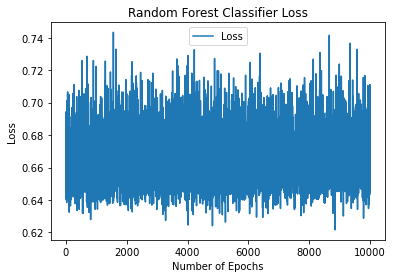

In [16]:
plt.plot(lossHis, label='Loss')
plt.title("Random Forest Classifier Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

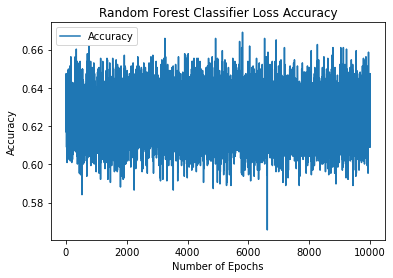

In [17]:
plt.plot(accHis, label='Accuracy')
plt.title("Random Forest Classifier Loss Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()